# Players Analysis and System Recommendation of Football Manager

![football manager 2020](https://cdn2.unrealengine.com/egs-footballmanager2020-sportsinteractive-g1a-00-1920x1080-027830362.jpg)

!https://www.passion4fm.com/img/football-manager-attribute-analysis-spider-web.png

# 1. Business Understanding

## Background
Data is applied to football in three key areas: performance analysis, recruitment and strategy. In performance analysis, data is used to support pre- and post-match analysis of key player traits, set-piece trends, chance creation, and team shape during various phases of play. Post-match this data can be used to evaluate how the team and individual players performed in relation to pre-determined KPIs as part of the game plan and football strategy.  
 
In terms of recruitment, data is increasingly being used to benchmark and analyse players across different markets against current squad players and potential transfer targets. This is used in conjunction with traditional live scouting methods and video. Recruitment is traditionally geared towards simply improving the squad, but consideration is increasingly being given to long-term financial gain. This approach has been key to Brentford’s success.

### How analysts are changing football - dataIQ


## Goals 
To apply Data Science in the world of football to provide important insights for a football club.

#### Import Library

In [1]:
import numpy as np
import pandas as pd
from easygui import *
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
from soccerplots.radar_chart import Radar
from sklearn.metrics.pairwise import euclidean_distances

import warnings
warnings.filterwarnings('ignore')

#### Import dataset

Football Manager 2020 Dataset
https://www.kaggle.com/datasets/ktyptorio/football-manager-2020

In [2]:
data = pd.read_csv("datafm20.csv",skiprows=0)
pd.set_option('display.max_columns', None)
data.head()

Unnamed: 0               Name                Position       Club  \
0           0       Lionel Messi         AM (RC), ST (C)  Barcelona   
1           1  Cristiano Ronaldo         AM (RL), ST (C)   Juventus   
2           2     Kylian MbappÃ©         AM (RL), ST (C)   Paris SG   
3           3       Manuel Neuer                      GK  FC Bayern   
4           4             Neymar  M (L), AM (LC), ST (C)   Paris SG   

                 Division                       Based Nation  Height  Weight  \
0  Spanish First Division      Spain (First Division)    ARG     170      72   
1         Italian Serie A             Italy (Serie A)    POR     185      83   
2       Ligue 1 Conforama  France (Ligue 1 Conforama)    FRA     178      73   
3              Bundesliga        Germany (Bundesliga)    GER     192      90   
4       Ligue 1 Conforama  France (Ligue 1 Conforama)    BRA     175      68   

   Age Preferred Foot Best Pos Best Role     Value     Wage   CA   PA  Wor  \
0   32           Left   AM (R)        IF  73000000  1200000  195  200    7   
1   34         Either   ST (C)        CF  31000000   950000  195  196   10   
2   20          Right   ST (C)        AF  86000000   375000  181  196   10   
3   33         Either       GK        SK  44000000   250000  176  193   14   
4   27          Right   AM (L)        IW  91000000   600000  186  190   10   

   Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  \
0   20    2   20   14    7    9   13    3    1    2    5   17   20   15    2   
1   14    2   17   10    8   16   15    3    2    2    6   20   15   16    2   
2   13    1   17   10    2   11   14    2    1    1    2   15   13   20    3   
3   12   19   12   18    3   16   10   20   14    8   15   10   13   10   15   
4   16    1   20    8    1   10   13    1    4    2    2   17   16   16    1   

   OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  \
0   16   14    4     4   17   14    1    6   10    2   19   20   19   20    2   
1   18   20    4     3   19   17    3   17   19    3   15   18   17   19    1   
2   18   15    2     2   12   10    4    8    7    3   10   18   16   17    3   
3    1   13    3     3    3   13   18   15   10   14   13    6   13    3   18   
4   18   14    1     2   15   14    2    6    8    2   17   20   18   16    1   

   Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  \
0   20   20   20   15   15   13   18    2    2   10   19   19   19    7    2   
1   15   20   18   15   13   16   14    4    1   16   14   18   13    6    2   
2   18   14   16   13   10   13   18    2    1   12   14   17   16    6    4   
3    3   18   16    2   10   15   20   12   17   14   14   19   15    8   14   
4   20   16   15   16   16   10   17    3    1   14   14   16   18   10    4   

   Acc  
0   18  
1   15  
2   20  
3   13  
4   17

### How To Understand Player Attribute Ratings In Football Manager

The attributes of a football player are key to how they can perform on the pitch. Football Manager attributes or stats are rated from 1 – 20. Having a 20 rated attribute is of course the best and highest rating on the game, however, this isn’t relevant for some of the attributes:

Aggression, bravery, and the goalkeeping eccentricity are all attributes in which it may be preferable to have a lower rating. For example, you may not want a player with 20 aggression who will be more likely to want to tackle the opposition with force, as it may risk more fouls which could mean more penalties given or red cards for that player.

To understand more about what each attribute means for a player’s actions on the pitch, read our player attributes guide.

Players will perform better in a specific player role when they have higher rated attributes for that particular role. A false 9 striker will require better passing and off the ball movement ratings than a player suited to the advanced forward role that has high acceleration for getting in behind the back defensive line.

When players have high ratings in all of the right attributes that are suited to a specific role, they can excel, even if other attributes are poorly rated as it’s likely they won’t matter too much out on the pitch. Going back to the false 9 example, if they were rated a 2 in heading it wouldn’t really matter as heading isn’t required too much in the false 9 role, although obviously its nice to have highly rated attributes in every area.

#### Variabel

1	Name	        name of player

2	Position	    = the position that can be occupied by the player

3	Club            = football club where the player is contracted

4	Division	    = league level in the country where the player plays football

5	Based	        = league where players play football

6	Nation	        = nationality of player

7	Height	        =  player's height

8	Weight	        = player's weight

9	Age	        	= player's age

10	Preferred 	    = A player's strongest foot strength 

11	Best Pos	    = The best position for atributte players

12	Best Role	    = how good a player is in available roles

13	Value	     	= Estimated funds needed to buy this player

14	Wage	    	= the funds needed to pay players' salaries

15	CA	Current 	= Ability	the level a player is at the moment you are looking at his profile.

16	PA	Potential 	= Ability	It dictates the maximum that a person's Current Ability attribute can ever rise to

17	Wor	Workrate	= Reflects the player’s willingness to work to his full capacity, going beyond the call of duty.

18	Vis	Vision	    = Ability to see a potential opening and spot an opportunity another player may not have seen.

19	Thr	Throwing	= The ability to accurately distribute the ball from his hands.

20	Tec	Technique	= Reflects the aesthetic quality of a player’s technical game;

21	Tea	Teamwork	= How the player can follow tactical instructions whilst working for and along-side his team-mates.

22	Tck	Tackling	= The ability to win the ball cleanly without conceding fouls in such situations.

23	Str	Strength	= The player’s ability to exert his physical force on an opponent to his benefit.

24	Sta	Stamina	    = Reflects a player’s ability to endure high levels of physical activity for extended periods of time.

25	TRO	Rush Out	= The ability to accurately distribute the ball from his hands.

26	Ref	Reflexes	= The goalkeeper’s ability to react to unpredictable events with a high success rate.

27	Pun	Punch	    = The goalkeeper’s inclination to punch the ball clear in situations 

28	Pos	Positioning	= The ability of a player to read a situation and manoeuvre themselves into the best location 

29	Pen	Pen Taking	= The ability from the penalty spot. 

30	Pas	Passing	    = The ability to successfully find a team-mate with the ball.

31	Pac	Pace	    = The player’s top speed both off and on the ball.

32	1v1	1 on 1	    = The goalkeeper’s ability to do well when faced with an opponent in a one on one situation.

33	OtB	Off Ball	= The ability to move when not in possession of the ball

34	Nat	NatuFit	    = How well a player stays fit or when not in training

35	Mar	Marking	    = The ability to stick close to his direct opposition in defensive situations.

36	LTh	Lg Throws	= The ability to throw the ball long, often in attacking situations

37	Lon	Lg Shots	= The player’s prowess when shooting from outside the penalty area

38	Ldr	Leadership	= The ability to influence players around them on the pitch. Team-mates will often rally around them

39	Kic	Kicking	    = The distance the goalkeeper can reach with a kick both from his hands and on the ground.

40	Jum	Jp Reach	= The highest point a player can reach with his head, often influenced by a player’s height.

41	Hea	Heading	    = The ability to head the ball

42	Han	Handling	= The ability to hold onto the ball when making a save.

43	Fre	Fk Taking	= The ability to strike a dead ball

44	Fla	Flair	    = The player’s natural talent for the creative and the unpredictable.

45	Fir	Fst Touch	= The ability to control the ball immediately as it is passed to feet.

46	Fin	Finishing	= The ability to put the ball in the back of the net when presented with a chance.

47	Ecc	Eccentric	= The goalkeeper’s tendency to do the unexpected with or without the ball.

48	Dri	Dribbling	= The ability to run with the ball and manipulate it under close control.

49	Det	Determina	= The player’s commitment to succeed and do his very best off and on the pitch.

50	Dec	Decisions	= The player’s ability to make the correct choice both with and without the ball.

51	Cro	Crossing	= The ability to cross the ball accurately from wide areas

52	Cor	Corners	    = The player’s ability to accurately take a corner

53	Cnt	Concentra	= The player’s mental focus and attention to detail on an event-by-event basis

54	Cmp	Composure	= The player’s steadiness of mind and ability to make intelligent decisions with or without the ball.

55	Com	Communica	= The ability to communicate with his defensive line and organise the defensive side of the team.

56	Cmd	ComArea	    = The goalkeeper’s ability to instinctively take charge of his penalty area 

57	Bra	Bravery	    = How committed a player is, often putting themselves into risky situations which may cause injury.

58	Bal	Balance	    = How well a player can stay on his feet, both on and off the ball.

59	Ant	Anticipat	= Ability to predict and react to events going on around them.

60	Agi	Agility	    = How well a player can start, stop and move in different directions at varying levels of speed 

61	Agg	Aggressi	= Doesn’t necessarily reflect a player’s dirtiness

62	Aer	Arl Reach	= The player’s physical ability to challenge in aerial situations.

63	Acc	Accelerat	= How quickly a player can get to top speed from a standing start.

# 2. Data Understanding



### Data Cleaning

#### a. Fix Name Of Players

In [3]:
data['Name'] = data['Name'].str.replace("Ã©", "é")
data['Name'] = data['Name'].str.replace("Ã\u0081", "á")
data['Name'] = data['Name'].str.replace("Ã¡", "á")
data['Name'] = data['Name'].str.replace("Ã³", "ó")
data['Name'] = data['Name'].str.replace("Ãº", "ú")
data['Name'] = data['Name'].str.replace("Ã¡", "á")
data['Name'] = data['Name'].str.replace("Ã²", "á")
data['Name'] = data['Name'].str.replace("Ã¼", "á")
data['Name'] = data['Name'].str.replace("Ã«", "á")
data['Name'] = data['Name'].str.replace("Ã±", "á")
data['Name'] = data['Name'].str.replace("Ã£", "á")
data['Name'] = data['Name'].str.replace("Ã­", "í")
data['Name'] = data['Name'].str.replace("¶", "ö")

data['Club'] = data['Club'].str.replace("Ã©", "é")
data['Club'] = data['Club'].str.replace("Ã\u0081", "á")
data['Club'] = data['Club'].str.replace("Ã¡", "á")
data['Club'] = data['Club'].str.replace("Ã³", "ó")
data['Club'] = data['Club'].str.replace("Ãº", "ú")
data['Club'] = data['Club'].str.replace("Ã¡", "á")
data['Club'] = data['Club'].str.replace("Ã²", "á")
data['Club'] = data['Club'].str.replace("Ã¼", "á")
data['Club'] = data['Club'].str.replace("Ã«", "á")
data['Club'] = data['Club'].str.replace("Ã±", "á")
data['Club'] = data['Club'].str.replace("Ã£", "á")
data['Club'] = data['Club'].str.replace("Ã­", "í")
data['Club'] = data['Club'].str.replace("¶", "ö")

In [4]:
del data['Unnamed: 0']
data.head()

Name                Position       Club  \
0       Lionel Messi         AM (RC), ST (C)  Barcelona   
1  Cristiano Ronaldo         AM (RL), ST (C)   Juventus   
2      Kylian Mbappé         AM (RL), ST (C)   Paris SG   
3       Manuel Neuer                      GK  FC Bayern   
4             Neymar  M (L), AM (LC), ST (C)   Paris SG   

                 Division                       Based Nation  Height  Weight  \
0  Spanish First Division      Spain (First Division)    ARG     170      72   
1         Italian Serie A             Italy (Serie A)    POR     185      83   
2       Ligue 1 Conforama  France (Ligue 1 Conforama)    FRA     178      73   
3              Bundesliga        Germany (Bundesliga)    GER     192      90   
4       Ligue 1 Conforama  France (Ligue 1 Conforama)    BRA     175      68   

   Age Preferred Foot Best Pos Best Role     Value     Wage   CA   PA  Wor  \
0   32           Left   AM (R)        IF  73000000  1200000  195  200    7   
1   34         Either   ST (C)        CF  31000000   950000  195  196   10   
2   20          Right   ST (C)        AF  86000000   375000  181  196   10   
3   33         Either       GK        SK  44000000   250000  176  193   14   
4   27          Right   AM (L)        IW  91000000   600000  186  190   10   

   Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  \
0   20    2   20   14    7    9   13    3    1    2    5   17   20   15    2   
1   14    2   17   10    8   16   15    3    2    2    6   20   15   16    2   
2   13    1   17   10    2   11   14    2    1    1    2   15   13   20    3   
3   12   19   12   18    3   16   10   20   14    8   15   10   13   10   15   
4   16    1   20    8    1   10   13    1    4    2    2   17   16   16    1   

   OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  \
0   16   14    4     4   17   14    1    6   10    2   19   20   19   20    2   
1   18   20    4     3   19   17    3   17   19    3   15   18   17   19    1   
2   18   15    2     2   12   10    4    8    7    3   10   18   16   17    3   
3    1   13    3     3    3   13   18   15   10   14   13    6   13    3   18   
4   18   14    1     2   15   14    2    6    8    2   17   20   18   16    1   

   Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  \
0   20   20   20   15   15   13   18    2    2   10   19   19   19    7    2   
1   15   20   18   15   13   16   14    4    1   16   14   18   13    6    2   
2   18   14   16   13   10   13   18    2    1   12   14   17   16    6    4   
3    3   18   16    2   10   15   20   12   17   14   14   19   15    8   14   
4   20   16   15   16   16   10   17    3    1   14   14   16   18   10    4   

   Acc  
0   18  
1   15  
2   20  
3   13  
4   17

#### b. Data Type

In [5]:
data.shape

(144750, 63)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144750 entries, 0 to 144749
Data columns (total 63 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Name            144750 non-null  object
 1   Position        144750 non-null  object
 2   Club            144750 non-null  object
 3   Division        144750 non-null  object
 4   Based           144750 non-null  object
 5   Nation          144750 non-null  object
 6   Height          144750 non-null  int64 
 7   Weight          144750 non-null  int64 
 8   Age             144750 non-null  int64 
 9   Preferred Foot  144750 non-null  object
 10  Best Pos        144750 non-null  object
 11  Best Role       144750 non-null  object
 12  Value           144750 non-null  int64 
 13  Wage            144750 non-null  int64 
 14  CA              144750 non-null  int64 
 15  PA              144750 non-null  int64 
 16  Wor             144750 non-null  int64 
 17  Vis             144750 non-nu

#### c. Check for Duplicates Data

In [7]:
data.duplicated().any()

False

#### d. Check Missing Values

In [8]:
data.isnull().sum()

Name        0
Position    0
Club        0
Division    0
Based       0
           ..
Ant         0
Agi         0
Agg         0
Aer         0
Acc         0
Length: 63, dtype: int64

#### e. Check Unique Variable

In [9]:
data['Best Role'].unique()

array(['IF', 'CF', 'AF', 'SK', 'IW', 'MEZ', 'DLF', 'W', 'PF', 'BPD', 'AP',
       'DLP', 'AM', 'G', 'CWB', 'BBM', 'FB', 'P', 'CD', 'WB', 'CM', 'EG',
       'A', 'SS', 'IWB', 'TM', 'NCB', 'WP', 'VOL', 'T', 'BWM', 'DM', 'F9',
       'L', 'DW', 'NFB', 'WTM', 'RMD', 'CAR', 'Unknown', 'HB', 'RPM',
       'RGA', 'WM'], dtype=object)

In [10]:
data['Best Pos'].unique()

array(['AM (R)', 'ST (C)', 'GK', 'AM (L)', 'M (C)', 'D (C)', 'M (R)',
       'DM', 'AM (C)', 'M (L)', 'D (R)', 'D (L)', 'WB (R)', 'WB (L)'],
      dtype=object)

In [11]:
data['Club'].nunique()

10221

In [12]:
data['Nation'].nunique()

216

### Exploratory Data Analysis (EDA)

In [13]:
data.describe()

Height         Weight            Age         Value  \
count  144750.000000  144750.000000  144750.000000  1.447500e+05   
mean      180.352339      72.970515      24.046266  3.503583e+05   
std         7.056189       7.339469       5.509446  2.392352e+06   
min       150.000000      55.000000      14.000000  0.000000e+00   
25%       175.000000      68.000000      20.000000  1.700000e+02   
50%       180.000000      73.000000      23.000000  9.000000e+03   
75%       185.000000      78.000000      28.000000  6.500000e+04   
max       208.000000     120.000000      53.000000  9.100000e+07   

               Wage             CA             PA            Wor  \
count  1.447500e+05  144750.000000  144750.000000  144750.000000   
mean   1.605965e+03      75.816214      94.486017       9.609603   
std    1.037654e+04      24.913951      25.052014       3.001689   
min    0.000000e+00       1.000000       2.000000       1.000000   
25%    0.000000e+00      60.000000      80.000000       7.000000   
50%    1.600000e+02      76.000000      96.000000      10.000000   
75%    6.000000e+02      92.000000     111.000000      12.000000   
max    1.200000e+06     195.000000     200.000000      20.000000   

                 Vis            Thr            Tec            Tea  \
count  144750.000000  144750.000000  144750.000000  144750.000000   
mean        7.854418       2.714314       8.816629       8.575247   
std         3.202000       2.231497       3.465611       3.012147   
min         1.000000       1.000000       1.000000       1.000000   
25%         6.000000       1.000000       7.000000       6.000000   
50%         8.000000       2.000000       9.000000       8.000000   
75%        10.000000       3.000000      11.000000      11.000000   
max        20.000000      20.000000      20.000000      20.000000   

                 Tck            Str            Sta            TRO  \
count  144750.000000  144750.000000  144750.000000  144750.000000   
mean        7.585133       7.765485       9.228187       2.873948   
std         4.038966       3.549885       3.372235       2.627661   
min         1.000000       1.000000       1.000000       1.000000   
25%         4.000000       5.000000       7.000000       1.000000   
50%         8.000000       7.000000      10.000000       2.000000   
75%        11.000000      11.000000      12.000000       3.000000   
max        20.000000      20.000000      20.000000      20.000000   

                 Ref            Pun            Pos            Pen  \
count  144750.000000  144750.000000  144750.000000  144750.000000   
mean        3.120801       2.870073       8.348739       5.173244   
std         3.169753       2.629510       3.102789       3.611459   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       6.000000       2.000000   
50%         2.000000       2.000000       8.000000       4.000000   
75%         3.000000       3.000000      11.000000       8.000000   
max        20.000000      20.000000      20.000000      20.000000   

                 Pas            Pac            1v1            OtB  \
count  144750.000000  144750.000000  144750.000000  144750.000000   
mean        8.980642      11.430874       2.805831       8.045313   
std         2.925361       2.038768       2.429449       3.619207   
min         1.000000       1.000000       1.000000       1.000000   
25%         7.000000      10.000000       1.000000       5.000000   
50%         9.000000      12.000000       2.000000       8.000000   
75%        11.000000      13.000000       3.000000      11.000000   
max        20.000000      20.000000      18.000000      20.000000   

                 Nat            Mar           L Th            Lon  \
count  144750.000000  144750.000000  144750.000000  144750.000000   
mean       11.887288       7.179668       4.593340       6.496663   
std         2.961129       3.602296       3.172536       3.368694   
min         1.000000    

# 3. Data Preparation


### Make Some Visualization

#### Distribution of Player Attribute

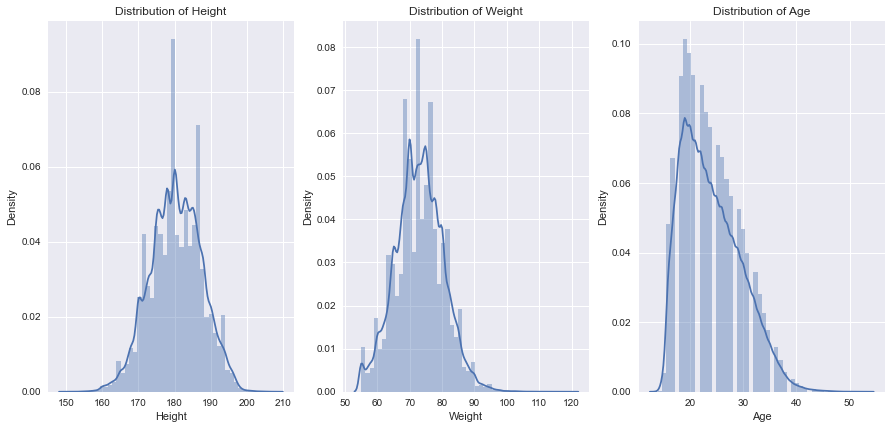

In [14]:
num_feat = ['Height', 'Weight', 'Age']
plt.style.use('seaborn')
plt.figure(figsize = (15,15))

n = 0
for i in num_feat:
    n+=1 # n = n +1
    plt.subplot(2,3, n)
    sns.distplot(data[i])
    plt.title(f'Distribution of {i}')

plt.show()

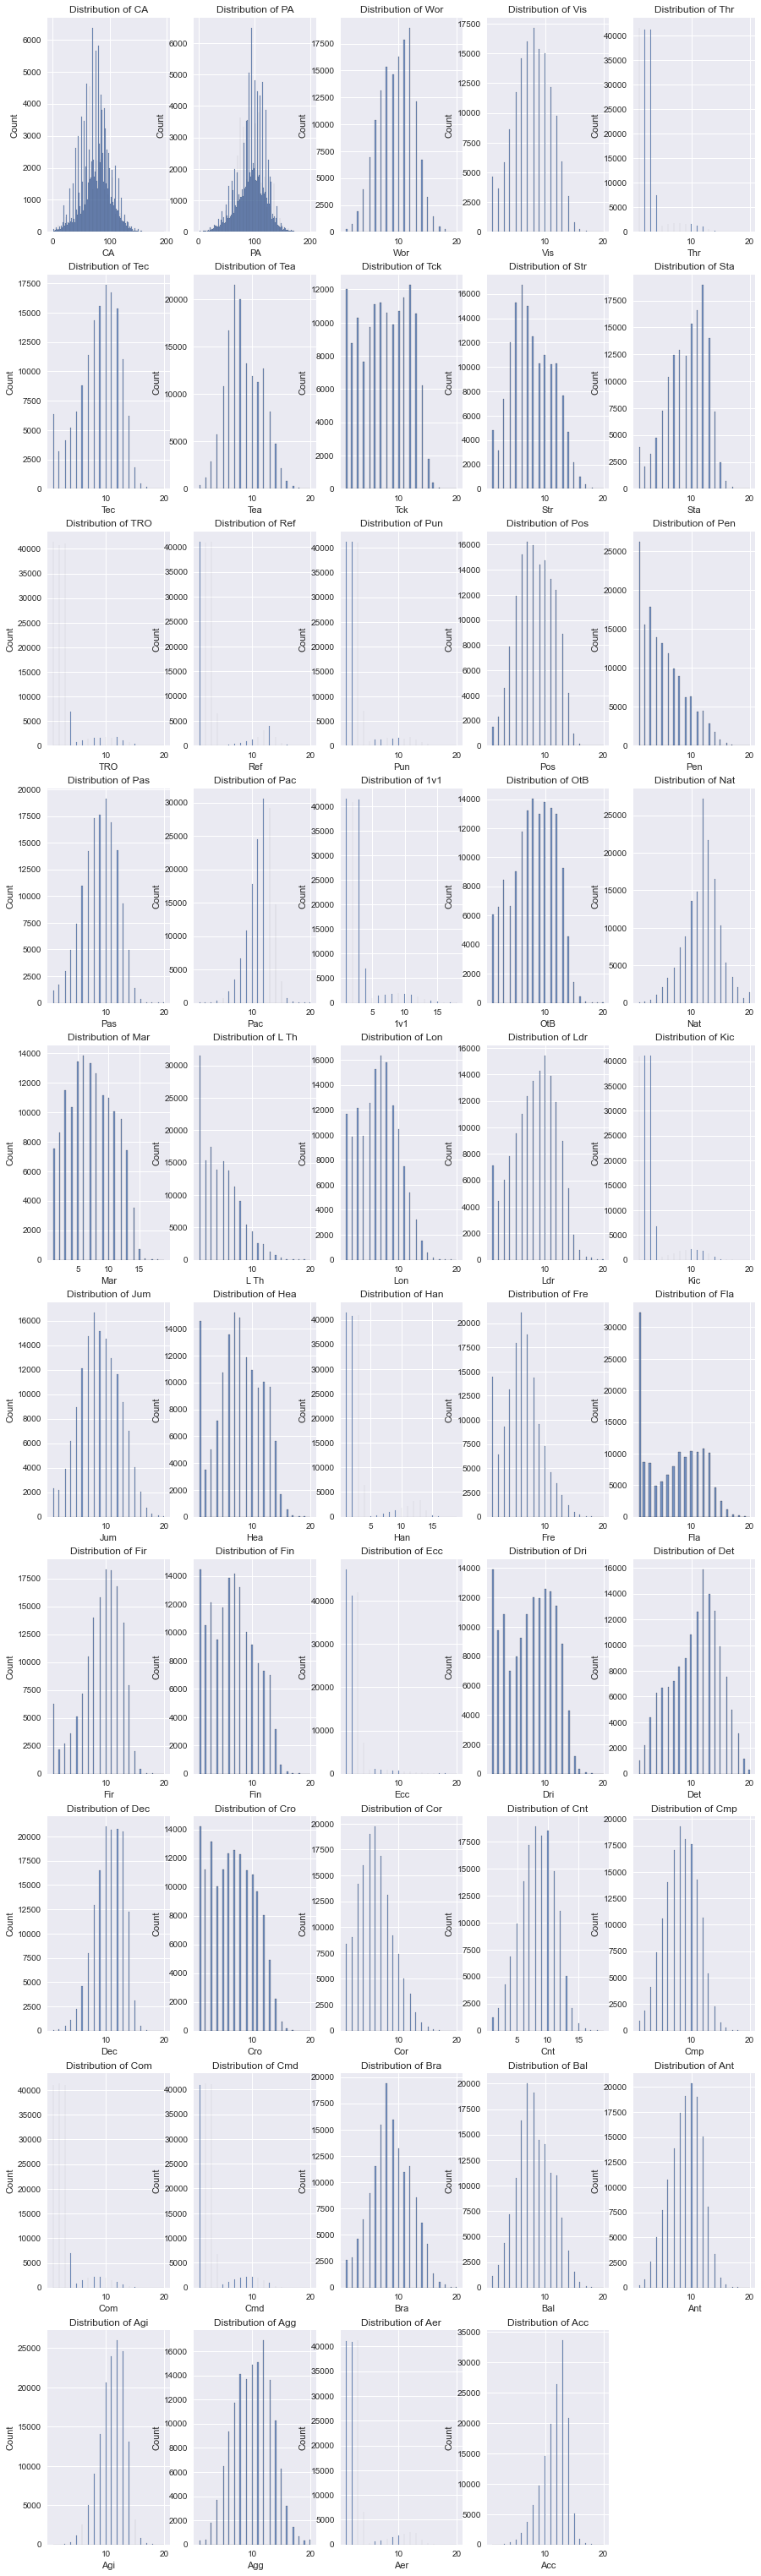

In [15]:
plt.style.use('seaborn')
plt.figure(figsize = (15,55))

n = 0
for i in data.columns[14:]:
    n+=1 # n = n +1
    plt.subplot(10,5, n)
    sns.histplot(data[i])
    plt.title(f'Distribution of {i}')

plt.show()

### Cek Outlier Using Boxplot

<AxesSubplot:>

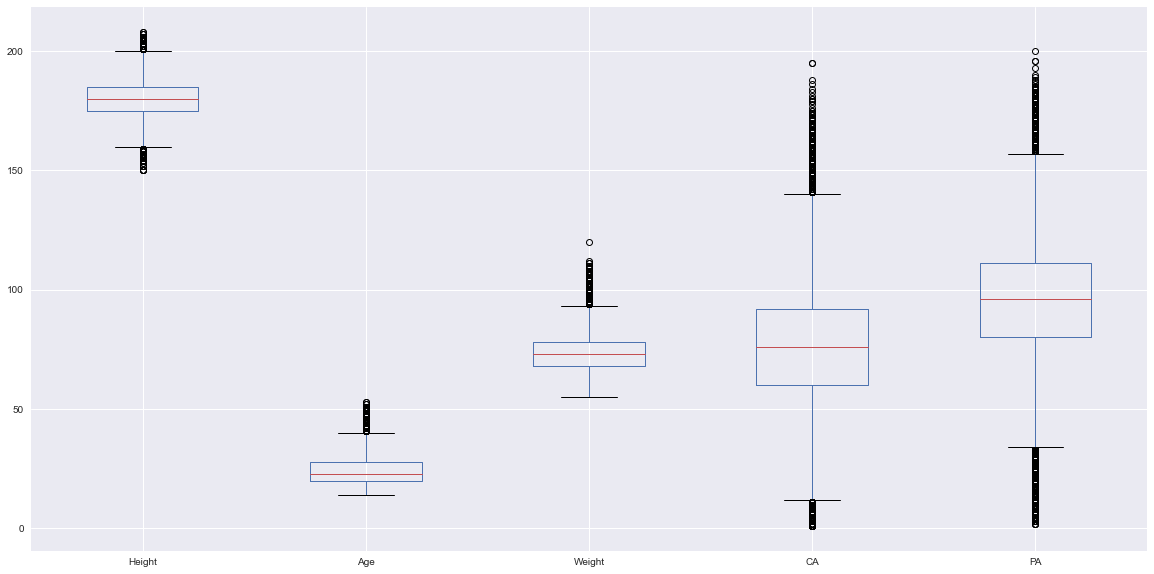

In [16]:
plt.figure(figsize = (20, 10))
data[['Height','Age', 'Weight', 'CA', 'PA']].boxplot()

<AxesSubplot:>

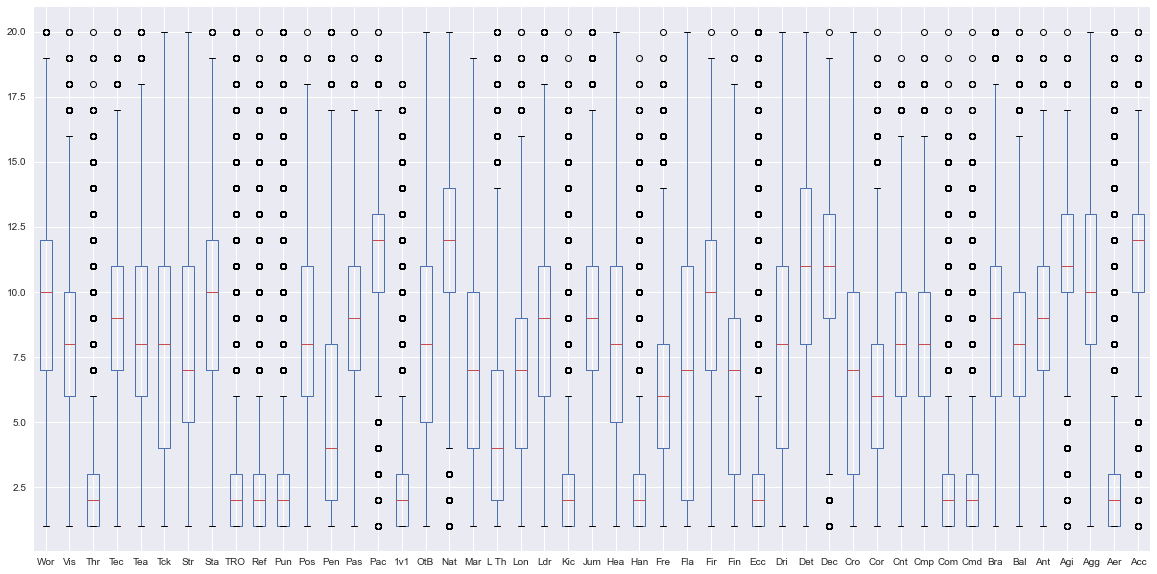

In [17]:
plt.figure(figsize = (20, 10))
data[['Wor','Vis','Thr','Tec','Tea','Tck','Str','Sta','TRO','Ref','Pun','Pos','Pen','Pas','Pac','1v1','OtB','Nat','Mar','L Th','Lon','Ldr','Kic','Jum','Hea','Han','Fre','Fla','Fir','Fin','Ecc','Dri','Det','Dec','Cro','Cor','Cnt','Cmp','Com','Cmd','Bra','Bal','Ant','Agi','Agg','Aer','Acc']].boxplot()

### Keterangan
Berdasarkan boxplot atribute player diatas, terdapat beberapa outlier pada beberapa variabel tapi masih didalam range penilaian 1 s.d 20, untuk hal tersebut maka data diatas tetap digunakan apa adanya dalam analisa lebih lanjut

### Barplot Negara Asal Pemain

In [18]:
nation = data.groupby(['Nation'])['Name'].count()
nation = pd.DataFrame(nation.sort_values(ascending=False)).reset_index()
nation.head(10)

Nation   Name
0    ARG  10254
1    BRA   7935
2    FRA   5546
3    ENG   5050
4    ESP   4763
5    POL   4220
6    ITA   3833
7    GRE   3452
8    GER   3327
9    CHN   2979

<AxesSubplot:xlabel='Name', ylabel='Nation'>

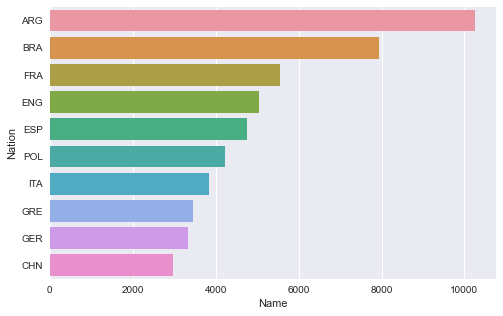

In [19]:
plt.figure(figsize = (8, 5))
sns.barplot(x="Name", y="Nation", data=nation.head(10))

#### Dari barplot tersebut dapat dilihat bahwa paling banyak pemain berasal dari negara Argentina.

### Barplot Total Value Pemain di Setiap Club

In [20]:
club = data.groupby(['Club'])['Value'].sum()
club = pd.DataFrame(club.sort_values(ascending=False)).reset_index()
club.head(10)

Club       Value
0  Liverpool  1009417300
1   Man City   992540550
2  Barcelona   887806000
3  Tottenham   809825500
4  FC Bayern   806049500
5  R. Madrid   786024250
6    Man Utd   752651550
7   Juventus   736258650
8  A. Madrid   720489500
9   Paris SG   691538500

<AxesSubplot:xlabel='Value', ylabel='Club'>

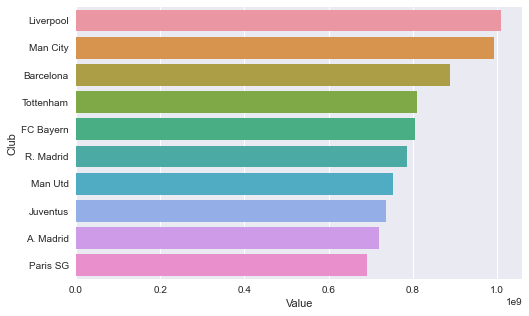

In [21]:
plt.figure(figsize = (8, 5))
sns.barplot(x="Value", y="Club", data=club.head(10))

#### Dari barplot tersebut dapat dilihat bahwa Liverpool memiliki nilai value pemain paling besar diantara club lainnya.

### Barplot Gaji Pemain di Setiap Club

In [22]:
wage = data.groupby(['Club'])['Wage'].sum()
wage = pd.DataFrame(wage.sort_values(ascending=False)).reset_index()
wage.head(10)

Club     Wage
0  Barcelona  4201505
1  R. Madrid  4176905
2   Juventus  3826295
3   Paris SG  3575115
4    Man Utd  3011350
5    Chelsea  3008865
6  FC Bayern  2863300
7   Man City  2788740
8  Liverpool  2655845
9  Tottenham  2544460

<AxesSubplot:xlabel='Wage', ylabel='Club'>

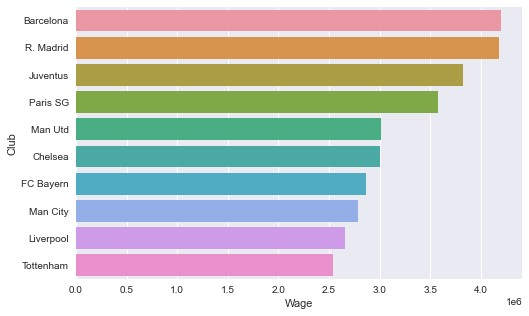

In [23]:
plt.figure(figsize = (8, 5))
sns.barplot(x="Wage", y="Club", data=wage.head(10))

#### Dari barplot tersebut dapat dilihat bahwa Barcelona merupakan club dengan total gaji pemain tertinggi diantara club lainnya.

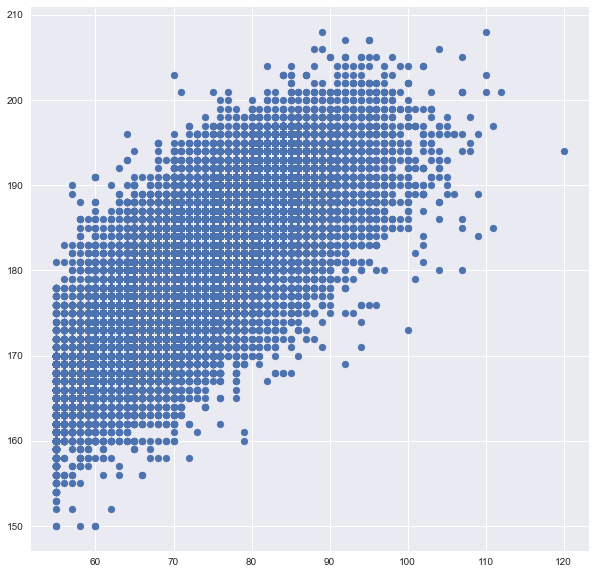

In [24]:
plt.figure(figsize=[10,10])
plt.scatter(data['Weight'], data['Height'])
plt.show()

#### Keterangan
Diatas adalah pola penyebaran data Tinggi pemain dan Berat badan pemain bola

#### The Attribute Analysis – The polygon

the attributes which affect each of the eight different corners of the web for outfield players and goalkeepers.

a. Outfield Players

    Defending: Tackling (50%), Marking (25%) and Positioning (25%)

    Physical: Strength (25%), Stamina (25%), Balance (25%) and Agility(25%)
 
    Speed: Acceleration (50%) and Pace (50%)

    Vision: Vision (33%), Flair (33%), Passing (34%)

    Attacking: Finishing (34%), Off the ball (33%) and Composure (33%)

    Technique: Technique (34%), First Touch (33%) and Dribbling (33%)

    Aerial: Heading (50%) and Jumping Reach (50%)

    Mental: Determination (16,6%), Decisions (16,6%), Anticipation (16,6%), Teamwork (16,6%), Bravery (16,6%) and Concentration            (16,6%)
   
b.  Goalkeepers

    Shot Stopping: Reflexes (50%) and One on Ones (50%)
    
    Aerial: Handling (50%) and Aerial Reach (50%)
    
    Communication: Communication (50%) and Command of Area (50%)
    
    Distribution: Throwing (50%) and Kicking (50%)
    
    Mental: Anticipation (16,67%), Bravery (16,67%), Concentration (16,67%), Decisions (16,67%), Determination (16,67%) and                 Teamwork (16,67%)
    
    Eccentricity: Eccentricity (100%)
    
    Physical: Balance (25%), Agility (25%), Strength (25%) and Stamina (25%)
    
    Speed: Acceleration (50%) and Pace (50%)

In [25]:
data['Defending'] = (data['Tck'] * 0.5) + (data['Mar'] * 0.25) + (data['Pos'] * 0.25)

data['Vision'] = (data['Vis'] + data['Fla'] + data['Pas']) / 3

data['Attacking'] = (data['Fin'] + data['OtB'] + data['Cmp']) / 3

data['Technique'] = (data['Tec'] + data['Fir'] + data['Dri']) / 3

data['Aerial'] = (data['Hea'] + data['Jum']) / 2

data['Physical'] = (data['Str'] + data['Sta'] + data['Bal'] + data['Agi']) / 4

data['Speed'] = (data['Acc'] + data['Pac']) / 2

data['Mental'] = (data['Det'] + data['Dec'] + data['Ant'] + data['Tea'] + data['Bra'] + data['Cnt']) / 6

data['GK Shotstop'] = (data['Ref'] + data['1v1']) / 2

data['GK Aerial'] = (data['Han'] + data['Aer']) / 2

data['GK Communication'] = (data['Com'] + data['Cmd']) / 2

data['GK Distribution'] = (data['Thr'] + data['Kic']) / 2

data['GK Eccentricity'] = data['Ecc']

https://www.passion4fm.com/football-manager-player-attributes/

In [26]:
data.head()

Name                Position       Club  \
0       Lionel Messi         AM (RC), ST (C)  Barcelona   
1  Cristiano Ronaldo         AM (RL), ST (C)   Juventus   
2      Kylian Mbappé         AM (RL), ST (C)   Paris SG   
3       Manuel Neuer                      GK  FC Bayern   
4             Neymar  M (L), AM (LC), ST (C)   Paris SG   

                 Division                       Based Nation  Height  Weight  \
0  Spanish First Division      Spain (First Division)    ARG     170      72   
1         Italian Serie A             Italy (Serie A)    POR     185      83   
2       Ligue 1 Conforama  France (Ligue 1 Conforama)    FRA     178      73   
3              Bundesliga        Germany (Bundesliga)    GER     192      90   
4       Ligue 1 Conforama  France (Ligue 1 Conforama)    BRA     175      68   

   Age Preferred Foot Best Pos Best Role     Value     Wage   CA   PA  Wor  \
0   32           Left   AM (R)        IF  73000000  1200000  195  200    7   
1   34         Either   ST (C)        CF  31000000   950000  195  196   10   
2   20          Right   ST (C)        AF  86000000   375000  181  196   10   
3   33         Either       GK        SK  44000000   250000  176  193   14   
4   27          Right   AM (L)        IW  91000000   600000  186  190   10   

   Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  \
0   20    2   20   14    7    9   13    3    1    2    5   17   20   15    2   
1   14    2   17   10    8   16   15    3    2    2    6   20   15   16    2   
2   13    1   17   10    2   11   14    2    1    1    2   15   13   20    3   
3   12   19   12   18    3   16   10   20   14    8   15   10   13   10   15   
4   16    1   20    8    1   10   13    1    4    2    2   17   16   16    1   

   OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  \
0   16   14    4     4   17   14    1    6   10    2   19   20   19   20    2   
1   18   20    4     3   19   17    3   17   19    3   15   18   17   19    1   
2   18   15    2     2   12   10    4    8    7    3   10   18   16   17    3   
3    1   13    3     3    3   13   18   15   10   14   13    6   13    3   18   
4   18   14    1     2   15   14    2    6    8    2   17   20   18   16    1   

   Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  \
0   20   20   20   15   15   13   18    2    2   10   19   19   19    7    2   
1   15   20   18   15   13   16   14    4    1   16   14   18   13    6    2   
2   18   14   16   13   10   13   18    2    1   12   14   17   16    6    4   
3    3   18   16    2   10   15   20   12   17   14   14   19   15    8   14   
4   20   16   15   16   16   10   17    3    1   14   14   16   18   10    4   

   Acc  Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
0   18       5.75  20.000000  18.000000  19.666667     8.0     15.00   16.5   
1   15       6.50  15.666667  17.000000  16.333333    18.0     14.50   15.5   
2   20       2.00  14.666667  17.666667  17.000000     7.5     13.75   20.0   
3   13       6.00  10.333333   8.000000   9.333333    12.5     13.75   11.5   
4   17       1.25  17.333333  17.000000  19.333333     7.0     13.75   16.5   

      Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
0  16.000000          1.5        2.0               2.0              1.5   
1  16.333333          2.0        2.5               2.5              2.5   
2  13.666667          2.0        3.5               1.5              2.5   
3  16.666667         14.5       14.0              14.5             18.5   
4  13.166667          2.5        3.0               2.0              1.5   

   GK Eccentricity  
0                2  
1                1  
2                3  
3               18  
4                1

Berdasarkan sumber dari IFFHS (International Federation of Football History and Statistics), berikut merupakan daftar 10 kompetisi sepakbola terbaik di Dunia periode 2011-2020 :

Sumber : [MNC Vision](https://www.mncvision.id/article/read/content_article/1617091848/10-Kompetisi-Sepakbola-2011-2021-La-Liga-Jadi-Yang-Terbaik)

In [27]:
data = data.loc[data['Division'].isin(['English Premier Division',
                                       'Spanish First Division',
                                       'Italian Serie A',
                                       'Ligue 1 Conforama',
                                       'Bundesliga',
                                       'Brazilian National First Division',
                                       'Argentine Premier Division',
                                       'Colombian First Division',
                                       'Portuguese Premier League',
                                       'Paraguayan First Division',])]
data = data.reset_index(drop=True)

In [28]:
data.shape

(10105, 76)

In [29]:
df_cat = data[['Name', 'Position', 'Best Pos', 'Best Role', 'Defending',  'Vision', 'Attacking', 'Technique', 'Aerial', 'Physical', 
               'Speed', 'Mental', 'GK Shotstop', 'GK Aerial', 'GK Communication', 'GK Distribution', 'GK Eccentricity']]
df_cat.head()

Name                Position Best Pos Best Role  Defending  \
0       Lionel Messi         AM (RC), ST (C)   AM (R)        IF       5.75   
1  Cristiano Ronaldo         AM (RL), ST (C)   ST (C)        CF       6.50   
2      Kylian Mbappé         AM (RL), ST (C)   ST (C)        AF       2.00   
3       Manuel Neuer                      GK       GK        SK       6.00   
4             Neymar  M (L), AM (LC), ST (C)   AM (L)        IW       1.25   

      Vision  Attacking  Technique  Aerial  Physical  Speed     Mental  \
0  20.000000  18.000000  19.666667     8.0     15.00   16.5  16.000000   
1  15.666667  17.000000  16.333333    18.0     14.50   15.5  16.333333   
2  14.666667  17.666667  17.000000     7.5     13.75   20.0  13.666667   
3  10.333333   8.000000   9.333333    12.5     13.75   11.5  16.666667   
4  17.333333  17.000000  19.333333     7.0     13.75   16.5  13.166667   

   GK Shotstop  GK Aerial  GK Communication  GK Distribution  GK Eccentricity  
0          1.5        2.0               2.0              1.5                2  
1          2.0        2.5               2.5              2.5                1  
2          2.0        3.5               1.5              2.5                3  
3         14.5       14.0              14.5             18.5               18  
4          2.5        3.0               2.0              1.5                1

In [30]:
df_atr = data[['Name', 'Wor','Vis','Thr','Tec','Tea','Tck','Str','Sta','TRO','Ref','Pun','Pos','Pen','Pas','Pac','1v1','OtB','Nat','Mar','L Th','Lon','Ldr','Kic','Jum','Hea','Han','Fre','Fla','Fir','Fin','Ecc','Dri','Det','Dec','Cro','Cor','Cnt','Cmp','Com','Cmd','Bra','Bal','Ant','Agi','Agg','Aer','Acc']]
df_atr.head()

Name  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
0       Lionel Messi    7   20    2   20   14    7    9   13    3    1    2   
1  Cristiano Ronaldo   10   14    2   17   10    8   16   15    3    2    2   
2      Kylian Mbappé   10   13    1   17   10    2   11   14    2    1    1   
3       Manuel Neuer   14   12   19   12   18    3   16   10   20   14    8   
4             Neymar   10   16    1   20    8    1   10   13    1    4    2   

   Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
0    5   17   20   15    2   16   14    4     4   17   14    1    6   10    2   
1    6   20   15   16    2   18   20    4     3   19   17    3   17   19    3   
2    2   15   13   20    3   18   15    2     2   12   10    4    8    7    3   
3   15   10   13   10   15    1   13    3     3    3   13   18   15   10   14   
4    2   17   16   16    1   18   14    1     2   15   14    2    6    8    2   

   Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  \
0   19   20   19   20    2   20   20   20   15   15   13   18    2    2   10   
1   15   18   17   19    1   15   20   18   15   13   16   14    4    1   16   
2   10   18   16   17    3   18   14   16   13   10   13   18    2    1   12   
3   13    6   13    3   18    3   18   16    2   10   15   20   12   17   14   
4   17   20   18   16    1   20   16   15   16   16   10   17    3    1   14   

   Bal  Ant  Agi  Agg  Aer  Acc  
0   19   19   19    7    2   18  
1   14   18   13    6    2   15  
2   14   17   16    6    4   20  
3   14   19   15    8   14   13  
4   14   16   18   10    4   17

# 4. Modeling

### Player Attribute Analysis

In [31]:
#get parameters
params = list(df_cat.columns)
params

['Name',
 'Position',
 'Best Pos',
 'Best Role',
 'Defending',
 'Vision',
 'Attacking',
 'Technique',
 'Aerial',
 'Physical',
 'Speed',
 'Mental',
 'GK Shotstop',
 'GK Aerial',
 'GK Communication',
 'GK Distribution',
 'GK Eccentricity']

In [32]:
## range values
ranges = [(0,20), (0,20), (0,20), (0,20),
          (0,20), (0,20), (0,20), (0,20)]

In [33]:
a_values = []

def attribute (nama) :
    params = list(df_cat.columns)

    ## parameter value
    for x in range(len(df_cat['Name'])):
        if df_cat['Name'][x] == nama:
            if df_cat['Position'][x] == 'GK' :
                params = params[9:17]
            else :
                params = params[4:12]
            a_values = df_cat.iloc[x].values.tolist()
    
    if df_cat['Position'][x] == 'GK' :
        values = a_values[9:17]
    else :
        values = a_values[4:12]
        
    print(values)
    print(len(values))
    
    ## title values
    title = dict(
        title_name=nama,
        title_color="#E3DDED",
        subtitle_color="#C72C41",
        title_name_2="Atributte",
        title_color_2="#E3DDED",
        subtitle_color_2='#C72C41',
        title_fontsize=18,
        subtitle_fontsize=15)
    
    ## endnote 
    endnote = "Visualization made by: Shift Academy Batch 15"

    ## instantiate object 
    radar = Radar(background_color="#121212", patch_color="#28252C", label_color="#FFFFFF",
              range_color="#FFFFFF")
              
    ## plot radar
    fig, ax = radar.plot_radar(ranges=ranges, params=params, 
                           values=values, radar_color=['#1c547f', '#CF6679'], 
                              title=title, endnote=endnote)
    


<AxesSubplot:>

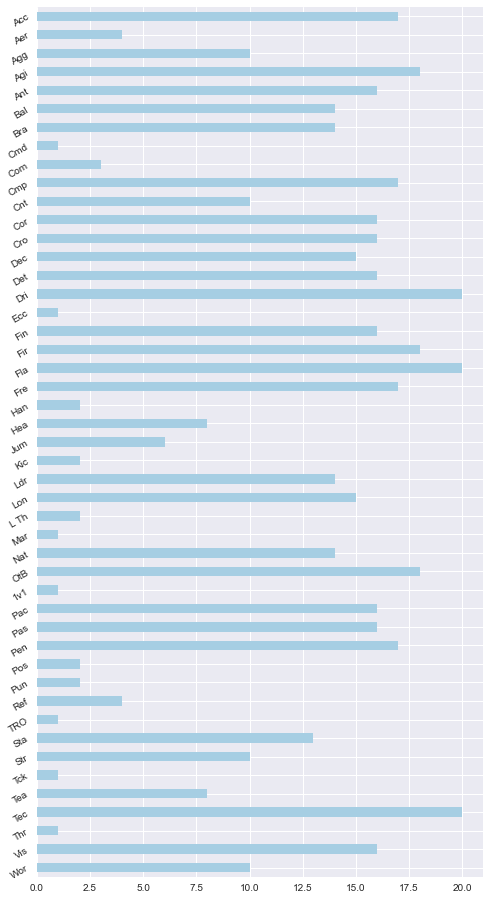

In [34]:
df1 = df_atr.set_index('Name')
df1.loc['Neymar'].plot(kind='barh',stacked=True, colormap='Paired', figsize=(8,16), rot=30)

[5.75, 20.0, 18.0, 19.666666666666668, 8.0, 15.0, 16.5, 16.0]
8


findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


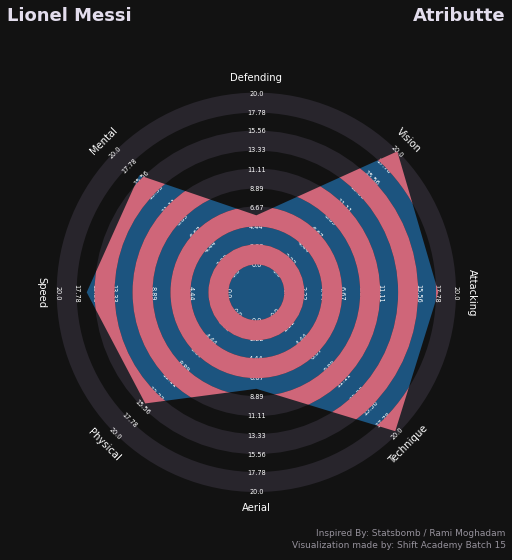

In [35]:
attribute('Lionel Messi')

[6.0, 10.333333333333334, 8.0, 9.333333333333334, 12.5, 13.75, 11.5, 16.666666666666668]
8


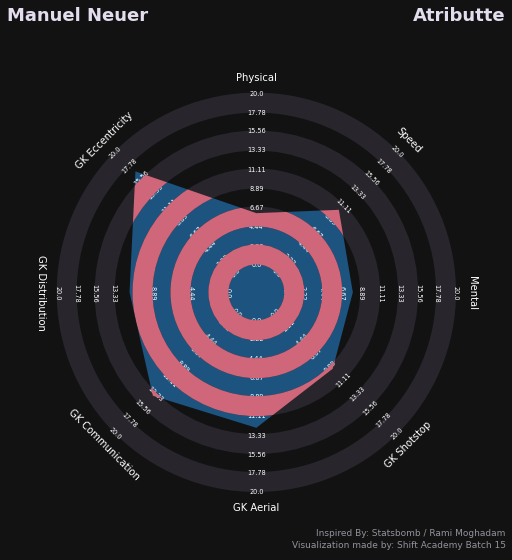

In [36]:
attribute('Manuel Neuer')

### Comparisson Player Atributte Analysis

In [37]:
#add ranges to list of tuple pairs
a_values = []
b_values = []

def compparison_player (nama1, nama2) :
    params = list(df_cat.columns)
    
    for x in range(len(df_cat['Name'])):
        if df_cat['Name'][x] == nama1:
            if df_cat['Position'][x] == 'GK' :
                pos = x
                params = params[9:17]
            else :
                pos = 0
                params = params[4:12]
            a_values = df_cat.iloc[x].values.tolist()
            
        if df_cat['Name'][x] == nama2:
            b_values = df_cat.iloc[x].values.tolist()
    
    if df_cat['Position'][pos] == 'GK' :
        a_values = a_values[9:17]
        b_values = b_values[9:17]
    else :
        a_values = a_values[4:12]
        b_values = b_values[4:12]

    print (x)
    values = [a_values,b_values]
    print (values)
    #title 

    title = dict(
    title_name=nama1,
    title_color = 'red',
    subtitle_color = 'red',
    title_name_2=nama2,
    title_color_2 = 'blue',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize=15)
        
    radar = Radar()

    fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                         alphas=[.75,.6],title=title,
                         compare=True)

10104
[[5.75, 20.0, 18.0, 19.666666666666668, 8.0, 15.0, 16.5, 16.0], [6.0, 10.333333333333334, 8.0, 9.333333333333334, 12.5, 13.75, 11.5, 16.666666666666668]]


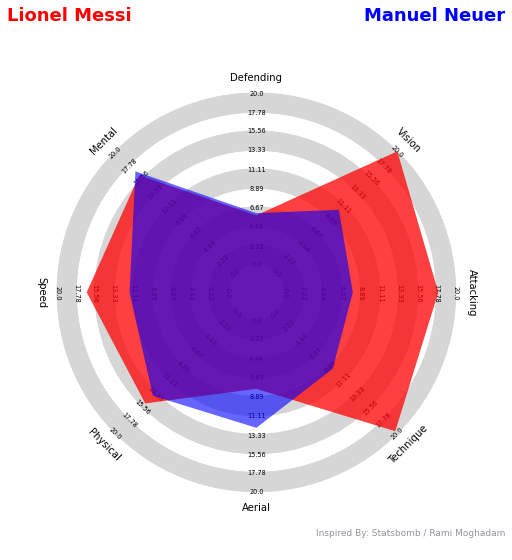

In [38]:
compparison_player ('Lionel Messi', 'Manuel Neuer')

10104
[[13.75, 11.5, 16.666666666666668, 14.5, 14.0, 14.5, 18.5, 18], [15.0, 16.5, 16.0, 1.5, 2.0, 2.0, 1.5, 2]]


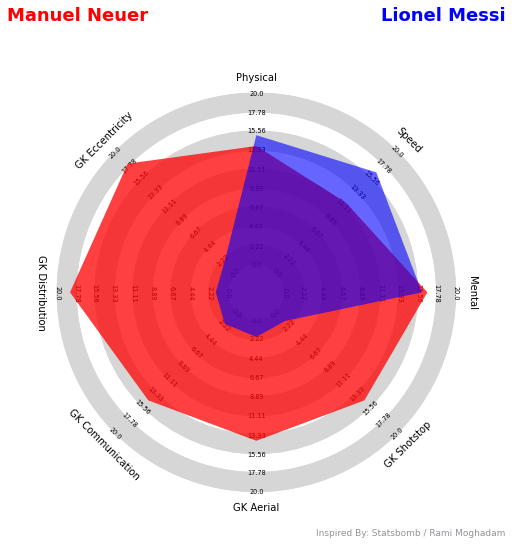

In [39]:
compparison_player ('Manuel Neuer', 'Lionel Messi')

10104
[[5.75, 20.0, 18.0, 19.666666666666668, 8.0, 15.0, 16.5, 16.0], [1.25, 17.333333333333332, 17.0, 19.333333333333332, 7.0, 13.75, 16.5, 13.166666666666666]]


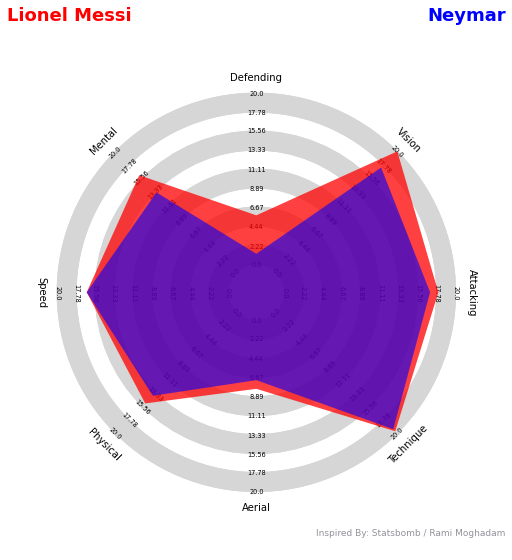

In [40]:
compparison_player ('Lionel Messi', 'Neymar')

10104
[[13.75, 11.5, 16.666666666666668, 14.5, 14.0, 14.5, 18.5, 18], [13.5, 13.0, 14.0, 18.0, 17.0, 11.0, 11.0, 10]]


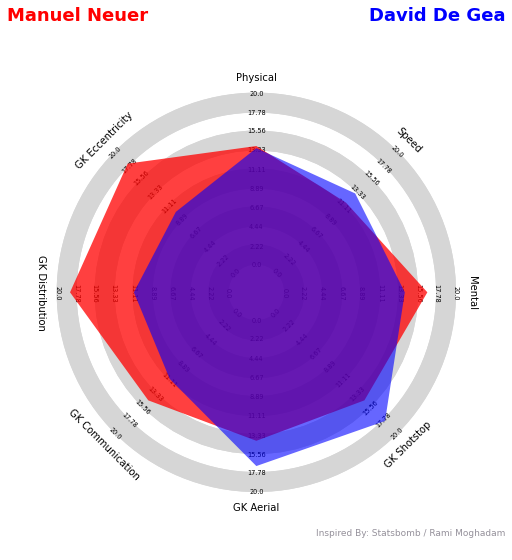

In [41]:
compparison_player ('Manuel Neuer', 'David De Gea')

### Club Atributte Analysis

In [42]:
#total profit dan total sales untuk setiap kota dan kategori
df_club = data.groupby(['Club']).agg({
    'Wor':'mean','Vis':'mean','Thr':'mean',
    'Tec':'mean','Tea':'mean','Tck':'mean',
    'Str':'mean','Sta':'mean','TRO':'mean',
    'Ref':'mean','Pun':'mean','Pos':'mean',
    'Pen':'mean','Pas':'mean','Pac':'mean',
    '1v1':'mean','OtB':'mean','Nat':'mean',
    'Mar':'mean','L Th':'mean', 'Lon':'mean',
    'Ldr':'mean','Kic':'mean','Jum':'mean',
    'Hea':'mean','Han':'mean','Fre':'mean',
    'Fla':'mean','Fir':'mean','Fin':'mean',
    'Ecc':'mean','Dri':'mean','Det':'mean',
    'Dec':'mean','Cro':'mean','Cor':'mean',
    'Cnt':'mean','Cmp':'mean','Com':'mean',
    'Cmd':'mean','Bra':'mean','Bal':'mean',
    'Ant':'mean','Agi':'mean','Agg':'mean',
    'Aer':'mean','Acc':'mean', 
    'Defending' : 'mean',
    'Physical'  : 'mean',
    'Speed'     : 'mean',
    'Vision'    : 'mean',
    'Attacking' : 'mean',
    'Technique' : 'mean',
    'Aerial'    : 'mean',
    'Mental'    : 'mean',
}).reset_index()


In [43]:
df_club.head()

Club        Wor        Vis       Thr        Tec        Tea  \
0     1. FC KÃöln  11.152174   9.717391  2.978261  10.586957  11.043478   
1       A. Bilbao  11.976744  10.325581  2.511628  11.325581  10.860465   
2       A. Madrid  11.217391   9.869565  2.673913  11.000000  10.478261   
3             AAC   8.000000   5.000000  1.000000   8.000000   7.000000   
4  AD Sanjoanense  11.000000   8.000000  9.000000   8.000000  11.000000   

        Tck        Str        Sta       TRO        Ref       Pun        Pos  \
0  9.152174   9.630435  10.978261  3.456522   3.434783  3.065217   9.130435   
1  9.604651   9.116279  10.976744  3.139535   2.860465  3.069767  10.418605   
2  9.304348   9.608696  10.434783  2.695652   3.217391  2.630435   9.847826   
3  9.000000   8.000000  13.000000  3.000000   1.000000  2.000000   7.000000   
4  1.000000  11.000000  11.000000  9.000000  11.000000  8.000000  11.000000   

        Pen        Pas        Pac        1v1       OtB        Nat       Mar  \
0  7.108696  10.739130  12.782609   3.173913  8.804348  13.500000  8.000000   
1  6.604651  11.511628  12.976744   2.906977  9.767442  12.046512  8.418605   
2  7.500000  11.065217  12.891304   2.913043  9.413043  12.326087  8.478261   
3  3.000000   6.000000  13.000000   1.000000  7.000000  13.000000  8.000000   
4  3.000000   8.000000   9.000000  10.000000  7.000000  11.000000  2.000000   

       L Th       Lon        Ldr       Kic        Jum       Hea        Han  \
0  6.217391  8.173913   8.869565  3.282609  10.043478  8.260870   3.304348   
1  5.558140  8.906977   8.488372  2.837209   9.302326  9.372093   3.093023   
2  5.739130  8.021739   9.065217  2.847826  10.065217  9.565217   3.260870   
3  6.000000  7.000000  11.000000  1.000000   3.000000  6.000000   2.000000   
4  3.000000  3.000000  11.000000  8.000000  11.000000  7.000000  11.000000   

         Fre       Fla        Fir       Fin       Ecc       Dri        Det  \
0   7.500000  8.260870  10.521739  7.652174  3.347826  8.869565  13.239130   
1   8.348837  8.976744  11.767442  8.511628  2.651163  8.953488  11.418605   
2   7.739130  9.152174  11.304348  8.326087  2.086957  9.521739  12.000000   
3   6.000000  8.000000  12.000000  6.000000  2.000000  7.000000   6.000000   
4  10.000000  7.000000   9.000000  3.000000  8.000000  1.000000  11.000000   

         Dec       Cro       Cor        Cnt        Cmp        Com        Cmd  \
0  11.760870  8.413043  7.434783  10.086957  10.173913   2.978261   3.282609   
1  12.232558  8.488372  7.953488  10.418605  10.465116   2.674419   2.930233   
2  12.717391  8.586957  8.217391  10.086957  10.652174   2.869565   3.065217   
3  13.000000  8.000000  3.000000  10.000000   8.000000   3.000000   3.000000   
4  11.000000  2.000000  7.000000  11.000000   9.000000  10.000000  10.000000   

         Bra        Bal        Ant        Agi        Agg       Aer        Acc  \
0  10.891304  10.239130  10.391304  12.130435  10.630435  3.282609  12.239130   
1  11.279070  10.116279  10.837209  12.372093  11.348837  3.116279  13.162791   
2  10.282609  10.108696  10.652174  12.456522  11.565217  3.130435  12.978261   
3   8.000000   4.000000   9.000000  13.000000   9.000000  3.000000  13.000000   
4  11.000000  11.000000  11.000000  11.000000  11.000000  9.000000   9.000000   

   Defending   Physical      Speed     Vision  Attacking  Technique    Aerial  \
0   8.858696  10.744565  12.510870   9.572464   8.876812   9.992754  9.152174   
1   9.511628  10.645349  13.069767  10.271318   9.581395  10.682171  9.337209   
2   9.233696  10.652174  12.934783  10.028986   9.463768  10.608696  9.815217   
3   8.250000   9.500000  13.000000   6.333333   7.000000   9.000000  4.500000   
4   3.750000  11.000000   9.000000   7.666667   6.333333   6.000000  9.000000   

      Mental  
0  11.235507  
1  11.174419  
2  11.036232  
3   8.833333  
4  11.000000

In [44]:
df_club[48:]

Club        Wor        Vis       Thr        Tec  \
48   Argentino (Quilmes)  13.000000  11.000000  1.000000  10.000000   
49       Argentinos Jrs.  11.044118   9.426471  3.088235  10.294118   
50          Armacenenses  11.000000   8.000000  1.000000  11.000000   
51     Arminia Bielefeld  12.031250  10.562500  3.281250  11.093750   
52                Arouca  13.000000  15.000000  3.000000  10.000000   
..                   ...        ...        ...       ...        ...   
524              Yeclano   7.500000   7.000000  5.500000   5.000000   
525            Yuen Long   6.000000   4.000000  2.000000  11.000000   
526    Zamora F.C. (VEN)  13.000000   9.000000  3.000000  10.000000   
527               Zárich  12.000000   9.000000  2.000000  11.000000   
528      água Santa (SP)  14.000000  10.500000  2.500000  13.000000   

           Tea        Tck        Str        Sta       TRO       Ref       Pun  \
48    8.000000   8.000000   1.000000   8.000000  2.000000  1.000000  1.000000   
49   10.029412   9.073529   8.764706   9.691176  3.044118  3.352941  2.985294   
50   10.000000   9.000000   9.000000  11.000000  2.000000  3.000000  4.000000   
51   11.781250   9.375000  10.500000  11.656250  3.062500  3.343750  3.125000   
52   11.000000  12.000000  11.000000   9.000000  1.000000  1.000000  3.000000   
..         ...        ...        ...        ...       ...       ...       ...   
524   7.500000   1.000000   8.000000   4.500000  4.000000  9.000000  5.500000   
525   5.000000   2.000000  11.000000  10.000000  3.000000  2.000000  3.000000   
526  13.000000  12.000000  12.000000  11.000000  3.000000  2.000000  1.000000   
527  12.000000  12.000000  12.000000  13.000000  1.000000  3.000000  3.000000   
528  12.000000   9.500000  11.500000  13.000000  1.500000  2.000000  3.000000   

           Pos        Pen        Pas        Pac       1v1        OtB  \
48    4.000000   6.000000  10.000000  14.000000  4.000000  13.000000   
49    9.617647   6.323529  10.691176  12.264706  3.058824   9.514706   
50    8.000000   6.000000  11.000000  10.000000  1.000000  10.000000   
51   10.031250   8.156250  11.500000  12.562500  3.000000   9.218750   
52   10.000000   8.000000  12.000000   9.000000  3.000000   4.000000   
..         ...        ...        ...        ...       ...        ...   
524  10.000000   6.000000   8.000000  14.000000  4.000000   8.500000   
525   6.000000   6.000000   6.000000  12.000000  1.000000   7.000000   
526  11.000000  12.000000  12.000000  12.000000  3.000000  13.000000   
527  12.000000   8.000000  12.000000  13.000000  1.000000   9.000000   
528   7.500000  10.500000  12.500000  13.000000  2.500000  11.500000   

          Nat        Mar       L Th        Lon        Ldr       Kic  \
48   15.00000   4.000000   5.000000   5.000000   5.000000  2.000000   
49   12.25000   8.117647   6.470588   8.205882   8.382353  3.058824   
50   12.00000   7.000000   9.000000  11.000000   7.000000  2.000000   
51   13.21875   8.031250   6.437500   8.437500   9.062500  3.500000   
52   12.00000   8.000000   9.000000   9.000000   4.000000  4.000000   
..        ...        ...        ...        ...        ...       ...   
524  13.00000   4.500000   3.000000   5.000000   6.500000  6.500000   
525   8.00000   4.000000   1.000000   6.000000   4.000000  2.000000   
526  11.00000  12.000000  12.000000   7.000000  13.000000  1.000000   
527  12.00000  12.000000   8.000000   6.000000   9.000000  2.000000   
528  13.50000   8.500000   7.500000  10.000000   8.000000  1.500000   

           Jum        Hea       Han        Fre        Fla        Fir  \
48    4.000000   7.000000  1.000000   7.000000  13.000000  12.000000   
49    8.735294   8.882353  3.426471   7.573529   7.911765  11.338235   
50    7.000000   7.000000  1.000000  11.000000  13.000000  11.000000   
51   11.343750   8.718750  3.281250   8.187500   8.500000  10.906250   
52    5.000000   8.000000  2.000000   5.000000  10.000000  11.000000   
..         ...        ...       ...        .

In [45]:
c_values = []
params = list(df_club.columns)
params = params[48:]
params

def attribute (club) :

    ## parameter value
    for x in range(len(df_club['Club'])):
        if df_club['Club'][x] == club:
            c_values = df_club.iloc[x].values.tolist()
    
    values = c_values[48:]
    print(values)
    print(len(values))
    
    ## title values
    title = dict(
        title_name=club,
        title_color="#E3DDED",
        subtitle_color="#C72C41",
        title_name_2="Atributte",
        title_color_2="#E3DDED",
        subtitle_color_2='#C72C41',
        title_fontsize=18,
        subtitle_fontsize=15)
    
    ## endnote 
    endnote = "Visualization made by: Shift Academy Batch 15"

    ## instantiate object 
    radar = Radar(background_color="#121212", patch_color="#28252C", label_color="#FFFFFF",
              range_color="#FFFFFF")
              
    ## plot radar
    fig, ax = radar.plot_radar(ranges=ranges, params=params, 
                           values=values, radar_color=['#1c547f', '#CF6679'], 
                              title=title, endnote=endnote)
    


[9.511627906976743, 10.645348837209303, 13.069767441860465, 10.271317829457365, 9.581395348837209, 10.682170542635658, 9.337209302325581, 11.174418604651162]
8


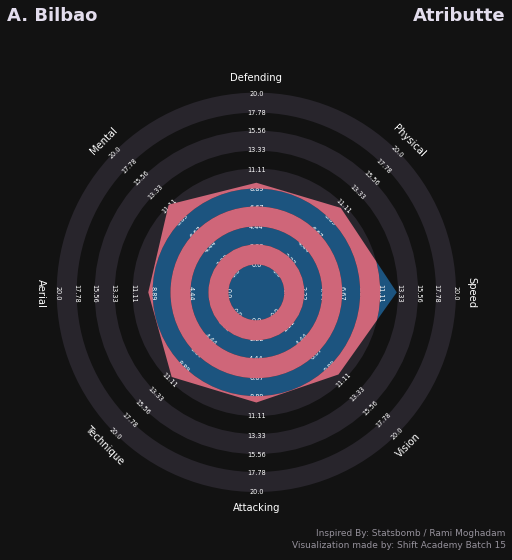

In [46]:
attribute ('A. Bilbao')

### Comparison Club Atribut Analysis

In [47]:
#add ranges to list of tuple pairs
c_values = []
d_values = []

def compparison (nama1, nama2) :
   
    for x in range(len(df_club['Club'])):
        if df_club['Club'][x] == nama1:
            c_values = df_club.iloc[x].values.tolist()
        if df_club['Club'][x] == nama2:
            d_values = df_club.iloc[x].values.tolist()
        
    c_values = c_values[48:]
    d_values = d_values[48:]

    values = [c_values,d_values]
    print (values)
    #title 

    title = dict(
    title_name=nama1,
    title_color = 'red',
    subtitle_color = 'red',
    title_name_2=nama2,
    title_color_2 = 'blue',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize=15)
        
    radar = Radar()

    fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                         alphas=[.75,.6],title=title,
                         compare=True)

[[9.511627906976743, 10.645348837209303, 13.069767441860465, 10.271317829457365, 9.581395348837209, 10.682170542635658, 9.337209302325581, 11.174418604651162], [9.878787878787879, 11.871212121212121, 13.454545454545455, 10.717171717171718, 10.353535353535355, 11.222222222222223, 10.484848484848484, 12.116161616161616]]


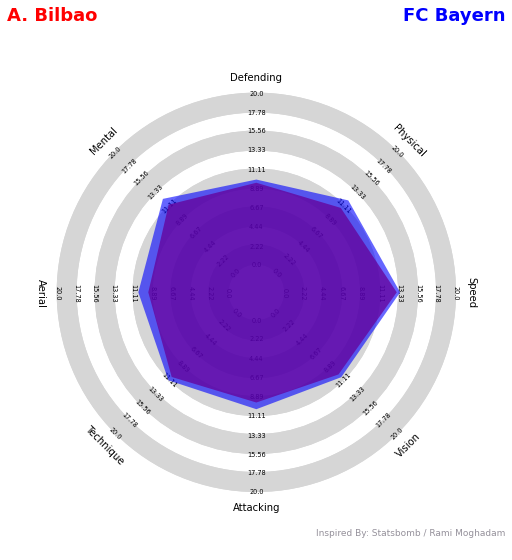

In [48]:
compparison ('A. Bilbao','FC Bayern')

## Recomendation System

### a. Content-Based Filtering By Position

In [49]:
dx_cat = data[['Name', 'Position', 'Best Pos', 'Best Role', 'Nation', 'Club', 'Division']]
dx_cat.head()

Name                Position Best Pos Best Role Nation  \
0       Lionel Messi         AM (RC), ST (C)   AM (R)        IF    ARG   
1  Cristiano Ronaldo         AM (RL), ST (C)   ST (C)        CF    POR   
2      Kylian Mbappé         AM (RL), ST (C)   ST (C)        AF    FRA   
3       Manuel Neuer                      GK       GK        SK    GER   
4             Neymar  M (L), AM (LC), ST (C)   AM (L)        IW    BRA   

        Club                Division  
0  Barcelona  Spanish First Division  
1   Juventus         Italian Serie A  
2   Paris SG       Ligue 1 Conforama  
3  FC Bayern              Bundesliga  
4   Paris SG       Ligue 1 Conforama

In [50]:
dx_cat['All Pos'] = dx_cat['Best Pos'] + ',' + dx_cat['Position']

In [51]:
dx_cat.head()

Name                Position Best Pos Best Role Nation  \
0       Lionel Messi         AM (RC), ST (C)   AM (R)        IF    ARG   
1  Cristiano Ronaldo         AM (RL), ST (C)   ST (C)        CF    POR   
2      Kylian Mbappé         AM (RL), ST (C)   ST (C)        AF    FRA   
3       Manuel Neuer                      GK       GK        SK    GER   
4             Neymar  M (L), AM (LC), ST (C)   AM (L)        IW    BRA   

        Club                Division                        All Pos  
0  Barcelona  Spanish First Division         AM (R),AM (RC), ST (C)  
1   Juventus         Italian Serie A         ST (C),AM (RL), ST (C)  
2   Paris SG       Ligue 1 Conforama         ST (C),AM (RL), ST (C)  
3  FC Bayern              Bundesliga                          GK,GK  
4   Paris SG       Ligue 1 Conforama  AM (L),M (L), AM (LC), ST (C)

In [52]:
dx_cat['All Pos']=dx_cat['All Pos'].str.replace(" ","",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("AM(LC)","AM(L),AM(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("AM(RC)","AM(R),AM(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("AM(RL)","AM(R),AM(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("AM(RLC)","AM(R),AM(L),AM(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D(LC)","D(L),D(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D(RC)","D(R),D(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D(RL)","D(R),D(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D(RLC)","D(R),D(L),D(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/AM(C)","D(C),AM(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/AM(L)","D(L),AM(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/AM(R)","D(R),AM(R)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/M(C)","D(C),M(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/M(L)","D(L),M(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/M(LC)","D(L),AM(L),D(C),AM(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/M(R)","D(R),M(R)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/M(RC)","D(R),AM(R),D(C),AM(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/M(RL)","D(R),AM(R),D(L),AM(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/M/AM(C)","D(C),M(C),AM(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/M/AM(R)","D(R),M(R),AM(R)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/M/AM(RL)","D(R),M(R),AM(R),D(L),M(L),AM(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/WB(L)","D(L),WB(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/WB(R)","D(R),WB(R)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/WB(RL)","D(R),WB(R),D(L),WB(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/WB/AM(L)","D(L),WB(L),AM(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/WB/AM(R)","D(R),WB(R),AM(R)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/WB/AM(RL)","D(R),WB(R),AM(R),D(L),WB(L),AM(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/WB/M(L)","D(L),WB(L),M(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/WB/M(R)","D(R),WB(R),M(R)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/WB/M(RL)","D(R),WB(R),M(R),D(L),WB(L),M(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/WB/M/AM(R)","D(R),WB(R),M(R),AM(R)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/WB/M/AM(L)","D(L),WB(L),M(L),AM(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("D/WB/M/AM(RL)","D(R),WB(R),M(R),AM(R),D(L),WB(L),M(L),AM(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("M(LC)","M(L),M(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("M(RC)","M(R),M(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("M(RL)","M(R),M(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("M(RLC)","M(R),M(L),M(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("M/AM(C)","M(C),AM(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("M/AM(L)","M(L),AM(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("M/AM(LC)","M(L),AM(L),M(C),AM(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("M/AM(R)","M(R),AM(R),M(R),AM(R)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("M/AM(RC)","M(R),AM(R),M(C),AM(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("M/AM(RL)","M(R),AM(R),M(L),AM(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("M/AM(RLC)","M(R),AM(R),M(L),AM(L),M(C),AM(C)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("WB(RL)","WB(R),WB(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("WB/AM(L)","WB(L),AM(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("WB/AM(R)","WB(R),AM(R)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("WB/M(L)","WB(L),M(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("WB/M(R)","WB(R),M(R)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("WB/M(RL)","WB(R),M(R),WB(L),M(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("WB/M/AM(L)","WB(L),M(L),AM(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("WB/M/AM(R)","WB(R),M(R),AM(R)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("WB/M/AM(RL)","WB(R),M(R),AM(R),WB(L),M(L),AM(L)",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("WB/M/AM(RL)","WB(R),M(R),AM(R),WB(L),M(L),AM(L)",regex=False)

In [53]:
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("(R)","_R",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("(L)","_L",regex=False)
dx_cat['All Pos']=dx_cat['All Pos'].str.replace("(C)","_C",regex=False)

In [54]:
dx_cat.head()

Name                Position Best Pos Best Role Nation  \
0       Lionel Messi         AM (RC), ST (C)   AM (R)        IF    ARG   
1  Cristiano Ronaldo         AM (RL), ST (C)   ST (C)        CF    POR   
2      Kylian Mbappé         AM (RL), ST (C)   ST (C)        AF    FRA   
3       Manuel Neuer                      GK       GK        SK    GER   
4             Neymar  M (L), AM (LC), ST (C)   AM (L)        IW    BRA   

        Club                Division                  All Pos  
0  Barcelona  Spanish First Division      AM_R,AM_R,AM_C,ST_C  
1   Juventus         Italian Serie A      ST_C,AM_R,AM_L,ST_C  
2   Paris SG       Ligue 1 Conforama      ST_C,AM_R,AM_L,ST_C  
3  FC Bayern              Bundesliga                    GK,GK  
4   Paris SG       Ligue 1 Conforama  AM_L,M_L,AM_L,AM_C,ST_C

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
position_mat = cv.fit_transform(dx_cat['All Pos'])
cv.get_feature_names()

['am_c',
 'am_l',
 'am_r',
 'd_c',
 'd_l',
 'd_r',
 'dm',
 'gk',
 'm_c',
 'm_l',
 'm_r',
 'st_c',
 'wb_l',
 'wb_r']

In [56]:
position_mat = position_mat.toarray()
df_position = pd.DataFrame(position_mat, columns=cv.get_feature_names())
df_position

am_c  am_l  am_r  d_c  d_l  d_r  dm  gk  m_c  m_l  m_r  st_c  wb_l  \
0         1     0     2    0    0    0   0   0    0    0    0     1     0   
1         0     1     1    0    0    0   0   0    0    0    0     2     0   
2         0     1     1    0    0    0   0   0    0    0    0     2     0   
3         0     0     0    0    0    0   0   2    0    0    0     0     0   
4         1     2     0    0    0    0   0   0    0    1    0     1     0   
...     ...   ...   ...  ...  ...  ...  ..  ..  ...  ...  ...   ...   ...   
10100     0     0     0    0    0    0   0   0    2    0    0     0     0   
10101     0     0     0    0    0    0   0   0    2    0    0     0     0   
10102     0     0     2    0    0    0   0   0    0    0    0     1     0   
10103     0     0     0    0    0    0   0   0    0    0    0     2     0   
10104     2     0     0    0    0    0   0   0    1    0    0     0     0   

       wb_r  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
10100     0  
10101     0  
10102     0  
10103     0  
10104     0  

[10105 rows x 14 columns]

In [57]:
dx_cat[['Name', 'Position', 'Best Pos', 'Nation', 'Club']]

Name                Position Best Pos Nation       Club
0           Lionel Messi         AM (RC), ST (C)   AM (R)    ARG  Barcelona
1      Cristiano Ronaldo         AM (RL), ST (C)   ST (C)    POR   Juventus
2          Kylian Mbappé         AM (RL), ST (C)   ST (C)    FRA   Paris SG
3           Manuel Neuer                      GK       GK    GER  FC Bayern
4                 Neymar  M (L), AM (LC), ST (C)   AM (L)    BRA   Paris SG
...                  ...                     ...      ...    ...        ...
10100       Manuel Botta                   M (C)    M (C)    ITA  Benevento
10101        Mattia Mora                   M (C)    M (C)    ITA      Genoa
10102               Madu          AM (R), ST (C)   AM (R)    POR  Famalicáo
10103  Riccardo Bellucci                  ST (C)   ST (C)    ITA  Sampdoria
10104      Amadou Traoré                M/AM (C)   AM (C)    GUI   Sassuolo

[10105 rows x 5 columns]

In [58]:
dxnew_cat = dx_cat[['Name', 'Position', 'Best Pos', 'Nation', 'Club']].join(df_position)
dxnew_cat.head()

Name                Position Best Pos Nation       Club  am_c  \
0       Lionel Messi         AM (RC), ST (C)   AM (R)    ARG  Barcelona     1   
1  Cristiano Ronaldo         AM (RL), ST (C)   ST (C)    POR   Juventus     0   
2      Kylian Mbappé         AM (RL), ST (C)   ST (C)    FRA   Paris SG     0   
3       Manuel Neuer                      GK       GK    GER  FC Bayern     0   
4             Neymar  M (L), AM (LC), ST (C)   AM (L)    BRA   Paris SG     1   

   am_l  am_r  d_c  d_l  d_r  dm  gk  m_c  m_l  m_r  st_c  wb_l  wb_r  
0     0     2    0    0    0   0   0    0    0    0     1     0     0  
1     1     1    0    0    0   0   0    0    0    0     2     0     0  
2     1     1    0    0    0   0   0    0    0    0     2     0     0  
3     0     0    0    0    0   0   2    0    0    0     0     0     0  
4     2     0    0    0    0   0   0    0    1    0     1     0     0

In [59]:
dx_cos = dxnew_cat.iloc[:, 5:]
dx_cos.head()

am_c  am_l  am_r  d_c  d_l  d_r  dm  gk  m_c  m_l  m_r  st_c  wb_l  wb_r
0     1     0     2    0    0    0   0   0    0    0    0     1     0     0
1     0     1     1    0    0    0   0   0    0    0    0     2     0     0
2     0     1     1    0    0    0   0   0    0    0    0     2     0     0
3     0     0     0    0    0    0   0   2    0    0    0     0     0     0
4     1     2     0    0    0    0   0   0    0    1    0     1     0     0

In [60]:
coScore_player = cosine_similarity(dx_cos)
coScore_player

array([[1.        , 0.66666667, 0.66666667, ..., 0.91287093, 0.40824829,
        0.36514837],
       [0.66666667, 1.        , 1.        , ..., 0.73029674, 0.81649658,
        0.        ],
       [0.66666667, 1.        , 1.        , ..., 0.73029674, 0.81649658,
        0.        ],
       ...,
       [0.91287093, 0.73029674, 0.73029674, ..., 1.        , 0.4472136 ,
        0.        ],
       [0.40824829, 0.81649658, 0.81649658, ..., 0.4472136 , 1.        ,
        0.        ],
       [0.36514837, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [61]:
player_liked = input('Which player do you like? ')
index_suka = dxnew_cat[dxnew_cat['Name']==player_liked].index
player_rec = list(enumerate(coScore_player[index_suka[0]]))

your_rec = sorted(player_rec, key = lambda x : x[1], reverse = True)

recom = your_rec[0:21]

print('Other player have atribute like:')
for i in range(len(recom)):
    display(data.loc[[recom[i][0]]])


Which player do you like? Joaquín Correa
Other player have atribute like:


Name                 Position       Club                  Division  \
9  Gareth Bale  M (L), AM (RLC), ST (C)  Tottenham  English Premier Division   

                        Based Nation  Height  Weight  Age Preferred Foot  \
9  England (Premier Division)    WAL     185      82   29           Left   

  Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
9   AM (L)         W  75000000  525000  173  186   10   13    1   16   10   

   Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
9    9   17   17    3    1    3    7   13   14   17    1   18   12    6    15   

   Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
9   19    9    2   15   18    2   17   17   14   17    2   16   12   12   16   

   Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
9   14   11   12    3    2   11   13   14   13   11    2   14       7.75   

      Vision  Attacking  Technique  Aerial  Physical  Speed     Mental  \
9  14.666667  15.666667  15.333333    16.5      15.0   15.5  11.666667   

   GK Shotstop  GK Aerial  GK Communication  GK Distribution  GK Eccentricity  
9          1.0        2.0               2.5              1.5                2

Name                 Position   Club         Division  \
408  Bobby Adekanye  M (L), AM (RLC), ST (C)  Lazio  Italian Serie A   

               Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
408  Italy (Serie A)    NED     170      66   20      Left Only   AM (L)   

    Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
408         W  2100000  12500  118  159   15   11    2   14    9    8    8   

     Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
408    9    4    2    3    3    7   10   15    3   15    9    7     3    8   

     Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
408    3    4    7    6    3    7   15   13   10    3   15   14    9   12   

     Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
408    7    8   11    1    2    9    9   11   14    8    3   16        6.5   

     Vision  Attacking  Technique  Aerial  Physical  Speed  Mental  \
408    12.0       12.0       14.0     6.5      10.0   15.5    10.0   

     GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
408          2.5        3.0               1.5              3.0   

     GK Eccentricity  
408                3

Name                 Position   Club         Division  \
422  Joaquín Correa  M (L), AM (RLC), ST (C)  Lazio  Italian Serie A   

               Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
422  Italy (Serie A)    ARG     188      75   24          Right   AM (L)   

    Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
422        IW  35500000  46000  154  159   12   15    3   16   12    5   12   

     Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
422   12    1    3    3    5   12   14   15    2   17   14    4     4   12   

     Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
422   11    1   12    8    2    9   18   15   12    3   17   15   12   12   

     Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
422   11   11   12    2    3   10   11   16   15   12    2   16       4.75   

        Vision  Attacking  Technique  Aerial  Physical  Speed     Mental  \
422  15.666667  13.666667       16.0    10.0      12.5   15.5  12.666667   

     GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
422          2.5        2.0               2.5              2.0   

     GK Eccentricity  
422                3

Name                 Position   Club         Division  \
871  Ante Rebic  M (L), AM (RLC), ST (C)  Milan  Italian Serie A   

               Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
871  Italy (Serie A)    CRO     185      77   25          Right   AM (L)   

    Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
871        IW  11250000  100000  139  150   17   12    3   13   11   10   14   

     Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
871   14    2    3    3   10   10   11   16    1   14   13    5     3   11   

     Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
871    5    2   11   10    3    5   14   12   12    4   15   14    9   12   

     Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
871    4   12   10    3    1   17   18   12   12   18    3   15       8.75   

        Vision  Attacking  Technique  Aerial  Physical  Speed  Mental  \
871  12.333333       12.0  13.333333    10.5      14.5   15.5    12.5   

     GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
871          2.0        3.0               2.0              2.5   

     GK Eccentricity  
871                4

Name                 Position      Club                Division  \
1536  Manu Vallejo  M (L), AM (RLC), ST (C)  Valencia  Spanish First Division   

                       Based Nation  Height  Weight  Age Preferred Foot  \
1536  Spain (First Division)    ESP     167      72   22          Right   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1536   AM (L)        IW  8750000  16500  133  144   13   12    2   14   11   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1536    7   12   10    3    2    2    6   14   12   13    3   15   14    5   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1536    12   12   10    2    5    8    3   11   13   12   15    4   13   15   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1536   11   11   12   12   10    1    2   13   14   14   15   10    2   15   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
1536       6.25  12.333333  13.333333       13.0     6.5     12.75   14.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1536  12.666667          2.5        2.5               1.5              2.0   

      GK Eccentricity  
1536                4

Name                 Position    Club  \
3736  Tailson  M (L), AM (RLC), ST (C)  Santos   

                               Division                    Based Nation  \
3736  Brazilian National First Division  Brazil (First Division)    BRA   

      Height  Weight  Age Preferred Foot Best Pos Best Role  Value  Wage   CA  \
3736     174      66   20          Right   AM (L)        IW  22500   550  110   

       PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  \
3736  130   11   13    3   12   10   10    7   11    1    4    1   10    5   

      Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  \
3736   14   12    3   13   11    8     9    7    8    1    8   10    1    9   

      Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  \
3736   15    9   12    1   14   11   14   14   10    9   12    2    3   10   

      Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  Technique  \
3736   10   14   12    7    3   13        9.5    14.0  12.333333  11.666667   

      Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
3736     9.0      10.0   12.5  11.333333          3.5        2.0   

      GK Communication  GK Distribution  GK Eccentricity  
3736               2.5              2.0                1

Name                  Position       Club  \
339  Steven Bergwijn  M (RL), AM (RLC), ST (C)  Tottenham   

                     Division                       Based Nation  Height  \
339  English Premier Division  England (Premier Division)    NED     178   

     Weight  Age Preferred Foot Best Pos Best Role     Value   Wage   CA   PA  \
339      78   21          Right   AM (L)        IW  34500000  75000  149  161   

     Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  \
339   11   13    2   14   12    4   12   12    3    2    3    7    8   12   

     Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  \
339   15    3   13   14    4     5   13    5    2    8    7    1   12   16   

     Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  \
339   14   11    3   15   13   11   13    9   12   11    2    1   13   14   

     Ant  Agi  Agg  Aer  Acc  Defending     Vision  Attacking  Technique  \
339   14   16   10    4   15       4.75  13.666667  11.666667  14.333333   

     Aerial  Physical  Speed  Mental  GK Shotstop  GK Aerial  \
339     7.5      13.5   15.0    12.5          2.5        2.5   

     GK Communication  GK Distribution  GK Eccentricity  
339               1.5              2.0                3

Name                  Position      Club                   Division  \
790  Jesé  M (RL), AM (RLC), ST (C)  Sporting  Portuguese Premier League   

                         Based Nation  Height  Weight  Age Preferred Foot  \
790  Portugal (Premier League)    ESP     178      72   26          Right   

    Best Pos Best Role    Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
790   AM (L)        IW  4700000  100000  128  152    7   12    1   16   10   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
790    5   11   12    3    3    1    5   13   12   14    4   14    9    4   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
790     5   12    8    2    9    8    2   12   16   15   12    3   15   12   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
790    7    9   13    6   11    3    2   11   12   13   16   13    3   14   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
790       4.75  13.333333  12.333333  15.333333     8.5     12.75   14.0   

       Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
790  9.833333          3.5        2.5               2.5              1.5   

     GK Eccentricity  
790                3

Name                  Position     Club  \
1704  Jay Rodriguez  M (RL), AM (RLC), ST (C)  Burnley   

                      Division                       Based Nation  Height  \
1704  English Premier Division  England (Premier Division)    ENG     186   

      Weight  Age Preferred Foot Best Pos Best Role     Value   Wage   CA  \
1704      70   29          Right   AM (L)        IW  16000000  50000  132   

       PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  \
1704  142   14   13    2   13   14   10   13   13    3    2    3    8   13   

      Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  \
1704   12   14    3   14   15   10     2   13    7    1   13   13    4    6   

      Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  \
1704   14   13   14    2   13   14   13    8    3   11   13    3    2   13   

      Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  Technique  \
1704   11   12   12   13    1   13        9.5    13.0  13.666667       13.0   

      Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
1704    13.0     12.25   13.5  12.833333          2.5        2.5   

      GK Communication  GK Distribution  GK Eccentricity  
1704               2.5              1.5                2

Name                  Position    Club                Division  \
2183  Borja García  M (RL), AM (RLC), ST (C)  Huesca  Spanish First Division   

                       Based Nation  Height  Weight  Age Preferred Foot  \
2183  Spain (First Division)    ESP     173      73   28          Right   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
2183   AM (L)        IW  10500000  29000  135  138    8   11    1   14    8   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
2183    4    9   13    2    2    3   10   10   12   14    4   14   14    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
2183     6    7   12    2    8    8    1    9   13   13   14    2   14   15   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
2183   13   12   12   14   13    1    4   10   13   12   13   15    3   15   

      Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
2183       5.25    12.0  13.666667  13.666667     8.0      12.0   14.5   

      Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
2183    12.0          3.0        2.0               2.5              1.5   

      GK Eccentricity  
2183                2

Name                  Position        Club  \
3141  Luther Singh  M (RL), AM (RLC), ST (C)  Moreirense   

                       Division                      Based Nation  Height  \
3141  Portuguese Premier League  Portugal (Premier League)    RSA     171   

      Weight  Age Preferred Foot Best Pos Best Role    Value  Wage   CA   PA  \
3141      60   21     Right Only   AM (L)        IW  1400000  3900  118  133   

      Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  \
3141   13   12    1   14    6    9    5   12    3    3    1    5    8   11   

      Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  \
3141   14    1   13   13    4     4   12    3    3    5    5    3   12   17   

      Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  \
3141   13    7    4   15   12   11   13   11   12   11    2    3   11   11   

      Ant  Agi  Agg  Aer  Acc  Defending     Vision  Attacking  Technique  \
3141    8   14   13    3   15       6.75  13.333333  10.333333       14.0   

      Aerial  Physical  Speed  Mental  GK Shotstop  GK Aerial  \
3141     5.0      10.5   14.5    10.0          2.0        3.0   

      GK Communication  GK Distribution  GK Eccentricity  
3141               2.5              2.0                4

Name                Position      Club           Division  \
4  Neymar  M (L), AM (LC), ST (C)  Paris SG  Ligue 1 Conforama   

                        Based Nation  Height  Weight  Age Preferred Foot  \
4  France (Ligue 1 Conforama)    BRA     175      68   27          Right   

  Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
4   AM (L)        IW  91000000  600000  186  190   10   16    1   20    8   

   Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
4    1   10   13    1    4    2    2   17   16   16    1   18   14    1     2   

   Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
4   15   14    2    6    8    2   17   20   18   16    1   20   16   15   16   

   Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
4   16   10   17    3    1   14   14   16   18   10    4   17       1.25   

      Vision  Attacking  Technique  Aerial  Physical  Speed     Mental  \
4  17.333333       17.0  19.333333     7.0     13.75   16.5  13.166667   

   GK Shotstop  GK Aerial  GK Communication  GK Distribution  GK Eccentricity  
4          2.5        3.0               2.0              1.5                1

Name          Position   Club         Division            Based  \
24  Alexis Sánchez  AM (RLC), ST (C)  Inter  Italian Serie A  Italy (Serie A)   

   Nation  Height  Weight  Age Preferred Foot Best Pos Best Role     Value  \
24    CHI     169      70   30          Right   AM (L)        IW  25000000   

      Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
24  200000  151  182   15   14    2   17   12    6    9   11    1    3    1   

    Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
24    7   12   14   15    2   16   11    5     4   14   11    2    7   13   

    Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
24    2   14   16   15   14    3   16   12   14   14   12   13   14    1    4   

    Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending     Vision  Attacking  \
24   15   13   14   15   14    4   16        6.0  14.666667  14.666667   

    Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
24       16.0    10.0      12.0   15.5  13.333333          2.5        3.0   

    GK Communication  GK Distribution  GK Eccentricity  
24               2.5              2.0                3

Name          Position Club           Division  \
53  Rayan Cherki  AM (RLC), ST (C)   OL  Ligue 1 Conforama   

                         Based Nation  Height  Weight  Age Preferred Foot  \
53  France (Ligue 1 Conforama)    FRA     177      71   15         Either   

   Best Pos Best Role   Value  Wage  CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
53   AM (L)        IW  175000    60  92  177    7   12    1   15    8    3   

    Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
53   10    6    3    4    2    5    9   11   10    3   11   12    3     3   

    Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
53    9    8    1    7    4    2   12   16   13   11    3   14   15    9    9   

    Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
53   12    7   12    1    1    8   10    8   11    6    2   10        3.5   

    Vision  Attacking  Technique  Aerial  Physical  Speed    Mental  \
53    13.0  11.333333       14.0     5.5      9.25   10.0  9.166667   

    GK Shotstop  GK Aerial  GK Communication  GK Distribution  GK Eccentricity  
53          3.5        2.0               1.0              1.0                3

Name                Position    Club         Division  \
149  Lorenzo Insigne  M (L), AM (LC), ST (C)  Napoli  Italian Serie A   

               Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
149  Italy (Serie A)    ITA     163      59   28          Right   AM (L)   

    Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
149        IW  53000000  140000  161  169   12   17    3   17   14    5    5   

     Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
149   14    2    1    1    8   15   17   14    1   16   14    5     3   13   

     Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
149   15    3    3    6    2   14   18   18   13    2   15   15   12   15   

     Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
149   14   11   13    2    1   12    9   14   18   10    1   17       5.75   

        Vision  Attacking  Technique  Aerial  Physical  Speed  Mental  \
149  17.333333       14.0  16.666667     4.5      11.5   15.5    13.0   

     GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
149          1.0        1.5               1.5              3.0   

     GK Eccentricity  
149                2

Name         Position       Club                Division  \
177  Thomas Lemar  M (L), AM (RLC)  A. Madrid  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
177  Spain (First Division)    FRA     170      58   23           Left   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
177   AM (L)         W  27000000  105000  150  168   15   15    3   17   14   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
177    6    9   13    4    2    3    8   14   16   15    3   14   14    7   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
177     2   13   10    3    7    6    2   16   16   16   12    2   16   15   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
177   13   15   16   12   13    2    2   10   11   12   17    9    3   15   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
177       6.75  15.666667       13.0  16.333333     6.5      12.5   15.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
177  12.666667          2.5        2.5               2.0              3.0   

     GK Eccentricity  
177                2

Name                Position       Club                Division  \
286  Nico Serrano  M (L), AM (RL), ST (C)  A. Bilbao  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
286  Spain (First Division)    ESP     181      64   16           Left   

    Best Pos Best Role   Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
286   AM (L)         W  625000  3400  105  163   10   10    1    8    9    6   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
286    3   10    3    3    3    6    6   10   14    2   10   12    5     8   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
286    9    8    1    4   10    3    8   15   11   13    3   14   13   10   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
286   10    8    9   11    1    3    2   14    9   14   12    4   14   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
286       5.75  11.666667  11.333333       11.0     7.0     10.25   14.0   

       Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
286  8.666667          2.5        3.5               2.0              1.0   

     GK Eccentricity  
286                3

Name          Position     Club                  Division  \
324  Gabriel Martinelli  AM (RLC), ST (C)  Arsenal  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
324  England (Premier Division)    BRA     180      75   18          Right   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
324   AM (L)        IW  20000000  20000  138  161   16   12    2   15   15   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
324    5    9   13    3    3    3    6   11   12   15    3   14   13    5   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
324     5    8    6    1   11   13    3   10   16   14   12    1   15   15   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
324   10   10    5   12   12    1    3   13   10   13   16   12    2   16   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
324       5.25  13.333333  12.666667  14.666667    12.0      12.0   15.5   

     Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
324    13.0          3.0        2.5               2.0              1.5   

     GK Eccentricity  
324                1

Name          Position  Club           Division  \
331  Jonathan David  AM (RLC), ST (C)  LOSC  Ligue 1 Conforama   

                          Based Nation  Height  Weight  Age Preferred Foot  \
331  France (Ligue 1 Conforama)    CAN     177      77   19          Right   

    Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
331   AM (L)        IW  6250000  42000  130  161   11    8    2   13    8   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
331    5    9   11    3    2    1    4   12   10   16    1    7   15    8   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
331     9    9    6    2    9    8    3    8   12   12   14    1   13   12   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
331   13    8    8   11   14    2    2   12   10    8   12    6    3   16   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
331        5.5    10.0  11.666667  12.666667     8.5      10.5   16.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
331  10.666667          1.5        3.0               2.0              2.0   

     GK Eccentricity  
331                1

Name         Position   Club                Division  \
354  Bryan Gil  M (L), AM (RLC)  Eibar  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
354  Spain (First Division)    ESP     175      62   18           Left   

    Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
354   AM (L)         W  2900000  8500  124  160   12   13    1   14   10    3   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
354    8   13    2    1    3    5   10   12   14    2   14   12    2     3   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
354   11    7    1    7    8    4   10   18   13   12    2   14   15   12   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
354   12   10   11   11    1    3    9   13   13   14   10    3   15   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
354       3.25  14.333333  12.333333  13.666667     7.5      12.0   14.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
354  11.666667          1.5        3.5               2.0              1.0   

     GK Eccentricity  
354                2

Name          Position       Club                  Division  \
468  Harvey Barnes  AM (RLC), ST (C)  Leicester  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
468  England (Premier Division)    ENG     178      66   21         Either   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
468   AM (L)        IW  25000000  60000  140  158   12   13    3   14   12   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
468    7   12   13    2    1    3    6    8   12   15    3   12   13    6   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
468     9   13    7    2   10    8    4   11   15   13   11    1   15   15   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
468   11   13    9    9   12    2    1   11   12   11   14    9    1   14   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
468        6.5  13.333333  11.666667       14.0     9.0     12.75   14.5   

     Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
468    11.5          2.0        2.5               1.5              2.5   

     GK Eccentricity  
468                1

In [62]:
player_liked = input('Which player do you like? ')
index_suka = dxnew_cat[dxnew_cat['Name']==player_liked].index
player_rec = list(enumerate(coScore_player[index_suka[0]]))

your_rec = sorted(player_rec, key = lambda x : x[1], reverse = True)

recom = your_rec[0:21]

print('Other player have atribute like:')
for i in range(len(recom)):
    display(data.loc[[recom[i][0]]])

Which player do you like? David De Gea
Other player have atribute like:


Name Position       Club    Division                 Based Nation  \
3  Manuel Neuer       GK  FC Bayern  Bundesliga  Germany (Bundesliga)    GER   

   Height  Weight  Age Preferred Foot Best Pos Best Role     Value    Wage  \
3     192      90   33         Either       GK        SK  44000000  250000   

    CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  \
3  176  193   14   12   19   12   18    3   16   10   20   14    8   15   10   

   Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  \
3   13   10   15    1   13    3     3    3   13   18   15   10   14   13    6   

   Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  \
3   13    3   18    3   18   16    2   10   15   20   12   17   14   14   19   

   Agi  Agg  Aer  Acc  Defending     Vision  Attacking  Technique  Aerial  \
3   15    8   14   13        6.0  10.333333        8.0   9.333333    12.5   

   Physical  Speed     Mental  GK Shotstop  GK Aerial  GK Communication  \
3     13.75   11.5  16.666667         14.5       14.0              14.5   

   GK Distribution  GK Eccentricity  
3             18.5               18

Name Position      Club         Division            Based  \
8  Gianluigi Buffon       GK  Juventus  Italian Serie A  Italy (Serie A)   

  Nation  Height  Weight  Age Preferred Foot Best Pos Best Role    Value  \
8    ITA     192      92   41     Right Only       GK        SK  3100000   

    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
8  38000  156  187   12    7   13    7   17    2   13    7   18   15   16   

   Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
8   19    4   10    6   16    5   11    2     1    3   20   12   15    1   14   

   Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  \
8    4   12    9    3   16    1   20   17    1    1   16   18   20   20   17   

   Bal  Ant  Agi  Agg  Aer  Acc  Defending    Vision  Attacking  Technique  \
8   13   17    7    5   14    6       6.25  9.666667   8.666667   5.666667   

   Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
8     8.0      10.0    6.0  17.333333         15.5       14.0   

   GK Communication  GK Distribution  GK Eccentricity  
8              20.0             12.5               16

Name Position       Club                Division  \
20  Marc-André ter Stegen       GK  Barcelona  Spanish First Division   

                     Based Nation  Height  Weight  Age Preferred Foot  \
20  Spain (First Division)    GER     187      85   27         Either   

   Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
20       GK        SK  49000000  140000  170  183   10    9   17   14   14   

    Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
20    1   15   13   18   18   10   12    5   17   11   12    3   15    3   

    L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
20     1    2   14   19   16    7   14   10    5   13    1   12    3   18   

    Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
20   13    3    7   12   18   15   15   15   16   17   14   11   13   14   

    Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
20       4.25  10.333333   7.333333       10.0    11.5      14.5   12.5   

       Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
20  14.833333         15.0       13.5              15.0             18.0   

    GK Eccentricity  
20               12

Name Position       Club                Division  \
22  Thibaut Courtois       GK  R. Madrid  Spanish First Division   

                     Based Nation  Height  Weight  Age Preferred Foot  \
22  Spain (First Division)    BEL     199      96   27           Left   

   Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
22       GK        SK  49000000  215000  162  183   10   10   15   13   14   

    Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
22    2   13    9   10   17    6   15    2   13   10   17    2   12    1   

    L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
22     3    2   11   15   19   10   16   12   14   10    2    5   10   15   

    Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
22   15    1    7   14   14   12   16   13   14   15   12    8   18   11   

    Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
22        5.0  12.333333        6.0       11.0    14.5      12.0   10.5   

       Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
22  14.333333         17.0       17.0              14.0             15.0   

    GK Eccentricity  
22                5

Name Position   Club         Division            Based  \
25  Gianluigi Donnarumma       GK  Milan  Italian Serie A  Italy (Serie A)   

   Nation  Height  Weight  Age Preferred Foot Best Pos Best Role     Value  \
25    ITA     196      90   20     Right Only       GK        SK  29000000   

      Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
25  185000  160  182   13    8   12    6   16    7   16   15   13   18   14   

    Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
25   15    6    7   12   16    2   15    1     8    1   13   13   18    7   

    Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
25   15    1    6    7    1    9    4   15   15    1    1   14   14   14   15   

    Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  \
25   15   16   16   16    8   16    9        7.5     7.0   5.666667   

    Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
25   5.666667    12.5     15.75   10.5  15.166667         17.0       15.5   

    GK Communication  GK Distribution  GK Eccentricity  
25              14.5             12.5                9

Name Position       Club                  Division  \
32  Alisson       GK  Liverpool  English Premier Division   

                         Based Nation  Height  Weight  Age Preferred Foot  \
32  England (Premier Division)    BRA     191      91   26          Right   

   Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
32       GK        SK  55000000  120000  174  180   11   13   15   13   11   

    Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
32    2   14   12   16   18   14   17    5   16   13   17   12   18    1   

    L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
32     1    1    9   16   14    4   16    2   13   15    1   12   11   19   

    Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
32   15    3    3   15   18   14   13   14   16   15   15   12   14   15   

    Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
32        5.5    14.0  10.333333       13.0     9.0     14.25   14.0   

       Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
32  14.833333         17.5       15.0              13.5             15.5   

    GK Eccentricity  
32               12

Name Position      Club                  Division  \
36  Ederson       GK  Man City  English Premier Division   

                         Based Nation  Height  Weight  Age Preferred Foot  \
36  England (Premier Division)    BRA     188      86   25      Left Only   

   Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
36       GK        SK  52000000  100000  169  180   13   17   17   15   13   

    Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
36    1   13   13   17   16    6   14   12   17   13   15   15   15    3   

    L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
36     2   12    7   20   13    9   15    8    2   14    2   10   11   16   

    Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
36   15    9    4   16   17   13   15   18   13   15   13   11   13   14   

    Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  Mental  \
36       4.75    12.0  11.333333  13.333333    11.0      13.0   13.5    15.5   

    GK Shotstop  GK Aerial  GK Communication  GK Distribution  GK Eccentricity  
36         15.5       14.0              14.0             18.5               10

Name Position     Club                  Division  \
47  David De Gea       GK  Man Utd  English Premier Division   

                         Based Nation  Height  Weight  Age Preferred Foot  \
47  England (Premier Division)    ESP     193      76   28          Right   

   Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
47       GK         G  48500000  350000  166  178    7    5    8   12    9   

    Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
47    2   13   12    7   20    6   15    3   10   13   16   10   17    3   

    L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
47     3    2   10   14   15    1   18   15    5   14    3   10    1   16   

    Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
47   15    1   10   14   15   12   10   14   11   16   18    5   16   13   

    Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
47        5.5  6.666667   9.333333        9.0     8.0      13.5   13.0   

    Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
47    14.0         18.0       17.0              11.0             11.0   

    GK Eccentricity  
47               10

Name Position       Club                Division  \
49  Jan Oblak       GK  A. Madrid  Spanish First Division   

                     Based Nation  Height  Weight  Age Preferred Foot  \
49  Spain (First Division)    SVN     189      84   26          Right   

   Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
49       GK        SK  50000000  180000  175  178   13    8   14   11   13   

    Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
49    1   13   13   15   19    9   16   12   16   13   16    2    9    1   

    L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
49     2    1   11   16   13    2   18    6   15   12    3    4    2   15   

    Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
49   17    3    1   16   17   15   16   13   13   11   13    8   15   11   

    Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
49       4.75    13.0   7.333333   8.333333     7.5      13.0   12.0   

       Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
49  14.166667         17.5       16.5              15.5             15.0   

    GK Eccentricity  
49                4

Name Position   Club         Division            Based Nation  \
63  Pepe Reina       GK  Lazio  Italian Serie A  Italy (Serie A)    ESP   

    Height  Weight  Age Preferred Foot Best Pos Best Role   Value   Wage   CA  \
63     188      92   36          Right       GK        SK  800000  92000  138   

     PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  \
63  175   10   11   17   12   13    3   17   13   18   13   13   12    7   11   

    Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  \
63   10   12    3   12    1     2    3   16   18   14    9   12    9    7   

    Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  \
63   10    1   12    1   15   11    2    7   11   18   17   15   15   13   16   

    Agi  Agg  Aer  Acc  Defending    Vision  Attacking  Technique  Aerial  \
63   13   10   11    8       4.75  9.666667   7.333333   7.666667    11.5   

    Physical  Speed  Mental  GK Shotstop  GK Aerial  GK Communication  \
63      14.0    9.0    13.5         12.5       11.5              16.0   

    GK Distribution  GK Eccentricity  
63             17.5               12

Name Position       Club                  Division  \
117  Hugo Lloris       GK  Tottenham  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
117  England (Premier Division)    FRA     188      82   32      Left Only   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
117       GK        SK  31500000  100000  157  170   16    9   11   10   15   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
117   10   14   15   18   17   13   16    3    8   12   15    6   15    4   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
117     2    3   15   11   13    9   17   12    6    8    1   12    5   15   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
117   14    3    9   14    7   13   12   18   11   17   17   15   11   14   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
117       10.0  7.666667   4.666667   7.666667    11.0     14.25   13.0   

     Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
117    15.5         16.0       14.0              12.5             11.0   

     GK Eccentricity  
117               12

Name Position    Club         Division            Based Nation  \
137  Alex Meret       GK  Napoli  Italian Serie A  Italy (Serie A)    ITA   

     Height  Weight  Age Preferred Foot Best Pos Best Role     Value   Wage  \
137     190      80   22      Left Only       GK        SK  16750000  30500   

      CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  \
137  148  169   14    6   11    8   14    1   13   13   15   17   11   15   

     Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
137    4   10   12   15    3   12    2     1    1   10    8   16    6   16   

     Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
137    9    3    9    2    5    3   16   14    1    5   13   13   13   13   

     Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending    Vision  Attacking  \
137   13   14   14   18    8   14   11       4.75  6.333333        6.0   

     Technique  Aerial  Physical  Speed  Mental  GK Shotstop  GK Aerial  \
137   6.666667    11.0      14.5   11.5    14.0         16.0       15.0   

     GK Communication  GK Distribution  GK Eccentricity  
137              13.0              9.5                5

Name Position      Club         Division            Based  \
156  Wojciech Szczesny       GK  Juventus  Italian Serie A  Italy (Serie A)   

    Nation  Height  Weight  Age Preferred Foot Best Pos Best Role     Value  \
156    POL     195      90   29          Right       GK        SK  42000000   

       Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
156  210000  163  169   12   10   13    6   10    2   15   11   16   17    7   

     Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
156   14    8   11   12   18    4   12    3     1    1    8   16   18    3   

     Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
156   18   10    7    7    2   16    2   15   14    3    6   12   18   14   

     Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending    Vision  Attacking  \
156   15   16   11   13   16   15   16   10       5.25  9.333333        8.0   

     Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
156        5.0    10.5     13.25   11.0  13.333333         17.5       17.0   

     GK Communication  GK Distribution  GK Eccentricity  
156              14.5             14.5               16

Name Position       Club    Division                 Based  \
159  Alexander Nábel       GK  FC Bayern  Bundesliga  Germany (Bundesliga)   

    Nation  Height  Weight  Age Preferred Foot Best Pos Best Role     Value  \
159    GER     193      85   22          Right       GK        SK  15000000   

      Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
159  91000  140  168   13    9   14   11   16    3   13   10   17   16   10   

     Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
159   12    5   12   10   15    2   12    3     3    3   10   14   15    7   

     Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
159   11    9    1   11    3   13    1   10   14    2    4   12   17    9   

     Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending    Vision  Attacking  \
159   15   10   12   13   15    8   14   13       5.25  7.333333   7.333333   

     Technique  Aerial  Physical  Speed  Mental  GK Shotstop  GK Aerial  \
159   7.666667    11.0      12.5   11.5    12.5         15.5       12.5   

     GK Communication  GK Distribution  GK Eccentricity  
159              12.0             14.0               13

Name Position        Club                    Division  \
180  Claudio Bravo       GK  Real Betis  Argentine Premier Division   

                            Based Nation  Height  Weight  Age Preferred Foot  \
180  Argentina (Premier Division)    CHI     184      80   36          Right   

    Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
180       GK        SK  1900000  57000  145  167    7   16   14   14   16   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
180    1   14   13   11   12   10   13   11   15   13   12    4   16    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
180     1    1   13   16   11    7   16   12   10   13    3   13    9   14   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
180   13    3    9   15   13   15   12   15   11   13   13   12   11   12   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
180        4.5  13.666667   6.666667       12.0     9.0     12.75   12.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
180  14.333333         12.0       13.5              13.5             15.0   

     GK Eccentricity  
180               13

Name Position      Club           Division  \
186  Keylor Navas       GK  Paris SG  Ligue 1 Conforama   

                          Based Nation  Height  Weight  Age Preferred Foot  \
186  France (Ligue 1 Conforama)    CRC     185      79   32          Right   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
186       GK        SK  36000000  200000  161  167   15    8   15    6   15   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
186    1   13   14   12   19   16   14    5    9   14   16    3   17    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
186     1    3   12   13   12    9   12   13    8    8    1    4    1   16   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
186   15    3    9   17   13   14   15   15   14   15   17   11   10   12   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
186       4.75  8.333333   5.666667        5.0    10.5      14.5   13.0   

     Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
186    15.5         17.5       11.0              14.5             14.0   

     GK Eccentricity  
186                4

Name Position     Club                  Division  \
225  Jordan Pickford       GK  Everton  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
225  England (Premier Division)    ENG     187      77   25           Left   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
225       GK        SK  24000000  120000  146  165   11   13   12   14   10   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
225    1   13   13   12   16    9   14    1   10    8   15    3    9    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
225     2    2   14   16   14    8   14   13    3   11    1   11    2   14   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
225   12    2   10   14   11   16   15   15   12   14   16   16   14    8   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
225       4.75  8.666667        5.0        9.0    11.0      13.5    8.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
225  13.166667         15.5       14.0              15.5             14.0   

     GK Eccentricity  
225               11

Name Position     Club         Division            Based  \
255  Manuel Gasparini       GK  Udinese  Italian Serie A  Italy (Serie A)   

    Nation  Height  Weight  Age Preferred Foot Best Pos Best Role   Value  \
255    ITA     190      74   17     Right Only       GK        SK  180000   

     Wage  CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
255  1300  95  164   12    5   10    7   12    2   10    8   10   14   10   

     Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
255   14    3    6    9   12    3   10    1     1    3   12   11   12    5   

     Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
255   12   10    2    4    1    4    1   13   11    2    6   12   11   11   

     Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending    Vision  Attacking  \
255   11   10    8   12   10    9   11   10       4.75  4.333333        5.0   

     Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
255        4.0     8.5       9.0    9.5  11.666667         13.0       11.5   

     GK Communication  GK Distribution  GK Eccentricity  
255              11.0             10.5                4

Name Position   Club         Division            Based  \
264  Samir Handanovic       GK  Inter  Italian Serie A  Italy (Serie A)   

    Nation  Height  Weight  Age Preferred Foot Best Pos Best Role     Value  \
264    SVN     193      89   34     Right Only       GK        SK  18250000   

      Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
264  98000  164  164   13    7   11    8   16    2   13   13   13   20   15   

     Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
264   18    3    8   10   17    4   17    3     2    2   15   12   16    8   

     Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
264   16   12    9   11    3    8    2   14   16    3    8   13   17   15   

     Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  \
264   15   14   14   15   16   14   14    9       6.25     8.0        8.0   

     Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
264        7.0    12.0      14.0    9.5  14.666667         18.5       15.0   

     GK Communication  GK Distribution  GK Eccentricity  
264              15.0             11.5                8

Name Position       Club                Division  \
269  álex Padilla       GK  A. Bilbao  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
269  Spain (First Division)    ESP     186      67   15          Right   

    Best Pos Best Role  Value  Wage  CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
269       GK         G  68000    55  76  163    6    6   13    6    7    1   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
269    8    1    9   12    8    9    3    9    9   11    2   11    2     3   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
269    2    6    8   16    2   13    8    2    5    1    5    3   11   13   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
269    1    6   10    6   10    7   15    7    6    8    9   13   11   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
269       3.25  5.666667        3.0   4.666667     9.0       6.0   10.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
269  10.333333         11.5       13.0               8.5             10.5   

     GK Eccentricity  
269                5

Name Position     Club                  Division  \
274  Bernd Leno       GK  Arsenal  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
274  England (Premier Division)    GER     190      83   27          Right   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
274       GK        SK  29000000  100000  151  163   10    7   12    9   16   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
274    1   12   12   16   17   13   13    3   10   10   17    6   14    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
274     2    1    9   15   14    6   16   11    2   10    1    8    3   14   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
274   13    3    8   14   13   12   14   14   14   16   16    8   13   12   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
274        4.5  6.333333   6.666667   7.333333    10.0      13.5   11.0   

     Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
274    14.5         17.0       14.5              13.0             13.5   

     GK Eccentricity  
274                8

###  b. Cosine similarity Using Atribute Player

In [63]:
dxnew_atr = data[['Name', 'Nation', 'Club', 'Division', 'Position', 'Best Pos', 'Wor','Vis','Thr','Tec','Tea','Tck','Str','Sta',
                  'TRO','Ref','Pun','Pos','Pen','Pas','Pac','1v1','OtB','Nat','Mar','L Th','Lon','Ldr','Kic','Jum',
                  'Hea','Han','Fre','Fla','Fir','Fin','Ecc','Dri','Det','Dec','Cro','Cor','Cnt','Cmp','Com','Cmd',
                  'Bra','Bal','Ant','Agi','Agg','Aer','Acc']] .join(df_position)
dxnew_atr.head()

Name Nation       Club                Division  \
0       Lionel Messi    ARG  Barcelona  Spanish First Division   
1  Cristiano Ronaldo    POR   Juventus         Italian Serie A   
2      Kylian Mbappé    FRA   Paris SG       Ligue 1 Conforama   
3       Manuel Neuer    GER  FC Bayern              Bundesliga   
4             Neymar    BRA   Paris SG       Ligue 1 Conforama   

                 Position Best Pos  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  \
0         AM (RC), ST (C)   AM (R)    7   20    2   20   14    7    9   13   
1         AM (RL), ST (C)   ST (C)   10   14    2   17   10    8   16   15   
2         AM (RL), ST (C)   ST (C)   10   13    1   17   10    2   11   14   
3                      GK       GK   14   12   19   12   18    3   16   10   
4  M (L), AM (LC), ST (C)   AM (L)   10   16    1   20    8    1   10   13   

   TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  \
0    3    1    2    5   17   20   15    2   16   14    4     4   17   14    1   
1    3    2    2    6   20   15   16    2   18   20    4     3   19   17    3   
2    2    1    1    2   15   13   20    3   18   15    2     2   12   10    4   
3   20   14    8   15   10   13   10   15    1   13    3     3    3   13   18   
4    1    4    2    2   17   16   16    1   18   14    1     2   15   14    2   

   Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  \
0    6   10    2   19   20   19   20    2   20   20   20   15   15   13   18   
1   17   19    3   15   18   17   19    1   15   20   18   15   13   16   14   
2    8    7    3   10   18   16   17    3   18   14   16   13   10   13   18   
3   15   10   14   13    6   13    3   18    3   18   16    2   10   15   20   
4    6    8    2   17   20   18   16    1   20   16   15   16   16   10   17   

   Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  am_c  am_l  am_r  d_c  d_l  \
0    2    2   10   19   19   19    7    2   18     1     0     2    0    0   
1    4    1   16   14   18   13    6    2   15     0     1     1    0    0   
2    2    1   12   14   17   16    6    4   20     0     1     1    0    0   
3   12   17   14   14   19   15    8   14   13     0     0     0    0    0   
4    3    1   14   14   16   18   10    4   17     1     2     0    0    0   

   d_r  dm  gk  m_c  m_l  m_r  st_c  wb_l  wb_r  
0    0   0   0    0    0    0     1     0     0  
1    0   0   0    0    0    0     2     0     0  
2    0   0   0    0    0    0     2     0     0  
3    0   0   2    0    0    0     0     0     0  
4    0   0   0    0    1    0     1     0     0

In [64]:
dxnew_atr.loc[[3,7]]

Name Nation       Club                Division          Position  \
3  Manuel Neuer    GER  FC Bayern              Bundesliga                GK   
7   Luis Suárez    URU  A. Madrid  Spanish First Division  AM (RLC), ST (C)   

  Best Pos  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  \
3       GK   14   12   19   12   18    3   16   10   20   14    8   15   10   
7   ST (C)   16   16    2   17   15   10   13   15    3    3    3   10   12   

   Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  \
3   13   10   15    1   13    3     3    3   13   18   15   10   14   13    6   
7   16   14    2   17   16    8     8   16   15    1   13   14    3   17   18   

   Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  \
3   13    3   18    3   18   16    2   10   15   20   12   17   14   14   19   
7   16   18    1   15   19   15   15   13   15   17    3    1   17   12   16   

   Agi  Agg  Aer  Acc  am_c  am_l  am_r  d_c  d_l  d_r  dm  gk  m_c  m_l  m_r  \
3   15    8   14   13     0     0     0    0    0    0   0   2    0    0    0   
7   14   17    3   14     1     1     1    0    0    0   0   0    0    0    0   

   st_c  wb_l  wb_r  
3     0     0     0  
7     2     0     0

In [65]:
df_cos = dxnew_atr.iloc[:,6:]
df_cos.head()

Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  \
0    7   20    2   20   14    7    9   13    3    1    2    5   17   20   15   
1   10   14    2   17   10    8   16   15    3    2    2    6   20   15   16   
2   10   13    1   17   10    2   11   14    2    1    1    2   15   13   20   
3   14   12   19   12   18    3   16   10   20   14    8   15   10   13   10   
4   10   16    1   20    8    1   10   13    1    4    2    2   17   16   16   

   1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  \
0    2   16   14    4     4   17   14    1    6   10    2   19   20   19   20   
1    2   18   20    4     3   19   17    3   17   19    3   15   18   17   19   
2    3   18   15    2     2   12   10    4    8    7    3   10   18   16   17   
3   15    1   13    3     3    3   13   18   15   10   14   13    6   13    3   
4    1   18   14    1     2   15   14    2    6    8    2   17   20   18   16   

   Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  \
0    2   20   20   20   15   15   13   18    2    2   10   19   19   19    7   
1    1   15   20   18   15   13   16   14    4    1   16   14   18   13    6   
2    3   18   14   16   13   10   13   18    2    1   12   14   17   16    6   
3   18    3   18   16    2   10   15   20   12   17   14   14   19   15    8   
4    1   20   16   15   16   16   10   17    3    1   14   14   16   18   10   

   Aer  Acc  am_c  am_l  am_r  d_c  d_l  d_r  dm  gk  m_c  m_l  m_r  st_c  \
0    2   18     1     0     2    0    0    0   0   0    0    0    0     1   
1    2   15     0     1     1    0    0    0   0   0    0    0    0     2   
2    4   20     0     1     1    0    0    0   0   0    0    0    0     2   
3   14   13     0     0     0    0    0    0   0   2    0    0    0     0   
4    4   17     1     2     0    0    0    0   0   0    0    1    0     1   

   wb_l  wb_r  
0     0     0  
1     0     0  
2     0     0  
3     0     0  
4     0     0

In [66]:
coScore_atr = cosine_similarity(df_cos)
coScore_atr

array([[1.        , 0.96368038, 0.97446146, ..., 0.86924167, 0.84431278,
        0.90334748],
       [0.96368038, 1.        , 0.96344603, ..., 0.86672757, 0.85615217,
        0.91254317],
       [0.97446146, 0.96344603, 1.        , ..., 0.90346958, 0.89335014,
        0.89862695],
       ...,
       [0.86924167, 0.86672757, 0.90346958, ..., 1.        , 0.92564247,
        0.90337866],
       [0.84431278, 0.85615217, 0.89335014, ..., 0.92564247, 1.        ,
        0.85791326],
       [0.90334748, 0.91254317, 0.89862695, ..., 0.90337866, 0.85791326,
        1.        ]])

In [67]:
Player_liked = input('Which player are you looking for? ')
Nation_liked = input('What is his nation? ')

index_suka = dxnew_atr[(dxnew_atr['Name']==Player_liked) & (dxnew_atr['Nation']==Nation_liked)].index

player_recom = list(enumerate(coScore_atr[index_suka[0]]))

your_recom = sorted(player_recom, key = lambda x: x[1], reverse=True)

# Showing 20 recommended music based on the input music
recom = your_recom[0:21]
print (recom)

print('Discovered for you:')
for i in range(len(recom)):
    display(data.loc[[recom[i][0]]])

Which player are you looking for? Joaquín Correa
What is his nation? ARG
[(422, 0.9999999999999997), (354, 0.9902307948173547), (2675, 0.9899364664676689), (3090, 0.9898928341062657), (3999, 0.9898445337191977), (2038, 0.9890781200688483), (1371, 0.9888484283390935), (877, 0.9887680380370707), (484, 0.9887462133432877), (3405, 0.9885169584013676), (1723, 0.9884994162842519), (1698, 0.9884755222380368), (3112, 0.9884631561499281), (1101, 0.9883424787309396), (28, 0.9882151574835087), (2041, 0.9881527254206346), (340, 0.9880870349199463), (4731, 0.9880278578685928), (699, 0.9878999616991061), (537, 0.9878957107287872), (2083, 0.9877598611924979)]
Discovered for you:


Name                 Position   Club         Division  \
422  Joaquín Correa  M (L), AM (RLC), ST (C)  Lazio  Italian Serie A   

               Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
422  Italy (Serie A)    ARG     188      75   24          Right   AM (L)   

    Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
422        IW  35500000  46000  154  159   12   15    3   16   12    5   12   

     Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
422   12    1    3    3    5   12   14   15    2   17   14    4     4   12   

     Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
422   11    1   12    8    2    9   18   15   12    3   17   15   12   12   

     Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
422   11   11   12    2    3   10   11   16   15   12    2   16       4.75   

        Vision  Attacking  Technique  Aerial  Physical  Speed     Mental  \
422  15.666667  13.666667       16.0    10.0      12.5   15.5  12.666667   

     GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
422          2.5        2.0               2.5              2.0   

     GK Eccentricity  
422                3

Name         Position   Club                Division  \
354  Bryan Gil  M (L), AM (RLC)  Eibar  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
354  Spain (First Division)    ESP     175      62   18           Left   

    Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
354   AM (L)         W  2900000  8500  124  160   12   13    1   14   10    3   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
354    8   13    2    1    3    5   10   12   14    2   14   12    2     3   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
354   11    7    1    7    8    4   10   18   13   12    2   14   15   12   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
354   12   10   11   11    1    3    9   13   13   14   10    3   15   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
354       3.25  14.333333  12.333333  13.666667     7.5      12.0   14.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
354  11.666667          1.5        3.5               2.0              1.0   

     GK Eccentricity  
354                2

Name        Position              Club           Division  \
2675  Denis Bouanga  M (L), AM (RL)  AS Saint-Etienne  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
2675  France (Ligue 1 Conforama)    GAB     180      71   24          Right   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
2675   AM (L)        IW  5000000  11500  129  135   13   12    3   14   10   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
2675    5   11   14    1    1    1    7    9   12   14    1   14   14    5   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
2675     5   10    8    2   10    8    2   13   14   13   12    2   15   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
2675   12   11   11   10   13    2    2    8   10   13   13   12    3   15   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
2675        5.5  12.666667       13.0       14.0     9.0      12.0   14.5   

      Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
2675    11.0          1.0        2.5               2.0              2.5   

      GK Eccentricity  
2675                2

Name         Position           Club  \
3090  Gabriel Pec  M (C), AM (RLC)  Vasco da Gama   

                               Division                    Based Nation  \
3090  Brazilian National First Division  Brazil (First Division)    BRA   

      Height  Weight  Age Preferred Foot Best Pos Best Role    Value  Wage  \
3090     175      68   18           Left   AM (C)        AP  1000000  4200   

       CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  \
3090  115  133   12   13    3   13   12    6    9   13    3    3    3    7   

      Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
3090   10   11   14    3   13   13    6     5   10    8    1   11    8    2   

      Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
3090    9   15   11   11    3   12   15   12   10   10   10   11    2    3   

      Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  \
3090   12    9   12   14   10    2   14       6.25    13.0  11.666667   

      Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
3090       12.0     9.5     11.25   14.0  12.166667          3.0        2.0   

      GK Communication  GK Distribution  GK Eccentricity  
3090               2.5              2.0                3

Name        Position         Club                   Division  \
3999  Diogo Salomao  M (L), AM (RL)  Santa Clara  Portuguese Premier League   

                          Based Nation  Height  Weight  Age Preferred Foot  \
3999  Portugal (Premier League)    POR     175      69   30           Left   

     Best Pos Best Role   Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
3999   AM (L)         W  600000  1300  111  128   11   13    3   14   11    7   

      Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
3999    8   12    2    3    2    5   11   12   14    2   13   12    6     5   

      Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
3999   11    7    2    6    6    1    9   15   13   12    3   15   12   11   

      Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
3999   13   11    9   11    3    2   10    8   12   13   11    1   13   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
3999       6.25  13.333333       12.0       14.0     6.0     10.25   13.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
3999  10.833333          2.5        1.0               2.5              2.5   

      GK Eccentricity  
3999                3

Name   Position         Club                  Division  \
2038  Trezeguet  M/AM (RL)  Aston Villa  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
2038  England (Premier Division)    EGY     179      71   24          Right   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
2038   AM (L)        IW  18000000  50000  133  140   14   14    4   13   13   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
2038    7   11   13    1    2    1    8   13   14   15    2   14   15    6   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
2038     4   14   12    2   11    8    1   12   16   14   13    2   14   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
2038   11   13   13   12   12    2    3   11   14   14   13   13    2   14   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
2038        7.0  14.666667       13.0  13.666667     9.5     12.75   14.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
2038  12.333333          2.0        1.5               2.5              3.0   

      GK Eccentricity  
2038                2

Name Position   Club                  Division  \
1371  Hélder Costa  AM (RL)  Leeds  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1371  England (Premier Division)    POR     179      77   25           Left   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1371   AM (L)         W  18000000  35000  133  145   12   13    2   15   10   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1371    4    8   12    4    3    3    5   13   12   16    3   14   12    4   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1371     2   11    7    1    7    6    3   11   16   14   12    2   16   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1371   12   13   12   10   13    1    1   10   11   13   15    9    2   16   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
1371       4.25  13.666667       13.0       15.0     6.5      11.5   16.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1371  11.333333          3.0        2.5               1.0              1.5   

      GK Eccentricity  
1371                2

Name   Position        Club                Division  \
877  Cristian Tello  M/AM (RL)  Real Betis  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
877  Spain (First Division)    ESP     178      66   27         Either   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
877   AM (L)        IW  15000000  21000  140  150   12   12    1   14   11   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
877    6    8   13    3    1    2    7   11   13   15    3   16   14    5   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
877     5   10    9    2    8    6    1    8   14   14   12    2   14   14   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
877   13   13   11   12   12    2    1   11   13   13   14   10    1   16   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
877        6.0    13.0  13.333333       14.0     7.0      12.0   15.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
877  12.333333          2.0        1.0               1.5              1.5   

     GK Eccentricity  
877                2

Name          Position           Club  \
484  Talles Magno  AM (RLC), ST (C)  Vasco da Gama   

                              Division                    Based Nation  \
484  Brazilian National First Division  Brazil (First Division)    BRA   

     Height  Weight  Age Preferred Foot Best Pos Best Role    Value  Wage  \
484     186      70   16          Right   AM (L)        IW  3000000  5750   

      CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  \
484  128  158   12   13    1   16   11    6   11   13    2    1    3    5   

     Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
484   11   12   14    1   13   15    6     4   11   11    2   13   12    1   

     Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
484    8   17   13   12    2   15   14   13   10    6   11   13    3    2   

     Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  \
484   12   11   12   13   10    3   14       5.75    14.0  12.666667   

     Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
484  14.666667    12.5      12.0   14.0  12.166667          1.0        2.0   

     GK Communication  GK Distribution  GK Eccentricity  
484               2.5              1.5                2

Name Position         Club                           Division  \
3405  Lucas Campos  AM (RL)  Botafogo FR  Brazilian National First Division   

                        Based Nation  Height  Weight  Age Preferred Foot  \
3405  Brazil (First Division)    BRA     165      62   21           Left   

     Best Pos Best Role   Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
3405   AM (R)        IW  175000  2400  109  131   10   13    1   13   12    6   

      Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
3405   10   11    1    1    2    7   10   11   13    3   13   12    5     6   

      Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
3405   10    8    1    5    9    1   10   15   12   11    2   15   12   10   

      Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
3405    9    9   11   10    2    4    8   10   11   14   10    2   14   

      Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
3405        6.0    13.0  11.333333  13.333333     7.0     11.25   13.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
3405  10.666667          2.0        1.5               3.0              1.0   

      GK Eccentricity  
3405                2

Name Position           Club  \
1723  Martín Sarrafiore  AM (RC)  Internacional   

                               Division                    Based Nation  \
1723  Brazilian National First Division  Brazil (First Division)    ARG   

      Height  Weight  Age Preferred Foot Best Pos Best Role    Value  Wage  \
1723     180      70   21      Left Only   AM (R)        IW  1500000  2800   

       CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  \
1723  117  142   12   14    2   14   13    7   10   13    3    3    2    7   

      Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
1723    8   13   13    1   13   11    5     6   12   10    1    9    8    1   

      Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
1723   10   15   13   10    4   14   13   13   11    9   11   11    2    2   

      Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  \
1723   12   11   12   15    9    3   13        6.5    14.0  11.333333   

      Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
1723  13.666667     8.5     12.25   13.0  12.333333          2.0        2.0   

      GK Communication  GK Distribution  GK Eccentricity  
1723               2.0              1.5                4

Name         Position     Club           Division  \
1698  Gaál Kakuta  M (L), AM (RLC)  RC Lens  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1698  France (Ligue 1 Conforama)    COD     173      72   28           Left   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1698   AM (L)         W  5750000  12000  131  142   10   13    1   15   11   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1698    4   10   12    1    2    2    5   13   13   13    2   14   13    4   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1698     5   14    8    1    7    7    1   13   17   14   12    1   15   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1698   11   12   12   10   12    1    3   11   14   13   16    8    2   15   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
1698       4.25  14.333333  12.666667  14.666667     7.0      13.0   14.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1698  11.666667          2.0        1.5               2.0              1.0   

      GK Eccentricity  
1698                1

Name  Position           Club                           Division  \
3112  Joáo Victor  M/AM (L)  VfL Wolfsburg  Brazilian National First Division   

                        Based Nation  Height  Weight  Age Preferred Foot  \
3112  Brazil (First Division)    BRA     178      72   25           Left   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
3112    M (L)        IW  3700000  25000  127  133   10   14    1   13   12   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
3112    6    9   12    1    1    1    6   13   12   14    2   15   13    6   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
3112     7   14    7    2    9    8    3    9   14   12   14    3   13   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
3112   12   11    9   11   12    2    3    8   11   13   14   10    1   15   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
3112        6.0  13.333333  13.666667  12.666667     8.5      11.5   14.5   

      Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
3112    11.5          1.5        2.0               2.5              1.5   

      GK Eccentricity  
3112                3

Name         Position       Club         Division  \
1101  Keita Baldé  AM (RL), ST (C)  Sampdoria  Italian Serie A   

                Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
1101  Italy (Serie A)    SEN     184      77   24          Right   AM (L)   

     Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
1101        IW  8250000  66000  137  148   12   12    2   14    9    4   13   

      Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
1101   12    3    3    2    5   12   13   16    3   14   15    2     3   12   

      Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
1101    9    1   12   12    1   11   16   14   13    1   14   12   10   12   

      Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
1101   12   10   12    2    1   10   13   11   13   12    2   16       3.75   

         Vision  Attacking  Technique  Aerial  Physical  Speed     Mental  \
1101  13.666667       13.0       14.0    12.0     12.75   16.0  10.333333   

      GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1101          3.0        1.5               1.5              1.5   

      GK Eccentricity  
1101                1

Name         Position       Club                Division  \
28  Ansu Fati  AM (RL), ST (C)  Barcelona  Spanish First Division   

                     Based Nation  Height  Weight  Age Preferred Foot  \
28  Spain (First Division)    ESP     178      55   16          Right   

   Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
28   AM (L)        IW  55000000  10000  148  181   10   14    2   16   10   

    Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
28    5    9   11    2    3    3    5   12   12   15    3   16   15    4   

    L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
28     6   14    9    2    8    9    2    7   19   14   14    2   16   15   

    Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
28   13   13    7   13   14    4    2   12   13   14   17    8    1   16   

    Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
28       4.75    15.0  14.666667  15.333333     8.5      12.5   15.5   

       Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
28  12.833333          3.0        1.5               3.0              2.0   

    GK Eccentricity  
28                2

Name  Position    Club         Division            Based  \
2041  Valentin Eysseric  AM (RLC)  Verona  Italian Serie A  Italy (Serie A)   

     Nation  Height  Weight  Age Preferred Foot Best Pos Best Role    Value  \
2041    FRA     181      73   27          Right   AM (L)        IW  3700000   

       Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
2041  24500  124  140   11   13    3   14   12    6   11   13    1    2    3   

      Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
2041    7   12   13   14    3   13   12    4     4   11    6    3   10    7   

      Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
2041    4   13   15   13   10    2   13   13   11   12   13   10   12    2   

      Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending     Vision  Attacking  \
2041    3    9   12   13   13    8    1   15       5.75  13.666667  11.666667   

      Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
2041  13.333333     8.5     12.25   14.5  11.333333          2.5        2.5   

      GK Communication  GK Distribution  GK Eccentricity  
2041               2.5              3.0                2

Name        Position       Club                Division  \
340  Vinícius Júnior  AM (L), ST (C)  R. Madrid  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
340  Spain (First Division)    BRA     177      62   18          Right   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
340   AM (L)        IW  22500000  59000  143  161   13   12    4   16   12   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
340    4   11   12    2    2    1    7   12   12   16    2   13   15    4   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
340     3   10   10    3    8    8    1    8   16   12   12    3   17   18   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
340   11   12    7   11   10    2    3   13   12   14   16   14    3   17   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
340       4.75  13.333333  11.666667       15.0     8.0     12.75   16.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
340  13.166667          2.0        2.0               2.5              3.5   

     GK Eccentricity  
340                3

Name Position         Club  \
4731  Marcos Vinícius  AM (RC)  Botafogo FR   

                               Division                    Based Nation  \
4731  Brazilian National First Division  Brazil (First Division)    BRA   

      Height  Weight  Age Preferred Foot Best Pos Best Role   Value  Wage  \
4731     177      78   24          Right   AM (C)        SS  875000  3400   

       CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  \
4731  116  125   14   13    2   12   10    7   12   11    2    1    3    7   

      Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
4731   10   12   14    2   13   13    6     5   12    8    3    9    9    2   

      Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
4731    9   14   12   12    2   14   12   11   10    9   10   12    2    3   

      Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  \
4731   13   10   12   14   10    2   14       6.75    13.0  12.333333   

      Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
4731  12.666667     9.0     11.75   14.0  11.333333          1.5        2.0   

      GK Communication  GK Distribution  GK Eccentricity  
4731               2.5              2.5                2

Name          Position     Club         Division            Based  \
699  Adam Ounas  M (RL), AM (RLC)  Crotone  Italian Serie A  Italy (Serie A)   

    Nation  Height  Weight  Age Preferred Foot Best Pos Best Role     Value  \
699    ALG     172      65   22           Left   AM (R)        IW  11250000   

      Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
699  35500  139  153   12   13    3   14   11    5    9   12    3    1    1   

     Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
699    6   11   13   15    2   14   11    5     6   11    8    2    6    6   

     Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
699    3   10   16   14   12    2   15   12   12   13   11   10   12    3   

     Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  \
699    2   10   12   12   16    8    3   16       5.25    14.0  12.666667   

     Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
699  14.333333     6.0     12.25   15.5  11.166667          1.5        3.0   

     GK Communication  GK Distribution  GK Eccentricity  
699               2.5              2.5                2

Name  Position Club           Division  \
537  Florian Thauvin  AM (RLC)   OM  Ligue 1 Conforama   

                          Based Nation  Height  Weight  Age Preferred Foot  \
537  France (Ligue 1 Conforama)    FRA     179      70   26           Left   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
537   AM (R)        IW  36500000  84000  154  156   13   15    2   16   14   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
537    4   10   15    3    2    2    6   13   15   16    4   15   15    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
537     4   15   10    3    9   10    3   13   16   16   15    1   16   14   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
537   13   13   10   12   14    1    2   14   14   13   15   11    2   16   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
537       4.25  15.333333  14.666667       16.0     9.5      13.5   16.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
537  13.333333          3.0        2.5               1.5              2.5   

     GK Eccentricity  
537                1

Name          Position   Club         Division  \
2083  Gianluca Caprari  AM (RLC), ST (C)  Parma  Italian Serie A   

                Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
2083  Italy (Serie A)    ITA     176      72   25          Right   ST (C)   

     Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
2083        F9  6250000  23000  131  139   11   13    1   15   11    4   10   

      Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
2083   12    1    1    1    5   13   14   14    2   14   13    4     3   13   

      Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
2083   11    3    7    7    2   13   16   13   12    1   14   15   12   12   

      Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
2083   13    9   11    2    2   11   13   11   16   10    1   15       4.25   

         Vision  Attacking  Technique  Aerial  Physical  Speed  Mental  \
2083  14.333333  12.333333       14.0     7.0     12.75   14.5    11.5   

      GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
2083          1.5        1.5               2.0              2.0   

      GK Eccentricity  
2083                1

In [68]:
Player_liked = input('Which player are you looking for? ')
Nation_liked = input('What is his nation? ')

index_suka = dxnew_atr[(dxnew_atr['Name']==Player_liked) & (dxnew_atr['Nation']==Nation_liked)].index

player_recom = list(enumerate(coScore_atr[index_suka[0]]))

your_recom = sorted(player_recom, key = lambda x: x[1], reverse=True)

# Showing 20 recommended music based on the input music
recom = your_recom[0:21]
print (recom)

print('Discovered for you:')
for i in range(len(recom)):
    display(data.loc[[recom[i][0]]])

Which player are you looking for? David De Gea
What is his nation? ESP
[(47, 1.0000000000000004), (1835, 0.9751724937219775), (1353, 0.9710482619906279), (1059, 0.971044295423941), (6604, 0.9672172174107501), (970, 0.966541379554465), (3530, 0.9662716133264484), (321, 0.9662680365026689), (2736, 0.9662310518759277), (274, 0.9661988479256016), (4539, 0.9661187210352362), (1547, 0.9651169069197584), (709, 0.9650294590482055), (1314, 0.9650000126952215), (5339, 0.9649280140248141), (1675, 0.9643367798344822), (397, 0.9642988306206636), (1132, 0.9629128779731226), (2674, 0.9627896418741958), (1678, 0.9627583227549015), (1523, 0.9624944488529436)]
Discovered for you:


Name Position     Club                  Division  \
47  David De Gea       GK  Man Utd  English Premier Division   

                         Based Nation  Height  Weight  Age Preferred Foot  \
47  England (Premier Division)    ESP     193      76   28          Right   

   Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
47       GK         G  48500000  350000  166  178    7    5    8   12    9   

    Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
47    2   13   12    7   20    6   15    3   10   13   16   10   17    3   

    L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
47     3    2   10   14   15    1   18   15    5   14    3   10    1   16   

    Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
47   15    1   10   14   15   12   10   14   11   16   18    5   16   13   

    Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
47        5.5  6.666667   9.333333        9.0     8.0      13.5   13.0   

    Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
47    14.0         18.0       17.0              11.0             11.0   

    GK Eccentricity  
47               10

Name Position   Club                    Division  \
1835  Agustín Rossi       GK  Lanús  Argentine Premier Division   

                             Based Nation  Height  Weight  Age Preferred Foot  \
1835  Argentina (Premier Division)    ARG     193      92   23           Left   

     Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1835       GK         G  2100000  5250  128  140    8    8   12    8   14   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1835    2   14   12   10   14    7   14    2   11   11   12    8   15    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1835     2    2   10   13   16    3   14   13    4    9    3    7    3   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1835   11    2    8    8   16   13   13   14   13   12   14    8   15   12   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1835       5.25  7.666667        9.0   6.666667     9.5     13.25   11.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1835  12.166667         13.0       14.5              13.0             12.5   

      GK Eccentricity  
1835                7

Name Position         Club                  Division  \
1353  Emiliano Martínez       GK  Aston Villa  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1353  England (Premier Division)    ARG     193      85   26          Right   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1353       GK        SK  18750000  52000  140  145   11    5   11   10   11   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1353    2   13   12   11   17    8   13    3   13   10   14    3   13    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1353     2    3    7   15   15    6   14    9    1   10    2   10    1   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1353   11    1    5   14   12   10   14   13   13   13   16    7   15   10   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1353        5.0  6.333333   5.666667        7.0    10.5      13.5   10.0   

      Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1353    12.5         15.5       14.5              12.0             13.0   

      GK Eccentricity  
1353               10

Name Position       Club                  Division  \
1059  Aaron Ramsdale       GK  Sheff Utd  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1059  England (Premier Division)    ENG     191      65   21          Right   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1059       GK         G  15000000  51000  135  148   10   11   10   11   10   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1059    2   13   13    8   16   10   13    3   12   11   16    9   13    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1059     2    3    7   12   14    6   15    8    6   10    3    9    2   18   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1059   13    3    4   13   12   14   11   13   12   12   14   11   14   11   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1059        5.0  9.666667        8.0   7.666667    10.0      13.0   11.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1059  13.166667         16.0       14.5              12.5             11.0   

      GK Eccentricity  
1059                9

Name Position            Club                   Division  \
6604  Suan Besic       GK  Vit. Guimaráes  Portuguese Premier League   

                          Based Nation  Height  Weight  Age Preferred Foot  \
6604  Portugal (Premier League)    BIH     190      74   21           Left   

     Best Pos Best Role  Value  Wage  CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
6604       GK         G  15250   825  79  115    9    5   10    9   10    2   

      Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
6604   12   10    7   11    8   10    4    9   10   10    1   13    3     2   

      Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
6604    2    7   11   14    2   12    9    3    9    3    6    3   13    8   

      Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
6604    2    6   11    9    8    9   12   13   10   10    2   12    8   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
6604       4.25  5.666667   4.333333        7.0     8.0     11.25    9.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
6604  10.666667         10.5       12.0               8.5             10.5   

      GK Eccentricity  
6604                6

Name Position     Club                  Division  \
970  Edouard Mendy       GK  Chelsea  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
970  England (Premier Division)    SEN     197      86   27     Right Only   

    Best Pos Best Role  Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
970       GK        SK      0  115000  140  150   10    8   12    8   13    1   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
970   16   13   12   17    8   13    3   10   11   14    2   15    3     3   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
970    1   11   13   17    8   15   13    8    8    3   14    2   14   12   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
970    1   10   14   13   12   14   12   13   14   14   10   15   11   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
970        4.5  8.666667        6.0        6.0    12.5      14.0   11.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
970  13.166667         15.5       15.0              13.0             12.5   

     GK Eccentricity  
970               14

Name Position      Club                    Division  \
3530  Fabián Assmann       GK  Aldosivi  Argentine Premier Division   

                             Based Nation  Height  Weight  Age Preferred Foot  \
3530  Argentina (Premier Division)    ARG     190      82   33          Right   

     Best Pos Best Role   Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
3530       GK         G  550000  2000  114  130   11    6   13    7   11    3   

      Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
3530   11   13   11   15    9   13    8    8   11   14    8   13    2     1   

      Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
3530    2    9   12   15    7   13   12    8    7    1   10    2   14   11   

      Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
3530    1    8   12   11   13    9    8   12   12   15    8   13   10   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
3530       5.25  7.333333   6.666667   5.333333    11.0     12.75   10.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
3530  11.333333         14.5       13.0              11.0             12.5   

      GK Eccentricity  
3530               10

Name Position      Club                           Division  \
321  Diego Alves       GK  Flamengo  Brazilian National First Division   

                       Based Nation  Height  Weight  Age Preferred Foot  \
321  Brazil (First Division)    BRA     187      83   34      Left Only   

    Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
321       GK        SK  4500000  30000  138  161   12    8   13   11   11   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
321    2   12   12   11   17   13   12    2   10   12   16    3   13    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
321     2    3   14   11   13    3   12   13    6   10    1    7    2   15   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
321   13    2    8   15   15   14   13   13   10   15   16   12   12   11   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
321       4.75     8.0   6.333333   7.666667     8.0      12.5   11.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
321  13.666667         16.5       12.0              13.5             12.0   

     GK Eccentricity  
321                7

Name Position         Club                  Division  \
2736  Jed Steer       GK  Aston Villa  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
2736  England (Premier Division)    ENG     188      80   26      Left Only   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
2736       GK        SK  7000000  20000  123  135   11   12   11    6   11   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
2736    3   13   11   11   15    4   14    5   13    9   12    9   13    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
2736     1    1    8   12   15    1   13   13    1    5    3    9    2   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
2736   12    1    8   12   12   12   12   13   13   12   13    5   13    9   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
2736       5.75  8.666667        8.0   4.333333     8.0      12.5    9.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
2736  12.333333         13.5       13.0              12.0             11.5   

      GK Eccentricity  
2736                9

Name Position     Club                  Division  \
274  Bernd Leno       GK  Arsenal  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
274  England (Premier Division)    GER     190      83   27          Right   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
274       GK        SK  29000000  100000  151  163   10    7   12    9   16   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
274    1   12   12   16   17   13   13    3   10   10   17    6   14    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
274     2    1    9   15   14    6   16   11    2   10    1    8    3   14   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
274   13    3    8   14   13   12   14   14   14   16   16    8   13   12   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
274        4.5  6.333333   6.666667   7.333333    10.0      13.5   11.0   

     Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
274    14.5         17.0       14.5              13.0             13.5   

     GK Eccentricity  
274                8

Name Position         Club    Division                 Based  \
4539  Benjamin Uphoff       GK  SC Freiburg  Bundesliga  Germany (Bundesliga)   

     Nation  Height  Weight  Age Preferred Foot Best Pos Best Role   Value  \
4539    GER     192      83   25          Right       GK        SK  800000   

      Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
4539  9500  113  125   13   10   10   11   13    1   12   12   11   14   10   

      Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
4539   13    2   11   10   14    7   15    3     1    2   10   10   15    5   

      Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
4539   13   12    4    9    2    6    3   12   11    2    9   12   12   13   

      Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending    Vision  Attacking  \
4539   12   12   11   14   11    9   13    8        4.5  8.333333        7.0   

      Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
4539   7.666667    10.0      11.5    9.0  12.333333         14.0       13.0   

      GK Communication  GK Distribution  GK Eccentricity  
4539              12.5             10.0                6

Name Position Club                   Division  \
1547  Odysseas Vlachodimos       GK  SLB  Portuguese Premier League   

                          Based Nation  Height  Weight  Age Preferred Foot  \
1547  Portugal (Premier League)    GRE     191      76   25          Right   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1547       GK         G  10750000  19750  139  144   13    9   12    9   13   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1547    2   11   11    5   17   12   15    3    8   11   17    3   13    1   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1547     1    2   10   13   16    6   13   12    4    8    1    4    2   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1547   14    2    9   14   12   12    9   14   12   12   15   10   14   13   

      Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
1547        5.0     7.0   5.333333   6.333333    11.0     12.25   12.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1547  13.333333         17.0       13.5              10.5             12.5   

      GK Eccentricity  
1547                4

Name Position Club                   Division  \
709  Diogo Costa       GK  FCP  Portuguese Premier League   

                         Based Nation  Height  Weight  Age Preferred Foot  \
709  Portugal (Premier League)    POR     186      80   19     Right Only   

    Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
709       GK        SK  1500000  3200  121  153   11    7   11   11   10    3   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
709   10   12   11   14    8   12    3   12   11   13    2   14    3     1   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
709    3    8   11   13    5   14   13    3   11    3    7    2   15   14   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
709    2    8   12   11   13   13   15   11   14   11   14   13   11   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
709       5.25  7.333333   5.333333        8.0     9.0      11.0   11.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
709  13.333333         13.5       13.5              13.0             11.0   

     GK Eccentricity  
709                7

Name Position    Club                Division  \
1314  Andrés Fernández       GK  Huesca  Spanish First Division   

                       Based Nation  Height  Weight  Age Preferred Foot  \
1314  Spain (First Division)    ESP     187      82   32          Right   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1314       GK        SK  9000000  26500  140  145   13    6   13    9   12   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1314    1   15   14   11   18    9   15    2   10   12   15    2   13    1   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1314     1    1   11   11   11    6   13   13    6    8    2    6    1   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1314   13    1   10   13   11   11   12   13   13   13   15   10   12   11   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1314        4.5  7.333333        5.0        6.0     8.5     14.25   11.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1314  12.833333         16.5       12.5              11.5             12.0   

      GK Eccentricity  
1314                6

Name Position       Club           Division  \
5339  Denis Petric       GK  FC Nantes  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
5339  France (Ligue 1 Conforama)    SVN     187      80   31      Left Only   

     Best Pos Best Role   Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
5339       GK        SK  775000  3500  112  121    8    8    7    8   11    7   

      Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
5339   14   14   11   14   10   14    1    7    8   13    3   12    3     3   

      Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
5339    1   11   12   13    1   12   10    5    8    3    9    2   14   12   

      Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
5339    1    6   12   11   11   13   13   14   12   13    8   11   10   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
5339       7.75  6.666667   5.666667        6.0     7.0     13.75    9.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
5339  12.333333         13.5       11.5              12.0              9.5   

      GK Eccentricity  
5339                9

Name Position       Club           Division  \
1675  Anthony Racioppi       GK  Dijon FCO  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1675  France (Ligue 1 Conforama)    SUI     186      80   20          Right   

     Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1675       GK        SK  1000000  8000  116  142   10   10   12   12   10   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1675    3   11   11    9   15    8   12    3   12   11   14    4   14    1   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1675     3    3   11   13   13    7   12    6    1   12    2   10    3   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1675   11    1    3   10   12   11   11   13   11   12   13    7   12   11   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1675       4.75  7.666667        6.0        9.0    10.0      11.5   11.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1675  11.666667         14.5       12.0              11.0             12.5   

      GK Eccentricity  
1675               10

Name Position     Club                  Division  \
397  Kepa Arrizabalaga       GK  Chelsea  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
397  England (Premier Division)    ESP     186      86   24          Right   

    Best Pos Best Role  Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
397       GK        SK      0  145000  150  160   13   11   13   11   13    3   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
397   12   12   15   18   13   13    5   12   12   15    5   12    2     3   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
397    3   10   14   14    1   16   13    1   11    1    5    1   13   12   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
397    1   10   14   14   16   13   14   12   14   15    8   15    9   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
397       5.25     8.0   6.666667   7.666667     7.5     12.75   10.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
397  13.333333         16.5       15.5              14.5             13.5   

     GK Eccentricity  
397                5

Name Position        Club    Division                 Based  \
1132  Ralf FÃ¤hrmann       GK  Schalke 04  Bundesliga  Germany (Bundesliga)   

     Nation  Height  Weight  Age Preferred Foot Best Pos Best Role    Value  \
1132    GER     196      93   30     Right Only       GK        SK  2700000   

       Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
1132  49500  127  148   10    7   11    9   11    1   14   10   14   16   10   

      Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
1132   12    3    8   10   16    3   12    3     1    1   13   11   15    7   

      Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
1132   13   10    1   10    3    8    2   12   12    3    7   13   13    9   

      Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending    Vision  Attacking  \
1132   11   16   15   12   15    7   14    9       4.25  5.333333   6.333333   

      Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
1132        7.0    11.0      13.5    9.5  12.666667         16.0       13.5   

      GK Communication  GK Distribution  GK Eccentricity  
1132              10.0             11.0                8

Name Position       Club                  Division  \
2674  David Button       GK  West Brom  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
2674  England (Premier Division)    ENG     192      84   30          Right   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
2674       GK        SK  5250000  36000  116  135   12    9   13    9   12   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
2674    3   12   12   13   14    9   11    3   10    9   12    8   15    1   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
2674     1    3   11   14   16    7   14   10    4    9    2    6    3   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
2674    9    3    8   13   10   12   10   12   12   11   13    7   15   11   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
2674        4.5  7.666667   6.666667        7.0    11.5     12.25   10.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
2674  11.833333         13.0       14.5              11.0             13.5   

      GK Eccentricity  
2674                6

Name Position       Club           Division  \
1678  Benjamin Lecomte       GK  AS Monaco  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1678  France (Ligue 1 Conforama)    FRA     187      78   28      Left Only   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1678       GK        SK  6250000  22000  137  142   12   11   12   12   13   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1678    1   14   13   13   15   13   15    3   11   10   15   10   14    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1678     3    2   12   13   15   10   14   11    6   11    1    8    1   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1678   12    1    9   14   12   12   13   14   15   13   14    8   12   11   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1678        5.0  9.333333   7.666667        8.0    12.5      14.0   10.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1678  13.333333         15.0       13.0              12.5             12.5   

      GK Eccentricity  
1678                8

Name Position         Club           Division  \
1523  Jonas Omlin       GK  Montpellier  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1523  France (Ligue 1 Conforama)    SUI     189      80   25          Right   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1523       GK        SK  6250000  29500  137  144    7    6   14    7   11   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1523    3   13   12   13   17   14   14    3   10   10   14    1   10    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1523     1    1   13   13   16    1   15   12    4    8    2    6    1   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1523   13    3   10   13   12   12   10   13   12   14   13    8   14   12   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1523       5.75  6.666667        5.0   5.333333     8.5      12.5   11.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1523  12.833333         15.5       14.5              11.0             13.5   

      GK Eccentricity  
1523                6

### c. Euclidean Distance Using Attribute Player

In [69]:
eucDist_atr = euclidean_distances(df_cos)
eucDist_atr

array([[ 0.        , 24.95996795, 22.93468988, ..., 62.8171951 ,
        62.25752967, 54.85435261],
       [24.95996795,  0.        , 25.74878638, ..., 61.97580173,
        60.55575943, 53.16013544],
       [22.93468988, 25.74878638,  0.        , ..., 49.55804677,
        48.06245936, 44.44097209],
       ...,
       [62.8171951 , 61.97580173, 49.55804677, ...,  0.        ,
        15.62049935, 20.27313493],
       [62.25752967, 60.55575943, 48.06245936, ..., 15.62049935,
         0.        , 23.89560629],
       [54.85435261, 53.16013544, 44.44097209, ..., 20.27313493,
        23.89560629,  0.        ]])

In [70]:
Player_liked = input('Which player are you looking for? ')
Nation_liked = input('What is his nation? ')

index_suka = dxnew_atr[(dxnew_atr['Name']==Player_liked) & (dxnew_atr['Nation']==Nation_liked)].index

player_recom = list(enumerate(eucDist_atr[index_suka[0]]))

your_recom = sorted(player_recom, key = lambda x: x[1], reverse=False)

# Showing 20 recommended music based on the input music
recom = your_recom[0:21]
print (recom)

print('Discovered for you:')
for i in range(len(recom)):
    display(data.loc[[recom[i][0]]])

Which player are you looking for? Joaquín Correa
What is his nation? ARG
[(422, 0.0), (2038, 11.224972160321824), (28, 11.661903789690601), (340, 11.832159566199232), (726, 11.958260743101398), (484, 12.0), (1101, 12.083045973594572), (1698, 12.12435565298214), (265, 12.165525060596439), (877, 12.206555615733702), (2675, 12.24744871391589), (448, 12.288205727444508), (1371, 12.328828005937952), (537, 12.36931687685298), (385, 12.409673645990857), (354, 12.449899597988733), (2083, 12.449899597988733), (221, 12.489995996796797), (925, 12.489995996796797), (456, 12.529964086141668), (923, 12.529964086141668)]
Discovered for you:


Name                 Position   Club         Division  \
422  Joaquín Correa  M (L), AM (RLC), ST (C)  Lazio  Italian Serie A   

               Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
422  Italy (Serie A)    ARG     188      75   24          Right   AM (L)   

    Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
422        IW  35500000  46000  154  159   12   15    3   16   12    5   12   

     Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
422   12    1    3    3    5   12   14   15    2   17   14    4     4   12   

     Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
422   11    1   12    8    2    9   18   15   12    3   17   15   12   12   

     Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
422   11   11   12    2    3   10   11   16   15   12    2   16       4.75   

        Vision  Attacking  Technique  Aerial  Physical  Speed     Mental  \
422  15.666667  13.666667       16.0    10.0      12.5   15.5  12.666667   

     GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
422          2.5        2.0               2.5              2.0   

     GK Eccentricity  
422                3

Name   Position         Club                  Division  \
2038  Trezeguet  M/AM (RL)  Aston Villa  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
2038  England (Premier Division)    EGY     179      71   24          Right   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
2038   AM (L)        IW  18000000  50000  133  140   14   14    4   13   13   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
2038    7   11   13    1    2    1    8   13   14   15    2   14   15    6   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
2038     4   14   12    2   11    8    1   12   16   14   13    2   14   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
2038   11   13   13   12   12    2    3   11   14   14   13   13    2   14   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
2038        7.0  14.666667       13.0  13.666667     9.5     12.75   14.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
2038  12.333333          2.0        1.5               2.5              3.0   

      GK Eccentricity  
2038                2

Name         Position       Club                Division  \
28  Ansu Fati  AM (RL), ST (C)  Barcelona  Spanish First Division   

                     Based Nation  Height  Weight  Age Preferred Foot  \
28  Spain (First Division)    ESP     178      55   16          Right   

   Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
28   AM (L)        IW  55000000  10000  148  181   10   14    2   16   10   

    Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
28    5    9   11    2    3    3    5   12   12   15    3   16   15    4   

    L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
28     6   14    9    2    8    9    2    7   19   14   14    2   16   15   

    Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
28   13   13    7   13   14    4    2   12   13   14   17    8    1   16   

    Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
28       4.75    15.0  14.666667  15.333333     8.5      12.5   15.5   

       Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
28  12.833333          3.0        1.5               3.0              2.0   

    GK Eccentricity  
28                2

Name        Position       Club                Division  \
340  Vinícius Júnior  AM (L), ST (C)  R. Madrid  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
340  Spain (First Division)    BRA     177      62   18          Right   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
340   AM (L)        IW  22500000  59000  143  161   13   12    4   16   12   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
340    4   11   12    2    2    1    7   12   12   16    2   13   15    4   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
340     3   10   10    3    8    8    1    8   16   12   12    3   17   18   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
340   11   12    7   11   10    2    3   13   12   14   16   14    3   17   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
340       4.75  13.333333  11.666667       15.0     8.0     12.75   16.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
340  13.166667          2.0        2.0               2.5              3.5   

     GK Eccentricity  
340                3

Name Position      Club         Division            Based Nation  \
726  Luis Muriel   ST (C)  Atalanta  Italian Serie A  Italy (Serie A)    COL   

     Height  Weight  Age Preferred Foot Best Pos Best Role     Value   Wage  \
726     178      79   28          Right   ST (C)        AF  19750000  55000   

      CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  \
726  146  153   12   13    3   16   11    5   13   12    3    2    3    9   

     Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
726   15   12   16    1   15   12    5     7   13   12    3   10   11    2   

     Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
726   12   16   15   14    2   16   13   13   10    8   12   13    1    2   

     Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending     Vision  Attacking  \
726   11   14   14   16   12    2   16        6.0  13.666667       14.0   

     Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
726  15.666667    10.5     13.75   16.0  12.333333          1.5        2.0   

     GK Communication  GK Distribution  GK Eccentricity  
726               1.5              3.0                2

Name          Position           Club  \
484  Talles Magno  AM (RLC), ST (C)  Vasco da Gama   

                              Division                    Based Nation  \
484  Brazilian National First Division  Brazil (First Division)    BRA   

     Height  Weight  Age Preferred Foot Best Pos Best Role    Value  Wage  \
484     186      70   16          Right   AM (L)        IW  3000000  5750   

      CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  \
484  128  158   12   13    1   16   11    6   11   13    2    1    3    5   

     Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
484   11   12   14    1   13   15    6     4   11   11    2   13   12    1   

     Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
484    8   17   13   12    2   15   14   13   10    6   11   13    3    2   

     Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  \
484   12   11   12   13   10    3   14       5.75    14.0  12.666667   

     Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
484  14.666667    12.5      12.0   14.0  12.166667          1.0        2.0   

     GK Communication  GK Distribution  GK Eccentricity  
484               2.5              1.5                2

Name         Position       Club         Division  \
1101  Keita Baldé  AM (RL), ST (C)  Sampdoria  Italian Serie A   

                Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
1101  Italy (Serie A)    SEN     184      77   24          Right   AM (L)   

     Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
1101        IW  8250000  66000  137  148   12   12    2   14    9    4   13   

      Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
1101   12    3    3    2    5   12   13   16    3   14   15    2     3   12   

      Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
1101    9    1   12   12    1   11   16   14   13    1   14   12   10   12   

      Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
1101   12   10   12    2    1   10   13   11   13   12    2   16       3.75   

         Vision  Attacking  Technique  Aerial  Physical  Speed     Mental  \
1101  13.666667       13.0       14.0    12.0     12.75   16.0  10.333333   

      GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1101          3.0        1.5               1.5              1.5   

      GK Eccentricity  
1101                1

Name         Position     Club           Division  \
1698  Gaál Kakuta  M (L), AM (RLC)  RC Lens  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1698  France (Ligue 1 Conforama)    COD     173      72   28           Left   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1698   AM (L)         W  5750000  12000  131  142   10   13    1   15   11   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1698    4   10   12    1    2    2    5   13   13   13    2   14   13    4   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1698     5   14    8    1    7    7    1   13   17   14   12    1   15   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1698   11   12   12   10   12    1    3   11   14   13   16    8    2   15   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
1698       4.25  14.333333  12.666667  14.666667     7.0      13.0   14.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1698  11.666667          2.0        1.5               2.0              1.0   

      GK Eccentricity  
1698                1

Name        Position       Club                Division  \
265  Yannick Carrasco  M (L), AM (RL)  A. Madrid  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
265  Spain (First Division)    BEL     180      71   25          Right   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
265   AM (L)        IW  53000000  200000  153  164   12   15    2   17   10   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
265    4   11   13    2    3    1    7   15   14   17    2   16   12    4   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
265     6   13    9    3   10    8    2   15   16   14   13    1   17   15   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
265   14   13   14   12   14    2    3   10   14   12   14   11    1   16   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
265       4.75    15.0  14.333333       16.0     9.0      13.0   16.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
265  12.166667          2.5        1.5               2.5              2.5   

     GK Eccentricity  
265                1

Name   Position        Club                Division  \
877  Cristian Tello  M/AM (RL)  Real Betis  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
877  Spain (First Division)    ESP     178      66   27         Either   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
877   AM (L)        IW  15000000  21000  140  150   12   12    1   14   11   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
877    6    8   13    3    1    2    7   11   13   15    3   16   14    5   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
877     5   10    9    2    8    6    1    8   14   14   12    2   14   14   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
877   13   13   11   12   12    2    1   11   13   13   14   10    1   16   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
877        6.0    13.0  13.333333       14.0     7.0      12.0   15.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
877  12.333333          2.0        1.0               1.5              1.5   

     GK Eccentricity  
877                2

Name        Position              Club           Division  \
2675  Denis Bouanga  M (L), AM (RL)  AS Saint-Etienne  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
2675  France (Ligue 1 Conforama)    GAB     180      71   24          Right   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
2675   AM (L)        IW  5000000  11500  129  135   13   12    3   14   10   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
2675    5   11   14    1    1    1    7    9   12   14    1   14   14    5   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
2675     5   10    8    2   10    8    2   13   14   13   12    2   15   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
2675   12   11   11   10   13    2    2    8   10   13   13   12    3   15   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
2675        5.5  12.666667       13.0       14.0     9.0      12.0   14.5   

      Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
2675    11.0          1.0        2.5               2.0              2.5   

      GK Eccentricity  
2675                2

Name  Position     Club                  Division  \
448  Alex Iwobi  AM (RLC)  Everton  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
448  England (Premier Division)    NGA     183      75   23          Right   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
448   AM (L)        IW  30000000  100000  144  158   15   15    1   15   15   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
448    7   13   15    1    1    1    5   11   14   14    3   14   14    7   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
448     4   12    8    1   12   11    1    9   15   14   12    2   14   15   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
448   13   13    9   12   12    4    1   13   14   13   15   12    1   15   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
448        6.5  14.666667  12.666667  14.333333    11.5     14.25   14.5   

     Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
448    13.5          2.0        1.0               2.5              1.0   

     GK Eccentricity  
448                2

Name Position   Club                  Division  \
1371  Hélder Costa  AM (RL)  Leeds  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1371  England (Premier Division)    POR     179      77   25           Left   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1371   AM (L)         W  18000000  35000  133  145   12   13    2   15   10   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1371    4    8   12    4    3    3    5   13   12   16    3   14   12    4   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1371     2   11    7    1    7    6    3   11   16   14   12    2   16   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1371   12   13   12   10   13    1    1   10   11   13   15    9    2   16   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
1371       4.25  13.666667       13.0       15.0     6.5      11.5   16.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1371  11.333333          3.0        2.5               1.0              1.5   

      GK Eccentricity  
1371                2

Name  Position Club           Division  \
537  Florian Thauvin  AM (RLC)   OM  Ligue 1 Conforama   

                          Based Nation  Height  Weight  Age Preferred Foot  \
537  France (Ligue 1 Conforama)    FRA     179      70   26           Left   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
537   AM (R)        IW  36500000  84000  154  156   13   15    2   16   14   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
537    4   10   15    3    2    2    6   13   15   16    4   15   15    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
537     4   15   10    3    9   10    3   13   16   16   15    1   16   14   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
537   13   13   10   12   14    1    2   14   14   13   15   11    2   16   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
537       4.25  15.333333  14.666667       16.0     9.5      13.5   16.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
537  13.333333          3.0        2.5               1.5              2.5   

     GK Eccentricity  
537                1

Name         Position       Club                Division  \
385  Pedri  M (C), AM (RLC)  Barcelona  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
385  Spain (First Division)    ESP     174      65   16          Right   

    Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
385   AM (L)        IW  3400000  9250  138  160   10   16    1   16   11    4   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
385    8   11    2    4    2    5   11   16   13    1   14   15    4     5   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
385   12    9    2    8    5    2   10   18   16   13    2   17   13   15   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
385   14    8   13   14    2    3    9   11   15   15    7    2   14   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
385       4.25  16.666667  13.666667  16.333333     6.5     11.25   13.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
385  12.666667          2.5        2.0               2.5              1.5   

     GK Eccentricity  
385                2

Name         Position   Club                Division  \
354  Bryan Gil  M (L), AM (RLC)  Eibar  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
354  Spain (First Division)    ESP     175      62   18           Left   

    Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
354   AM (L)         W  2900000  8500  124  160   12   13    1   14   10    3   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
354    8   13    2    1    3    5   10   12   14    2   14   12    2     3   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
354   11    7    1    7    8    4   10   18   13   12    2   14   15   12   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
354   12   10   11   11    1    3    9   13   13   14   10    3   15   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
354       3.25  14.333333  12.333333  13.666667     7.5      12.0   14.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
354  11.666667          1.5        3.5               2.0              1.0   

     GK Eccentricity  
354                2

Name          Position   Club         Division  \
2083  Gianluca Caprari  AM (RLC), ST (C)  Parma  Italian Serie A   

                Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
2083  Italy (Serie A)    ITA     176      72   25          Right   ST (C)   

     Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
2083        F9  6250000  23000  131  139   11   13    1   15   11    4   10   

      Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
2083   12    1    1    1    5   13   14   14    2   14   13    4     3   13   

      Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
2083   11    3    7    7    2   13   16   13   12    1   14   15   12   12   

      Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
2083   13    9   11    2    2   11   13   11   16   10    1   15       4.25   

         Vision  Attacking  Technique  Aerial  Physical  Speed  Mental  \
2083  14.333333  12.333333       14.0     7.0     12.75   14.5    11.5   

      GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
2083          1.5        1.5               2.0              2.0   

      GK Eccentricity  
2083                1

Name  Position  Club         Division            Based  \
221  Henrikh Mkhitaryan  AM (RLC)  Roma  Italian Serie A  Italy (Serie A)   

    Nation  Height  Weight  Age Preferred Foot Best Pos Best Role     Value  \
221    ARM     178      72   30          Right   AM (C)        AP  44500000   

       Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
221  180000  147  165   14   15    2   16   15    9    9   13    3    1    2   

     Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
221    5   11   14   14    3   17   13    4     6   13   10    1    8    6   

     Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
221    1   12   14   15   12    1   15   12   13   12   11    9   13    2   

     Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending     Vision  Attacking  \
221    1   10   12   15   16   16    2   15       6.75  14.333333       14.0   

     Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
221  15.333333     7.0      12.5   14.5  12.333333          2.0        1.5   

     GK Communication  GK Distribution  GK Eccentricity  
221               1.5              1.5                1

Name Position      Club                  Division  \
925  Manuel Lanzini   AM (C)  West Ham  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
925  England (Premier Division)    ARG     167      64   26          Right   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
925   AM (C)        AP  17000000  70000  132  150   12   14    3   16   13   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
925    5    8   13    1    3    1    5   10   13   14    2   14   12    6   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
925     2   13   10    2    8    8    1   13   15   15   12    1   16   12   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
925   12   12   13   10   13    3    3   10   13   11   14   12    1   15   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
925       5.25    14.0       13.0  15.666667     8.0      12.0   14.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
925  11.333333          2.5        1.0               3.0              2.5   

     GK Eccentricity  
925                1

Name  Position    Club                Division  \
456  Carles Aleáá  M/AM (C)  Getafe  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
456  Spain (First Division)    ESP     180      73   21           Left   

    Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
456    M (C)        AP  8250000  20500  133  158   12   15    2   16   13   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
456    7   11   12    2    2    2    8   14   16   13    2   14   14    5   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
456     8   12   11    1   10    7    3   13   18   17   12    3   15   15   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
456   13   13   14   13   14    3    1   11   12   14   12   10    2   12   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
456       6.75  16.333333  13.333333       16.0     8.5     11.75   12.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
456  13.166667          2.0        2.5               2.0              1.5   

     GK Eccentricity  
456                3

Name          Position    Club                Division  \
923  Lucas  AM (RLC), ST (C)  Alavés  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
923  Spain (First Division)    ESP     181      78   30           Left   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
923   ST (C)        AF  12000000  20500  139  150   13   13    2   15   13   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
923    7   13   13    1    3    3    6   15   13   14    2   14   13    5   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
923     7   13   12    1    9    8    2   13   15   14   15    3   14   11   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
923   13   13   12   13   12    2    3   12   13   13   13   14    1   14   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
923       6.25  13.666667  13.666667  14.333333     8.5      13.0   14.0   

     Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
923    12.5          2.5        1.5               2.5              1.5   

     GK Eccentricity  
923                3

In [71]:
Player_liked = input('Which player are you looking for? ')
Nation_liked = input('What is his nation? ')

index_suka = dxnew_atr[(dxnew_atr['Name']==Player_liked) & (dxnew_atr['Nation']==Nation_liked)].index

player_recom = list(enumerate(eucDist_atr[index_suka[0]]))

your_recom = sorted(player_recom, key = lambda x: x[1], reverse=False)

# Showing 20 recommended music based on the input music
recom = your_recom[0:21]
print (recom)

print('Discovered for you:')
for i in range(len(recom)):
    display(data.loc[[recom[i][0]]])

Which player are you looking for? David De Gea
What is his nation? ESP
[(47, 0.0), (1835, 18.16590212458495), (1059, 19.313207915827967), (1353, 19.6468827043885), (970, 20.42057785666214), (321, 20.518284528683193), (274, 20.54263858417414), (1547, 21.095023109728988), (397, 21.118712081942874), (1314, 21.142374511865974), (4539, 21.447610589527216), (709, 21.494185260204677), (1678, 21.540659228538015), (3530, 21.587033144922902), (2736, 21.6794833886788), (1586, 21.77154105707724), (1523, 21.908902300206645), (653, 21.97726097583591), (588, 22.0), (1132, 22.045407685048602), (580, 22.090722034374522)]
Discovered for you:


Name Position     Club                  Division  \
47  David De Gea       GK  Man Utd  English Premier Division   

                         Based Nation  Height  Weight  Age Preferred Foot  \
47  England (Premier Division)    ESP     193      76   28          Right   

   Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
47       GK         G  48500000  350000  166  178    7    5    8   12    9   

    Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
47    2   13   12    7   20    6   15    3   10   13   16   10   17    3   

    L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
47     3    2   10   14   15    1   18   15    5   14    3   10    1   16   

    Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
47   15    1   10   14   15   12   10   14   11   16   18    5   16   13   

    Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
47        5.5  6.666667   9.333333        9.0     8.0      13.5   13.0   

    Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
47    14.0         18.0       17.0              11.0             11.0   

    GK Eccentricity  
47               10

Name Position   Club                    Division  \
1835  Agustín Rossi       GK  Lanús  Argentine Premier Division   

                             Based Nation  Height  Weight  Age Preferred Foot  \
1835  Argentina (Premier Division)    ARG     193      92   23           Left   

     Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1835       GK         G  2100000  5250  128  140    8    8   12    8   14   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1835    2   14   12   10   14    7   14    2   11   11   12    8   15    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1835     2    2   10   13   16    3   14   13    4    9    3    7    3   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1835   11    2    8    8   16   13   13   14   13   12   14    8   15   12   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1835       5.25  7.666667        9.0   6.666667     9.5     13.25   11.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1835  12.166667         13.0       14.5              13.0             12.5   

      GK Eccentricity  
1835                7

Name Position       Club                  Division  \
1059  Aaron Ramsdale       GK  Sheff Utd  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1059  England (Premier Division)    ENG     191      65   21          Right   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1059       GK         G  15000000  51000  135  148   10   11   10   11   10   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1059    2   13   13    8   16   10   13    3   12   11   16    9   13    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1059     2    3    7   12   14    6   15    8    6   10    3    9    2   18   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1059   13    3    4   13   12   14   11   13   12   12   14   11   14   11   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1059        5.0  9.666667        8.0   7.666667    10.0      13.0   11.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1059  13.166667         16.0       14.5              12.5             11.0   

      GK Eccentricity  
1059                9

Name Position         Club                  Division  \
1353  Emiliano Martínez       GK  Aston Villa  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1353  England (Premier Division)    ARG     193      85   26          Right   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1353       GK        SK  18750000  52000  140  145   11    5   11   10   11   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1353    2   13   12   11   17    8   13    3   13   10   14    3   13    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1353     2    3    7   15   15    6   14    9    1   10    2   10    1   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1353   11    1    5   14   12   10   14   13   13   13   16    7   15   10   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1353        5.0  6.333333   5.666667        7.0    10.5      13.5   10.0   

      Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1353    12.5         15.5       14.5              12.0             13.0   

      GK Eccentricity  
1353               10

Name Position     Club                  Division  \
970  Edouard Mendy       GK  Chelsea  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
970  England (Premier Division)    SEN     197      86   27     Right Only   

    Best Pos Best Role  Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
970       GK        SK      0  115000  140  150   10    8   12    8   13    1   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
970   16   13   12   17    8   13    3   10   11   14    2   15    3     3   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
970    1   11   13   17    8   15   13    8    8    3   14    2   14   12   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
970    1   10   14   13   12   14   12   13   14   14   10   15   11   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
970        4.5  8.666667        6.0        6.0    12.5      14.0   11.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
970  13.166667         15.5       15.0              13.0             12.5   

     GK Eccentricity  
970               14

Name Position      Club                           Division  \
321  Diego Alves       GK  Flamengo  Brazilian National First Division   

                       Based Nation  Height  Weight  Age Preferred Foot  \
321  Brazil (First Division)    BRA     187      83   34      Left Only   

    Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
321       GK        SK  4500000  30000  138  161   12    8   13   11   11   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
321    2   12   12   11   17   13   12    2   10   12   16    3   13    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
321     2    3   14   11   13    3   12   13    6   10    1    7    2   15   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
321   13    2    8   15   15   14   13   13   10   15   16   12   12   11   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
321       4.75     8.0   6.333333   7.666667     8.0      12.5   11.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
321  13.666667         16.5       12.0              13.5             12.0   

     GK Eccentricity  
321                7

Name Position     Club                  Division  \
274  Bernd Leno       GK  Arsenal  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
274  England (Premier Division)    GER     190      83   27          Right   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
274       GK        SK  29000000  100000  151  163   10    7   12    9   16   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
274    1   12   12   16   17   13   13    3   10   10   17    6   14    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
274     2    1    9   15   14    6   16   11    2   10    1    8    3   14   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
274   13    3    8   14   13   12   14   14   14   16   16    8   13   12   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
274        4.5  6.333333   6.666667   7.333333    10.0      13.5   11.0   

     Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
274    14.5         17.0       14.5              13.0             13.5   

     GK Eccentricity  
274                8

Name Position Club                   Division  \
1547  Odysseas Vlachodimos       GK  SLB  Portuguese Premier League   

                          Based Nation  Height  Weight  Age Preferred Foot  \
1547  Portugal (Premier League)    GRE     191      76   25          Right   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1547       GK         G  10750000  19750  139  144   13    9   12    9   13   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1547    2   11   11    5   17   12   15    3    8   11   17    3   13    1   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1547     1    2   10   13   16    6   13   12    4    8    1    4    2   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1547   14    2    9   14   12   12    9   14   12   12   15   10   14   13   

      Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
1547        5.0     7.0   5.333333   6.333333    11.0     12.25   12.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1547  13.333333         17.0       13.5              10.5             12.5   

      GK Eccentricity  
1547                4

Name Position     Club                  Division  \
397  Kepa Arrizabalaga       GK  Chelsea  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
397  England (Premier Division)    ESP     186      86   24          Right   

    Best Pos Best Role  Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
397       GK        SK      0  145000  150  160   13   11   13   11   13    3   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
397   12   12   15   18   13   13    5   12   12   15    5   12    2     3   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
397    3   10   14   14    1   16   13    1   11    1    5    1   13   12   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
397    1   10   14   14   16   13   14   12   14   15    8   15    9   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
397       5.25     8.0   6.666667   7.666667     7.5     12.75   10.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
397  13.333333         16.5       15.5              14.5             13.5   

     GK Eccentricity  
397                5

Name Position    Club                Division  \
1314  Andrés Fernández       GK  Huesca  Spanish First Division   

                       Based Nation  Height  Weight  Age Preferred Foot  \
1314  Spain (First Division)    ESP     187      82   32          Right   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1314       GK        SK  9000000  26500  140  145   13    6   13    9   12   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1314    1   15   14   11   18    9   15    2   10   12   15    2   13    1   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1314     1    1   11   11   11    6   13   13    6    8    2    6    1   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1314   13    1   10   13   11   11   12   13   13   13   15   10   12   11   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1314        4.5  7.333333        5.0        6.0     8.5     14.25   11.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1314  12.833333         16.5       12.5              11.5             12.0   

      GK Eccentricity  
1314                6

Name Position         Club    Division                 Based  \
4539  Benjamin Uphoff       GK  SC Freiburg  Bundesliga  Germany (Bundesliga)   

     Nation  Height  Weight  Age Preferred Foot Best Pos Best Role   Value  \
4539    GER     192      83   25          Right       GK        SK  800000   

      Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
4539  9500  113  125   13   10   10   11   13    1   12   12   11   14   10   

      Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
4539   13    2   11   10   14    7   15    3     1    2   10   10   15    5   

      Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
4539   13   12    4    9    2    6    3   12   11    2    9   12   12   13   

      Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending    Vision  Attacking  \
4539   12   12   11   14   11    9   13    8        4.5  8.333333        7.0   

      Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
4539   7.666667    10.0      11.5    9.0  12.333333         14.0       13.0   

      GK Communication  GK Distribution  GK Eccentricity  
4539              12.5             10.0                6

Name Position Club                   Division  \
709  Diogo Costa       GK  FCP  Portuguese Premier League   

                         Based Nation  Height  Weight  Age Preferred Foot  \
709  Portugal (Premier League)    POR     186      80   19     Right Only   

    Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
709       GK        SK  1500000  3200  121  153   11    7   11   11   10    3   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
709   10   12   11   14    8   12    3   12   11   13    2   14    3     1   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
709    3    8   11   13    5   14   13    3   11    3    7    2   15   14   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
709    2    8   12   11   13   13   15   11   14   11   14   13   11   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
709       5.25  7.333333   5.333333        8.0     9.0      11.0   11.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
709  13.333333         13.5       13.5              13.0             11.0   

     GK Eccentricity  
709                7

Name Position       Club           Division  \
1678  Benjamin Lecomte       GK  AS Monaco  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1678  France (Ligue 1 Conforama)    FRA     187      78   28      Left Only   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1678       GK        SK  6250000  22000  137  142   12   11   12   12   13   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1678    1   14   13   13   15   13   15    3   11   10   15   10   14    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1678     3    2   12   13   15   10   14   11    6   11    1    8    1   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1678   12    1    9   14   12   12   13   14   15   13   14    8   12   11   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1678        5.0  9.333333   7.666667        8.0    12.5      14.0   10.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1678  13.333333         15.0       13.0              12.5             12.5   

      GK Eccentricity  
1678                8

Name Position      Club                    Division  \
3530  Fabián Assmann       GK  Aldosivi  Argentine Premier Division   

                             Based Nation  Height  Weight  Age Preferred Foot  \
3530  Argentina (Premier Division)    ARG     190      82   33          Right   

     Best Pos Best Role   Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
3530       GK         G  550000  2000  114  130   11    6   13    7   11    3   

      Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
3530   11   13   11   15    9   13    8    8   11   14    8   13    2     1   

      Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
3530    2    9   12   15    7   13   12    8    7    1   10    2   14   11   

      Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
3530    1    8   12   11   13    9    8   12   12   15    8   13   10   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
3530       5.25  7.333333   6.666667   5.333333    11.0     12.75   10.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
3530  11.333333         14.5       13.0              11.0             12.5   

      GK Eccentricity  
3530               10

Name Position         Club                  Division  \
2736  Jed Steer       GK  Aston Villa  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
2736  England (Premier Division)    ENG     188      80   26      Left Only   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
2736       GK        SK  7000000  20000  123  135   11   12   11    6   11   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
2736    3   13   11   11   15    4   14    5   13    9   12    9   13    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
2736     1    1    8   12   15    1   13   13    1    5    3    9    2   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
2736   12    1    8   12   12   12   12   13   13   12   13    5   13    9   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
2736       5.75  8.666667        8.0   4.333333     8.0      12.5    9.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
2736  12.333333         13.5       13.0              12.0             11.5   

      GK Eccentricity  
2736                9

Name Position      Club           Division  \
1586  BenoÃ®t Costil       GK  Bordeaux  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1586  France (Ligue 1 Conforama)    FRA     187      88   31     Right Only   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1586       GK        SK  8500000  35500  139  143   10   10   12    9   13   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1586    1   15   14   13   16   13   13    4   11   12   15    1   16    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1586     2    1   14   14   13    1   11   10    7   12    2    8    2   16   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1586   13    2    7   12   13   15   12   12   15   14   14    8   14   12   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1586        4.5  9.333333   5.333333   7.666667     7.0      14.5   12.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1586  13.333333         15.5       12.5              13.5             13.0   

      GK Eccentricity  
1586                8

Name Position         Club           Division  \
1523  Jonas Omlin       GK  Montpellier  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1523  France (Ligue 1 Conforama)    SUI     189      80   25          Right   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1523       GK        SK  6250000  29500  137  144    7    6   14    7   11   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1523    3   13   12   13   17   14   14    3   10   10   14    1   10    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1523     1    1   13   13   16    1   15   12    4    8    2    6    1   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1523   13    3   10   13   12   12   10   13   12   14   13    8   14   12   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1523       5.75  6.666667        5.0   5.333333     8.5      12.5   11.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1523  12.833333         15.5       14.5              11.0             13.5   

      GK Eccentricity  
1523                6

Name Position    Club                  Division  \
653  Alphonse Areola       GK  Fulham  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
653  England (Premier Division)    FRA     195      94   26          Right   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
653       GK        SK  19500000  140000  150  154   13    9   13   10   15   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
653    1   17   15   12   16    8   14    4   10   12   14    8   15    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
653     2   12   10   15   15    3   14   10    8   10    3    8    2   14   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
653   12    2    8   15   15   14   13   13   17   14   14    8   14   12   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
653       4.75     9.0   8.666667   7.333333     9.0     15.75   12.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
653  13.833333         15.0       14.0              13.5             14.0   

     GK Eccentricity  
653                8

Name Position    Club         Division            Based Nation  \
588  David Ospina       GK  Napoli  Italian Serie A  Italy (Serie A)    COL   

     Height  Weight  Age Preferred Foot Best Pos Best Role    Value   Wage  \
588     183      79   30     Right Only       GK        SK  9000000  43000   

      CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  \
588  140  155   10    8   12    8   12    2   11   12   11   17   11   13   

     Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
588    2    8    8   15    2   14    2     1    3   12   11   13    8   14   

     Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
588   11    5    9    2    9    3   14   14    3    6   15   13   14   14   

     Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  \
588   14   15   14   16   10   11   11       4.75     7.0   5.666667   

     Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
588   6.666667    10.5      13.5    9.5  13.833333         16.0       12.5   

     GK Communication  GK Distribution  GK Eccentricity  
588              14.0             11.5                9

Name Position        Club    Division                 Based  \
1132  Ralf FÃ¤hrmann       GK  Schalke 04  Bundesliga  Germany (Bundesliga)   

     Nation  Height  Weight  Age Preferred Foot Best Pos Best Role    Value  \
1132    GER     196      93   30     Right Only       GK        SK  2700000   

       Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
1132  49500  127  148   10    7   11    9   11    1   14   10   14   16   10   

      Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
1132   12    3    8   10   16    3   12    3     1    1   13   11   15    7   

      Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
1132   13   10    1   10    3    8    2   12   12    3    7   13   13    9   

      Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending    Vision  Attacking  \
1132   11   16   15   12   15    7   14    9       4.25  5.333333   6.333333   

      Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
1132        7.0    11.0      13.5    9.5  12.666667         16.0       13.5   

      GK Communication  GK Distribution  GK Eccentricity  
1132              10.0             11.0                8

Name Position      Club                   Division  \
580  Antonio Adán       GK  Sporting  Portuguese Premier League   

                         Based Nation  Height  Weight  Age Preferred Foot  \
580  Portugal (Premier League)    ESP     190      88   32           Left   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
580       GK        SK  13250000  29500  144  155   14    8   12    8   13   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
580    2   16   13   14   16   10   15    3    9   12   15    5   14    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
580     1    2   15   12   15    4   13   14    4    9    3    6    3   13   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
580   14    1   10   14   14   15   15   15   13   14   13   11   13    9   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
580        5.5     7.0   7.333333   6.666667     9.5     13.75   10.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
580  13.833333         15.5       13.0              15.0             12.0   

     GK Eccentricity  
580                6

### d. Manhattan Distance Using Attribute Player

In [84]:
from sklearn.metrics.pairwise import manhattan_distances
manDist_atr = manhattan_distances(df_cos)
manDist_atr

array([[  0., 129., 130., ..., 342., 340., 305.],
       [129.,   0., 127., ..., 347., 347., 300.],
       [130., 127.,   0., ..., 276., 274., 241.],
       ...,
       [342., 347., 276., ...,   0.,  84., 107.],
       [340., 347., 274., ...,  84.,   0., 125.],
       [305., 300., 241., ..., 107., 125.,   0.]])

In [85]:
Player_liked = input('Which player are you looking for? ')
Nation_liked = input('What is his nation? ')

index_suka = dxnew_atr[(dxnew_atr['Name']==Player_liked) & (dxnew_atr['Nation']==Nation_liked)].index

player_recom = list(enumerate(manDist_atr[index_suka[0]]))

your_recom = sorted(player_recom, key = lambda x: x[1], reverse=False)

# Showing 20 recommended music based on the input music
recom = your_recom[0:21]
print (recom)

print('Discovered for you:')
for i in range(len(recom)):
    display(data.loc[[recom[i][0]]])

Which player are you looking for? Joaquín Correa
What is his nation? ARG
[(422, 0.0), (265, 62.0), (340, 62.0), (1101, 62.0), (636, 63.0), (1698, 63.0), (28, 64.0), (484, 64.0), (925, 64.0), (1371, 64.0), (354, 65.0), (448, 65.0), (869, 65.0), (2083, 65.0), (221, 66.0), (385, 66.0), (500, 66.0), (780, 66.0), (2038, 66.0), (297, 67.0), (515, 67.0)]
Discovered for you:


Name                 Position   Club         Division  \
422  Joaquín Correa  M (L), AM (RLC), ST (C)  Lazio  Italian Serie A   

               Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
422  Italy (Serie A)    ARG     188      75   24          Right   AM (L)   

    Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
422        IW  35500000  46000  154  159   12   15    3   16   12    5   12   

     Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
422   12    1    3    3    5   12   14   15    2   17   14    4     4   12   

     Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
422   11    1   12    8    2    9   18   15   12    3   17   15   12   12   

     Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
422   11   11   12    2    3   10   11   16   15   12    2   16       4.75   

        Vision  Attacking  Technique  Aerial  Physical  Speed     Mental  \
422  15.666667  13.666667       16.0    10.0      12.5   15.5  12.666667   

     GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
422          2.5        2.0               2.5              2.0   

     GK Eccentricity  
422                3

Name        Position       Club                Division  \
265  Yannick Carrasco  M (L), AM (RL)  A. Madrid  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
265  Spain (First Division)    BEL     180      71   25          Right   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
265   AM (L)        IW  53000000  200000  153  164   12   15    2   17   10   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
265    4   11   13    2    3    1    7   15   14   17    2   16   12    4   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
265     6   13    9    3   10    8    2   15   16   14   13    1   17   15   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
265   14   13   14   12   14    2    3   10   14   12   14   11    1   16   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
265       4.75    15.0  14.333333       16.0     9.0      13.0   16.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
265  12.166667          2.5        1.5               2.5              2.5   

     GK Eccentricity  
265                1

Name        Position       Club                Division  \
340  Vinícius Júnior  AM (L), ST (C)  R. Madrid  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
340  Spain (First Division)    BRA     177      62   18          Right   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
340   AM (L)        IW  22500000  59000  143  161   13   12    4   16   12   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
340    4   11   12    2    2    1    7   12   12   16    2   13   15    4   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
340     3   10   10    3    8    8    1    8   16   12   12    3   17   18   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
340   11   12    7   11   10    2    3   13   12   14   16   14    3   17   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
340       4.75  13.333333  11.666667       15.0     8.0     12.75   16.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
340  13.166667          2.0        2.0               2.5              3.5   

     GK Eccentricity  
340                3

Name         Position       Club         Division  \
1101  Keita Baldé  AM (RL), ST (C)  Sampdoria  Italian Serie A   

                Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
1101  Italy (Serie A)    SEN     184      77   24          Right   AM (L)   

     Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
1101        IW  8250000  66000  137  148   12   12    2   14    9    4   13   

      Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
1101   12    3    3    2    5   12   13   16    3   14   15    2     3   12   

      Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
1101    9    1   12   12    1   11   16   14   13    1   14   12   10   12   

      Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
1101   12   10   12    2    1   10   13   11   13   12    2   16       3.75   

         Vision  Attacking  Technique  Aerial  Physical  Speed     Mental  \
1101  13.666667       13.0       14.0    12.0     12.75   16.0  10.333333   

      GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1101          3.0        1.5               1.5              1.5   

      GK Eccentricity  
1101                1

Name                 Position     Club         Division  \
636  Rodrigo De Paul  M (C), AM (RLC), ST (C)  Udinese  Italian Serie A   

               Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
636  Italy (Serie A)    ARG     180      70   25          Right   AM (C)   

    Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
636        AM  22500000  28000  148  155   13   15    2   16   13    9   10   

     Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
636   13    1    3    3    6   15   16   14    1   13   14    4     3   14   

     Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
636   13    1    9    8    2   14   16   15   12    3   16   15   12   14   

     Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
636   14   11   11    2    4   13   13   13   14   15    2   14        7.0   

        Vision  Attacking  Technique  Aerial  Physical  Speed     Mental  \
636  15.666667       12.0  15.666667     8.5      12.5   14.0  12.833333   

     GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
636          2.0        2.0               3.0              1.5   

     GK Eccentricity  
636                3

Name         Position     Club           Division  \
1698  Gaál Kakuta  M (L), AM (RLC)  RC Lens  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1698  France (Ligue 1 Conforama)    COD     173      72   28           Left   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1698   AM (L)         W  5750000  12000  131  142   10   13    1   15   11   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1698    4   10   12    1    2    2    5   13   13   13    2   14   13    4   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1698     5   14    8    1    7    7    1   13   17   14   12    1   15   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1698   11   12   12   10   12    1    3   11   14   13   16    8    2   15   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
1698       4.25  14.333333  12.666667  14.666667     7.0      13.0   14.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1698  11.666667          2.0        1.5               2.0              1.0   

      GK Eccentricity  
1698                1

Name         Position       Club                Division  \
28  Ansu Fati  AM (RL), ST (C)  Barcelona  Spanish First Division   

                     Based Nation  Height  Weight  Age Preferred Foot  \
28  Spain (First Division)    ESP     178      55   16          Right   

   Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
28   AM (L)        IW  55000000  10000  148  181   10   14    2   16   10   

    Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
28    5    9   11    2    3    3    5   12   12   15    3   16   15    4   

    L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
28     6   14    9    2    8    9    2    7   19   14   14    2   16   15   

    Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
28   13   13    7   13   14    4    2   12   13   14   17    8    1   16   

    Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
28       4.75    15.0  14.666667  15.333333     8.5      12.5   15.5   

       Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
28  12.833333          3.0        1.5               3.0              2.0   

    GK Eccentricity  
28                2

Name          Position           Club  \
484  Talles Magno  AM (RLC), ST (C)  Vasco da Gama   

                              Division                    Based Nation  \
484  Brazilian National First Division  Brazil (First Division)    BRA   

     Height  Weight  Age Preferred Foot Best Pos Best Role    Value  Wage  \
484     186      70   16          Right   AM (L)        IW  3000000  5750   

      CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  \
484  128  158   12   13    1   16   11    6   11   13    2    1    3    5   

     Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
484   11   12   14    1   13   15    6     4   11   11    2   13   12    1   

     Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
484    8   17   13   12    2   15   14   13   10    6   11   13    3    2   

     Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  \
484   12   11   12   13   10    3   14       5.75    14.0  12.666667   

     Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
484  14.666667    12.5      12.0   14.0  12.166667          1.0        2.0   

     GK Communication  GK Distribution  GK Eccentricity  
484               2.5              1.5                2

Name Position      Club                  Division  \
925  Manuel Lanzini   AM (C)  West Ham  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
925  England (Premier Division)    ARG     167      64   26          Right   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
925   AM (C)        AP  17000000  70000  132  150   12   14    3   16   13   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
925    5    8   13    1    3    1    5   10   13   14    2   14   12    6   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
925     2   13   10    2    8    8    1   13   15   15   12    1   16   12   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
925   12   12   13   10   13    3    3   10   13   11   14   12    1   15   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
925       5.25    14.0       13.0  15.666667     8.0      12.0   14.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
925  11.333333          2.5        1.0               3.0              2.5   

     GK Eccentricity  
925                1

Name Position   Club                  Division  \
1371  Hélder Costa  AM (RL)  Leeds  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1371  England (Premier Division)    POR     179      77   25           Left   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1371   AM (L)         W  18000000  35000  133  145   12   13    2   15   10   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1371    4    8   12    4    3    3    5   13   12   16    3   14   12    4   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1371     2   11    7    1    7    6    3   11   16   14   12    2   16   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1371   12   13   12   10   13    1    1   10   11   13   15    9    2   16   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
1371       4.25  13.666667       13.0       15.0     6.5      11.5   16.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1371  11.333333          3.0        2.5               1.0              1.5   

      GK Eccentricity  
1371                2

Name         Position   Club                Division  \
354  Bryan Gil  M (L), AM (RLC)  Eibar  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
354  Spain (First Division)    ESP     175      62   18           Left   

    Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
354   AM (L)         W  2900000  8500  124  160   12   13    1   14   10    3   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
354    8   13    2    1    3    5   10   12   14    2   14   12    2     3   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
354   11    7    1    7    8    4   10   18   13   12    2   14   15   12   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
354   12   10   11   11    1    3    9   13   13   14   10    3   15   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
354       3.25  14.333333  12.333333  13.666667     7.5      12.0   14.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
354  11.666667          1.5        3.5               2.0              1.0   

     GK Eccentricity  
354                2

Name  Position     Club                  Division  \
448  Alex Iwobi  AM (RLC)  Everton  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
448  England (Premier Division)    NGA     183      75   23          Right   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
448   AM (L)        IW  30000000  100000  144  158   15   15    1   15   15   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
448    7   13   15    1    1    1    5   11   14   14    3   14   14    7   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
448     4   12    8    1   12   11    1    9   15   14   12    2   14   15   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
448   13   13    9   12   12    4    1   13   14   13   15   12    1   15   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
448        6.5  14.666667  12.666667  14.333333    11.5     14.25   14.5   

     Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
448    13.5          2.0        1.0               2.5              1.0   

     GK Eccentricity  
448                2

Name        Position   Club                   Division  \
869  André Horta  M (C), AM (LC)  Braga  Portuguese Premier League   

                         Based Nation  Height  Weight  Age Preferred Foot  \
869  Portugal (Premier League)    POR     176      64   22          Right   

    Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
869   AM (C)        AP  3400000  3200  132  150   12   16    2   16   12    6   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
869    8   12    2    4    2   12   11   15   13    3   15   14    5     5   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
869   13    9    1    8    7    3   11   14   15   12    3   16   14   12   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
869   12   13   11   14    3    3    9    9   10   15   12    2   14   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
869       7.25    15.0  13.666667  15.666667     7.5      11.0   13.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
869  11.333333          3.5        2.5               3.0              1.5   

     GK Eccentricity  
869                3

Name          Position   Club         Division  \
2083  Gianluca Caprari  AM (RLC), ST (C)  Parma  Italian Serie A   

                Based Nation  Height  Weight  Age Preferred Foot Best Pos  \
2083  Italy (Serie A)    ITA     176      72   25          Right   ST (C)   

     Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  \
2083        F9  6250000  23000  131  139   11   13    1   15   11    4   10   

      Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  \
2083   12    1    1    1    5   13   14   14    2   14   13    4     3   13   

      Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  \
2083   11    3    7    7    2   13   16   13   12    1   14   15   12   12   

      Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  \
2083   13    9   11    2    2   11   13   11   16   10    1   15       4.25   

         Vision  Attacking  Technique  Aerial  Physical  Speed  Mental  \
2083  14.333333  12.333333       14.0     7.0     12.75   14.5    11.5   

      GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
2083          1.5        1.5               2.0              2.0   

      GK Eccentricity  
2083                1

Name  Position  Club         Division            Based  \
221  Henrikh Mkhitaryan  AM (RLC)  Roma  Italian Serie A  Italy (Serie A)   

    Nation  Height  Weight  Age Preferred Foot Best Pos Best Role     Value  \
221    ARM     178      72   30          Right   AM (C)        AP  44500000   

       Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
221  180000  147  165   14   15    2   16   15    9    9   13    3    1    2   

     Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
221    5   11   14   14    3   17   13    4     6   13   10    1    8    6   

     Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
221    1   12   14   15   12    1   15   12   13   12   11    9   13    2   

     Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending     Vision  Attacking  \
221    1   10   12   15   16   16    2   15       6.75  14.333333       14.0   

     Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
221  15.333333     7.0      12.5   14.5  12.333333          2.0        1.5   

     GK Communication  GK Distribution  GK Eccentricity  
221               1.5              1.5                1

Name         Position       Club                Division  \
385  Pedri  M (C), AM (RLC)  Barcelona  Spanish First Division   

                      Based Nation  Height  Weight  Age Preferred Foot  \
385  Spain (First Division)    ESP     174      65   16          Right   

    Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
385   AM (L)        IW  3400000  9250  138  160   10   16    1   16   11    4   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
385    8   11    2    4    2    5   11   16   13    1   14   15    4     5   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
385   12    9    2    8    5    2   10   18   16   13    2   17   13   15   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
385   14    8   13   14    2    3    9   11   15   15    7    2   14   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
385       4.25  16.666667  13.666667  16.333333     6.5     11.25   13.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
385  12.666667          2.5        2.0               2.5              1.5   

     GK Eccentricity  
385                2

Name         Position      Club           Division  \
500  Jeff Reine-AdélaÃ¯de  M (C), AM (RLC)  OGC Nice  Ligue 1 Conforama   

                          Based Nation  Height  Weight  Age Preferred Foot  \
500  France (Ligue 1 Conforama)    FRA     184      75   21          Right   

    Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
500   AM (L)        IW  7250000  29500  135  157   13   14    1   15   12   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
500   10   13   12    1    3    3    9   11   14   14    2   13   13   10   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
500     4   10   10    1   12   11    1   10   15   14   10    3   14   16   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
500   12   11   10   11   13    3    3   10   14   12   14    9    3   15   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
500       9.75  14.333333       12.0  14.333333    11.5     13.25   14.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
500  12.166667          2.5        2.0               3.0              1.0   

     GK Eccentricity  
500                3

Name Position      Club  \
780  Giorgian De Arrascaeta  AM (LC)  Flamengo   

                              Division                    Based Nation  \
780  Brazilian National First Division  Brazil (First Division)    URU   

     Height  Weight  Age Preferred Foot Best Pos Best Role     Value   Wage  \
780     172      67   25         Either   AM (C)        AP  11750000  35500   

      CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  \
780  142  152   12   16    3   17   12    8    9   12    3    2    2    5   

     Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
780   13   14   13    2   12   12    4     5   12    8    1   12   12    1   

     Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
780   13   16   16   13    3   16   10   12   13   15   11   11    2    2   

     Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending     Vision  Attacking  \
780   10   10   13   16   10    2   14       6.25  15.333333       12.0   

     Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
780  16.333333    12.0     11.75   13.5  11.333333          2.0        1.5   

     GK Communication  GK Distribution  GK Eccentricity  
780               2.0              2.0                3

Name   Position         Club                  Division  \
2038  Trezeguet  M/AM (RL)  Aston Villa  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
2038  England (Premier Division)    EGY     179      71   24          Right   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
2038   AM (L)        IW  18000000  50000  133  140   14   14    4   13   13   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
2038    7   11   13    1    2    1    8   13   14   15    2   14   15    6   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
2038     4   14   12    2   11    8    1   12   16   14   13    2   14   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
2038   11   13   13   12   12    2    3   11   14   14   13   13    2   14   

      Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
2038        7.0  14.666667       13.0  13.666667     9.5     12.75   14.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
2038  12.333333          2.0        1.5               2.5              3.0   

      GK Eccentricity  
2038                2

Name         Position       Club                           Division  \
297  Antony  AM (RC), ST (C)  Sáo Paulo  Brazilian National First Division   

                       Based Nation  Height  Weight  Age Preferred Foot  \
297  Brazil (First Division)    BRA     173      63   19      Left Only   

    Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
297   AM (R)        IW  6500000  9000  129  162   13   13    3   16   12    5   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
297   11   12    1    2    3    6   11   13   13    3   14   13    6    10   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
297   13   11    1    5   12    3   12   14   15   12    3   16   12   13   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
297   12   11   13   12    3    3   11   11   13   14    8    1   14   

     Defending     Vision  Attacking  Technique  Aerial  Physical  Speed  \
297        5.5  13.333333  12.666667  15.666667     8.5      12.0   13.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
297  12.333333          2.5        2.0               3.0              2.0   

     GK Eccentricity  
297                3

Name          Position      Club           Division  \
515  Rony Lopes  M (RL), AM (RLC)  OGC Nice  Ligue 1 Conforama   

                          Based Nation  Height  Weight  Age Preferred Foot  \
515  France (Ligue 1 Conforama)    POR     174      68   23           Left   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
515   AM (R)        IW  21000000  35500  144  157   14   14    3   15   12   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
515    6   11   13    2    1    3    7   14   13   15    2   14   13    6   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
515     3   12   11    1    7    6    2   14   15   15   12    1   15   14   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
515   12   13   15   11   12    2    1   12   13   11   16   10    3   15   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  Mental  \
515       6.25    14.0  12.666667       15.0     6.5     13.25   15.0    12.0   

     GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
515          1.5        2.5               1.5              2.0   

     GK Eccentricity  
515                1

In [86]:
Player_liked = input('Which player are you looking for? ')
Nation_liked = input('What is his nation? ')

index_suka = dxnew_atr[(dxnew_atr['Name']==Player_liked) & (dxnew_atr['Nation']==Nation_liked)].index

player_recom = list(enumerate(manDist_atr[index_suka[0]]))

your_recom = sorted(player_recom, key = lambda x: x[1], reverse=False)

# Showing 20 recommended music based on the input music
recom = your_recom[0:21]
print (recom)

print('Discovered for you:')
for i in range(len(recom)):
    display(data.loc[[recom[i][0]]])

Which player are you looking for? David De Gea
What is his nation? ESP
[(47, 0.0), (1835, 98.0), (1059, 103.0), (1353, 106.0), (1523, 106.0), (274, 108.0), (397, 108.0), (1678, 108.0), (321, 109.0), (970, 109.0), (1468, 111.0), (1547, 111.0), (442, 112.0), (922, 112.0), (589, 116.0), (709, 116.0), (2117, 116.0), (2736, 116.0), (653, 117.0), (1314, 117.0), (137, 118.0)]
Discovered for you:


Name Position     Club                  Division  \
47  David De Gea       GK  Man Utd  English Premier Division   

                         Based Nation  Height  Weight  Age Preferred Foot  \
47  England (Premier Division)    ESP     193      76   28          Right   

   Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
47       GK         G  48500000  350000  166  178    7    5    8   12    9   

    Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
47    2   13   12    7   20    6   15    3   10   13   16   10   17    3   

    L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
47     3    2   10   14   15    1   18   15    5   14    3   10    1   16   

    Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
47   15    1   10   14   15   12   10   14   11   16   18    5   16   13   

    Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
47        5.5  6.666667   9.333333        9.0     8.0      13.5   13.0   

    Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
47    14.0         18.0       17.0              11.0             11.0   

    GK Eccentricity  
47               10

Name Position   Club                    Division  \
1835  Agustín Rossi       GK  Lanús  Argentine Premier Division   

                             Based Nation  Height  Weight  Age Preferred Foot  \
1835  Argentina (Premier Division)    ARG     193      92   23           Left   

     Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1835       GK         G  2100000  5250  128  140    8    8   12    8   14   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1835    2   14   12   10   14    7   14    2   11   11   12    8   15    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1835     2    2   10   13   16    3   14   13    4    9    3    7    3   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1835   11    2    8    8   16   13   13   14   13   12   14    8   15   12   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1835       5.25  7.666667        9.0   6.666667     9.5     13.25   11.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1835  12.166667         13.0       14.5              13.0             12.5   

      GK Eccentricity  
1835                7

Name Position       Club                  Division  \
1059  Aaron Ramsdale       GK  Sheff Utd  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1059  England (Premier Division)    ENG     191      65   21          Right   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1059       GK         G  15000000  51000  135  148   10   11   10   11   10   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1059    2   13   13    8   16   10   13    3   12   11   16    9   13    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1059     2    3    7   12   14    6   15    8    6   10    3    9    2   18   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1059   13    3    4   13   12   14   11   13   12   12   14   11   14   11   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1059        5.0  9.666667        8.0   7.666667    10.0      13.0   11.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1059  13.166667         16.0       14.5              12.5             11.0   

      GK Eccentricity  
1059                9

Name Position         Club                  Division  \
1353  Emiliano Martínez       GK  Aston Villa  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1353  England (Premier Division)    ARG     193      85   26          Right   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1353       GK        SK  18750000  52000  140  145   11    5   11   10   11   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1353    2   13   12   11   17    8   13    3   13   10   14    3   13    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1353     2    3    7   15   15    6   14    9    1   10    2   10    1   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1353   11    1    5   14   12   10   14   13   13   13   16    7   15   10   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1353        5.0  6.333333   5.666667        7.0    10.5      13.5   10.0   

      Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1353    12.5         15.5       14.5              12.0             13.0   

      GK Eccentricity  
1353               10

Name Position         Club           Division  \
1523  Jonas Omlin       GK  Montpellier  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1523  France (Ligue 1 Conforama)    SUI     189      80   25          Right   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1523       GK        SK  6250000  29500  137  144    7    6   14    7   11   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1523    3   13   12   13   17   14   14    3   10   10   14    1   10    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1523     1    1   13   13   16    1   15   12    4    8    2    6    1   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1523   13    3   10   13   12   12   10   13   12   14   13    8   14   12   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1523       5.75  6.666667        5.0   5.333333     8.5      12.5   11.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1523  12.833333         15.5       14.5              11.0             13.5   

      GK Eccentricity  
1523                6

Name Position     Club                  Division  \
274  Bernd Leno       GK  Arsenal  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
274  England (Premier Division)    GER     190      83   27          Right   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
274       GK        SK  29000000  100000  151  163   10    7   12    9   16   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
274    1   12   12   16   17   13   13    3   10   10   17    6   14    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
274     2    1    9   15   14    6   16   11    2   10    1    8    3   14   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
274   13    3    8   14   13   12   14   14   14   16   16    8   13   12   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
274        4.5  6.333333   6.666667   7.333333    10.0      13.5   11.0   

     Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
274    14.5         17.0       14.5              13.0             13.5   

     GK Eccentricity  
274                8

Name Position     Club                  Division  \
397  Kepa Arrizabalaga       GK  Chelsea  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
397  England (Premier Division)    ESP     186      86   24          Right   

    Best Pos Best Role  Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
397       GK        SK      0  145000  150  160   13   11   13   11   13    3   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
397   12   12   15   18   13   13    5   12   12   15    5   12    2     3   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
397    3   10   14   14    1   16   13    1   11    1    5    1   13   12   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
397    1   10   14   14   16   13   14   12   14   15    8   15    9   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
397       5.25     8.0   6.666667   7.666667     7.5     12.75   10.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
397  13.333333         16.5       15.5              14.5             13.5   

     GK Eccentricity  
397                5

Name Position       Club           Division  \
1678  Benjamin Lecomte       GK  AS Monaco  Ligue 1 Conforama   

                           Based Nation  Height  Weight  Age Preferred Foot  \
1678  France (Ligue 1 Conforama)    FRA     187      78   28      Left Only   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1678       GK        SK  6250000  22000  137  142   12   11   12   12   13   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1678    1   14   13   13   15   13   15    3   11   10   15   10   14    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1678     3    2   12   13   15   10   14   11    6   11    1    8    1   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1678   12    1    9   14   12   12   13   14   15   13   14    8   12   11   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1678        5.0  9.333333   7.666667        8.0    12.5      14.0   10.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1678  13.333333         15.0       13.0              12.5             12.5   

      GK Eccentricity  
1678                8

Name Position      Club                           Division  \
321  Diego Alves       GK  Flamengo  Brazilian National First Division   

                       Based Nation  Height  Weight  Age Preferred Foot  \
321  Brazil (First Division)    BRA     187      83   34      Left Only   

    Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
321       GK        SK  4500000  30000  138  161   12    8   13   11   11   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
321    2   12   12   11   17   13   12    2   10   12   16    3   13    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
321     2    3   14   11   13    3   12   13    6   10    1    7    2   15   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
321   13    2    8   15   15   14   13   13   10   15   16   12   12   11   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
321       4.75     8.0   6.333333   7.666667     8.0      12.5   11.5   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
321  13.666667         16.5       12.0              13.5             12.0   

     GK Eccentricity  
321                7

Name Position     Club                  Division  \
970  Edouard Mendy       GK  Chelsea  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
970  England (Premier Division)    SEN     197      86   27     Right Only   

    Best Pos Best Role  Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
970       GK        SK      0  115000  140  150   10    8   12    8   13    1   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
970   16   13   12   17    8   13    3   10   11   14    2   15    3     3   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
970    1   11   13   17    8   15   13    8    8    3   14    2   14   12   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
970    1   10   14   13   12   14   12   13   14   14   10   15   11   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
970        4.5  8.666667        6.0        6.0    12.5      14.0   11.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
970  13.166667         15.5       15.0              13.0             12.5   

     GK Eccentricity  
970               14

Name Position         Club    Division                 Based  \
1468  Timo Horn       GK  1. FC KÃöln  Bundesliga  Germany (Bundesliga)   

     Nation  Height  Weight  Age Preferred Foot Best Pos Best Role    Value  \
1468    GER     192      90   26           Left       GK        SK  7750000   

       Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
1468  53000  140  145   12    8   15   10   13    3   16   11   13   16   12   

      Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
1468   15    6   10   10   16    1   17    2     2    2   10   13   15    7   

      Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
1468   14    9    3   11    3   10    1   14   12    1    7   14   14   10   

      Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  \
1468   11   13   15   16   14   10   12   13       5.75     7.0        6.0   

      Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
1468   7.333333    11.0      14.0   11.5  13.666667         16.0       13.0   

      GK Communication  GK Distribution  GK Eccentricity  
1468              10.5             14.0               10

Name Position Club                   Division  \
1547  Odysseas Vlachodimos       GK  SLB  Portuguese Premier League   

                          Based Nation  Height  Weight  Age Preferred Foot  \
1547  Portugal (Premier League)    GRE     191      76   25          Right   

     Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1547       GK         G  10750000  19750  139  144   13    9   12    9   13   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1547    2   11   11    5   17   12   15    3    8   11   17    3   13    1   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1547     1    2   10   13   16    6   13   12    4    8    1    4    2   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1547   14    2    9   14   12   12    9   14   12   12   15   10   14   13   

      Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
1547        5.0     7.0   5.333333   6.333333    11.0     12.25   12.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1547  13.333333         17.0       13.5              10.5             12.5   

      GK Eccentricity  
1547                4

Name Position   Club         Division            Based  \
442  Thomas Strakosha       GK  Lazio  Italian Serie A  Italy (Serie A)   

    Nation  Height  Weight  Age Preferred Foot Best Pos Best Role     Value  \
442    ALB     193      78   24     Right Only       GK        SK  18750000   

      Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
442  37000  150  159   17    6   10    6   16    1   13   15   12   18   13   

     Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
442   15    4    6   14   15    8   15    1     2    1    9   12   17    1   

     Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
442   16   10   10    5    3   10    2   15   16    3    5   14   13   10   

     Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending    Vision  Attacking  \
442   10   15   13   14   15    8   15   14        4.5  7.333333        8.0   

     Technique  Aerial  Physical  Speed  Mental  GK Shotstop  GK Aerial  \
442   4.333333     9.0      14.0   14.0    15.0         16.5       15.5   

     GK Communication  GK Distribution  GK Eccentricity  
442              10.0             11.0               10

Name Position          Club    Division                 Based  \
922  Loris Karius       GK  Union Berlin  Bundesliga  Germany (Bundesliga)   

    Nation  Height  Weight  Age Preferred Foot Best Pos Best Role     Value  \
922    GER     189      85   26          Right       GK        SK  16500000   

      Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  \
922  60000  135  150   10   12   13   12   12    2   13   12   17   16   13   

     Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  \
922   13    2   12   13   16    8   14    3     3    2    7   14   15    6   

     Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  \
922   14   12   10   13    1   16    1   15   13    1    7    7   14   13   

     Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending     Vision  Attacking  \
922   11   13   14   14   15    8   11   14        5.0  11.333333   7.666667   

     Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
922   8.666667    10.5      13.5   13.5  12.333333         16.0       12.5   

     GK Communication  GK Distribution  GK Eccentricity  
922              12.0             13.5               16

Name Position     Club                  Division  \
589  Dean Henderson       GK  Man Utd  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
589  England (Premier Division)    ENG     190      85   22          Right   

    Best Pos Best Role     Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
589       GK        SK  15000000  25000  140  155   13    4   12   11   12   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
589    1   12   12    9   15   12   13    3   13    9   14   13   15    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
589     3    2   11   14   14    5   14    7   13   12    2   15    2   16   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
589   14    1    4   13   12   12   14   13   13   13   15   12   13   14   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  Mental  \
589        4.5    10.0        9.0   8.333333     9.5      13.0   11.5    13.5   

     GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
589         14.5       13.5              13.0             13.0   

     GK Eccentricity  
589               15

Name Position Club                   Division  \
709  Diogo Costa       GK  FCP  Portuguese Premier League   

                         Based Nation  Height  Weight  Age Preferred Foot  \
709  Portugal (Premier League)    POR     186      80   19     Right Only   

    Best Pos Best Role    Value  Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  \
709       GK        SK  1500000  3200  121  153   11    7   11   11   10    3   

     Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  \
709   10   12   11   14    8   12    3   12   11   13    2   14    3     1   

     Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  \
709    3    8   11   13    5   14   13    3   11    3    7    2   15   14   

     Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
709    2    8   12   11   13   13   15   11   14   11   14   13   11   

     Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
709       5.25  7.333333   5.333333        8.0     9.0      11.0   11.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
709  13.333333         13.5       13.5              13.0             11.0   

     GK Eccentricity  
709                7

Name Position   Club         Division            Based Nation  \
2117  Luigi Sepe       GK  Parma  Italian Serie A  Italy (Serie A)    ITA   

      Height  Weight  Age Preferred Foot Best Pos Best Role    Value   Wage  \
2117     185      75   28      Left Only       GK         G  7000000  24500   

       CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  \
2117  136  139   12   11   11    9   11    3   13   12    8   16   14   14   

      Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
2117    3    9   12   14    2   12    1     2    3    9   13   14    8   15   

      Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
2117   12    4    9    2   10    1   13   13    1   10   13   12   14   13   

      Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending  Vision  Attacking  \
2117   12   13   12   13   13   13   13       5.25     8.0   5.333333   

      Technique  Aerial  Physical  Speed     Mental  GK Shotstop  GK Aerial  \
2117   6.333333    11.0     12.75   12.5  12.333333         15.0       14.0   

      GK Communication  GK Distribution  GK Eccentricity  
2117              13.5             12.0               10

Name Position         Club                  Division  \
2736  Jed Steer       GK  Aston Villa  English Premier Division   

                           Based Nation  Height  Weight  Age Preferred Foot  \
2736  England (Premier Division)    ENG     188      80   26      Left Only   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
2736       GK        SK  7000000  20000  123  135   11   12   11    6   11   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
2736    3   13   11   11   15    4   14    5   13    9   12    9   13    3   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
2736     1    1    8   12   15    1   13   13    1    5    3    9    2   14   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
2736   12    1    8   12   12   12   12   13   13   12   13    5   13    9   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
2736       5.75  8.666667        8.0   4.333333     8.0      12.5    9.0   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
2736  12.333333         13.5       13.0              12.0             11.5   

      GK Eccentricity  
2736                9

Name Position    Club                  Division  \
653  Alphonse Areola       GK  Fulham  English Premier Division   

                          Based Nation  Height  Weight  Age Preferred Foot  \
653  England (Premier Division)    FRA     195      94   26          Right   

    Best Pos Best Role     Value    Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
653       GK        SK  19500000  140000  150  154   13    9   13   10   15   

     Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
653    1   17   15   12   16    8   14    4   10   12   14    8   15    3   

     L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
653     2   12   10   15   15    3   14   10    8   10    3    8    2   14   

     Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
653   12    2    8   15   15   14   13   13   17   14   14    8   14   12   

     Defending  Vision  Attacking  Technique  Aerial  Physical  Speed  \
653       4.75     9.0   8.666667   7.333333     9.0     15.75   12.0   

        Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
653  13.833333         15.0       14.0              13.5             14.0   

     GK Eccentricity  
653                8

Name Position    Club                Division  \
1314  Andrés Fernández       GK  Huesca  Spanish First Division   

                       Based Nation  Height  Weight  Age Preferred Foot  \
1314  Spain (First Division)    ESP     187      82   32          Right   

     Best Pos Best Role    Value   Wage   CA   PA  Wor  Vis  Thr  Tec  Tea  \
1314       GK        SK  9000000  26500  140  145   13    6   13    9   12   

      Tck  Str  Sta  TRO  Ref  Pun  Pos  Pen  Pas  Pac  1v1  OtB  Nat  Mar  \
1314    1   15   14   11   18    9   15    2   10   12   15    2   13    1   

      L Th  Lon  Ldr  Kic  Jum  Hea  Han  Fre  Fla  Fir  Fin  Ecc  Dri  Det  \
1314     1    1   11   11   11    6   13   13    6    8    2    6    1   13   

      Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  Bra  Bal  Ant  Agi  Agg  Aer  Acc  \
1314   13    1   10   13   11   11   12   13   13   13   15   10   12   11   

      Defending    Vision  Attacking  Technique  Aerial  Physical  Speed  \
1314        4.5  7.333333        5.0        6.0     8.5     14.25   11.5   

         Mental  GK Shotstop  GK Aerial  GK Communication  GK Distribution  \
1314  12.833333         16.5       12.5              11.5             12.0   

      GK Eccentricity  
1314                6

Name Position    Club         Division            Based Nation  \
137  Alex Meret       GK  Napoli  Italian Serie A  Italy (Serie A)    ITA   

     Height  Weight  Age Preferred Foot Best Pos Best Role     Value   Wage  \
137     190      80   22      Left Only       GK        SK  16750000  30500   

      CA   PA  Wor  Vis  Thr  Tec  Tea  Tck  Str  Sta  TRO  Ref  Pun  Pos  \
137  148  169   14    6   11    8   14    1   13   13   15   17   11   15   

     Pen  Pas  Pac  1v1  OtB  Nat  Mar  L Th  Lon  Ldr  Kic  Jum  Hea  Han  \
137    4   10   12   15    3   12    2     1    1   10    8   16    6   16   

     Fre  Fla  Fir  Fin  Ecc  Dri  Det  Dec  Cro  Cor  Cnt  Cmp  Com  Cmd  \
137    9    3    9    2    5    3   16   14    1    5   13   13   13   13   

     Bra  Bal  Ant  Agi  Agg  Aer  Acc  Defending    Vision  Attacking  \
137   13   14   14   18    8   14   11       4.75  6.333333        6.0   

     Technique  Aerial  Physical  Speed  Mental  GK Shotstop  GK Aerial  \
137   6.666667    11.0      14.5   11.5    14.0         16.0       15.0   

     GK Communication  GK Distribution  GK Eccentricity  
137              13.0              9.5                5

## Evaluation Content-Based Filtering By Position Vs.  Cosine Similarity Using Attribute Player Vs. Euclidean Distance Using Attribute Player Vs. Manhattan Distance

### Content-Based Filtering By Position

##### Perbandingan Joaquin Correa

10104
[[4.75, 15.666666666666666, 13.666666666666666, 16.0, 10.0, 12.5, 15.5, 12.666666666666666], [7.75, 14.666666666666666, 15.666666666666666, 15.333333333333334, 16.5, 15.0, 15.5, 11.666666666666666]]


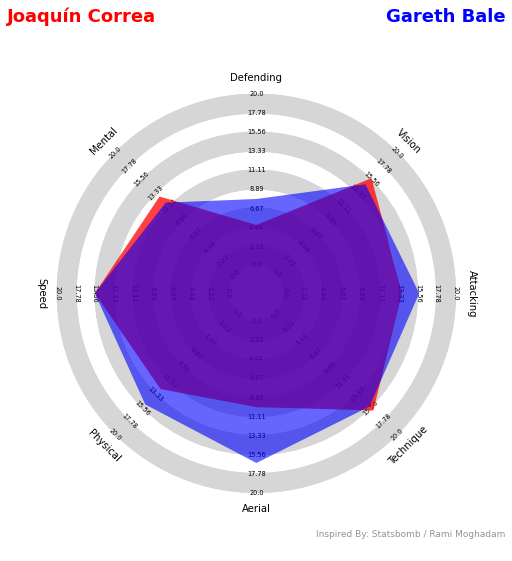

In [72]:
compparison_player ('Joaquín Correa', 'Gareth Bale')

10104
[[4.75, 15.666666666666666, 13.666666666666666, 16.0, 10.0, 12.5, 15.5, 12.666666666666666], [6.5, 12.0, 12.0, 14.0, 6.5, 10.0, 15.5, 10.0]]


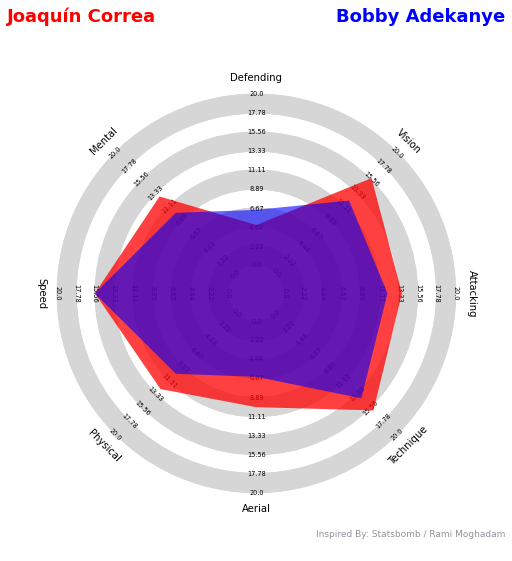

In [73]:
compparison_player ('Joaquín Correa', 'Bobby Adekanye')

##### Perbandingan David De Gea

10104
[[13.5, 13.0, 14.0, 18.0, 17.0, 11.0, 11.0, 10], [13.75, 11.5, 16.666666666666668, 14.5, 14.0, 14.5, 18.5, 18]]


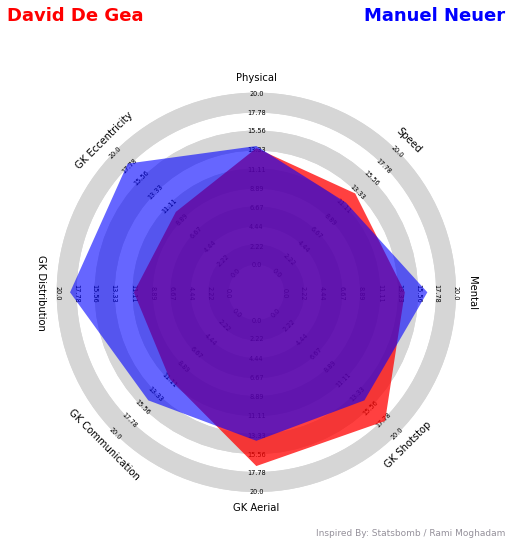

In [74]:
compparison_player ('David De Gea', 'Manuel Neuer')

10104
[[13.5, 13.0, 14.0, 18.0, 17.0, 11.0, 11.0, 10], [10.0, 6.0, 17.333333333333332, 15.5, 14.0, 20.0, 12.5, 16]]


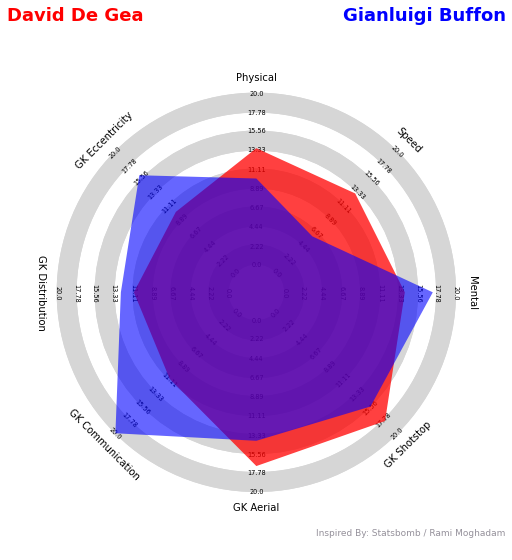

In [75]:
compparison_player ('David De Gea', 'Gianluigi Buffon')

##### Colaborative Filter dengan mengunakan position memberikan hasil analysis berdasarkan kategori position tanpa melibatkan statistik-statistik lainnya sehingga memberikan hasil yang beragam tapi tetap berdasarkan kemiripan posisi

### Cosine Similarity Using Attribute Player

##### Perbandingan Joaquin Correa

10104
[[4.75, 15.666666666666666, 13.666666666666666, 16.0, 10.0, 12.5, 15.5, 12.666666666666666], [3.25, 14.333333333333334, 12.333333333333334, 13.666666666666666, 7.5, 12.0, 14.5, 11.666666666666666]]


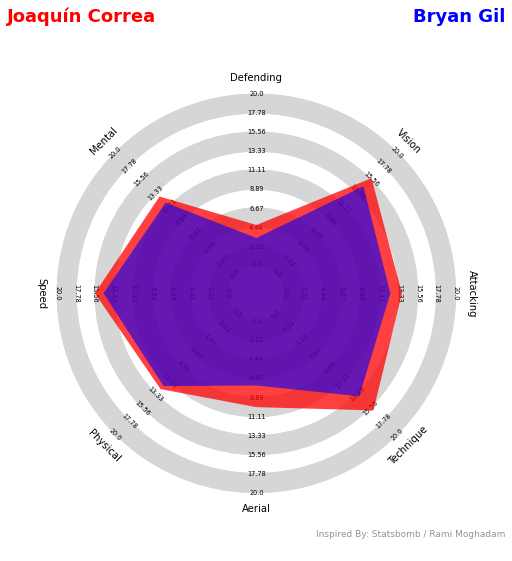

In [76]:
compparison_player ('Joaquín Correa', 'Bryan Gil')

10104
[[4.75, 15.666666666666666, 13.666666666666666, 16.0, 10.0, 12.5, 15.5, 12.666666666666666], [5.5, 12.666666666666666, 13.0, 14.0, 9.0, 12.0, 14.5, 11.0]]


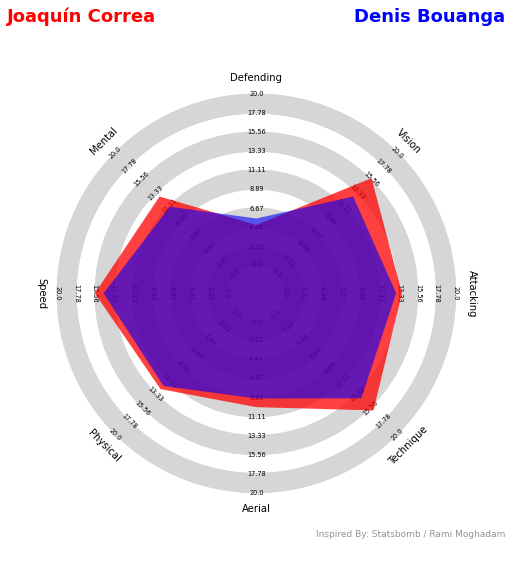

In [77]:
compparison_player ('Joaquín Correa', 'Denis Bouanga')

##### Perbandingan David De Gea

10104
[[13.5, 13.0, 14.0, 18.0, 17.0, 11.0, 11.0, 10], [13.25, 11.5, 12.166666666666666, 13.0, 14.5, 13.0, 12.5, 7]]


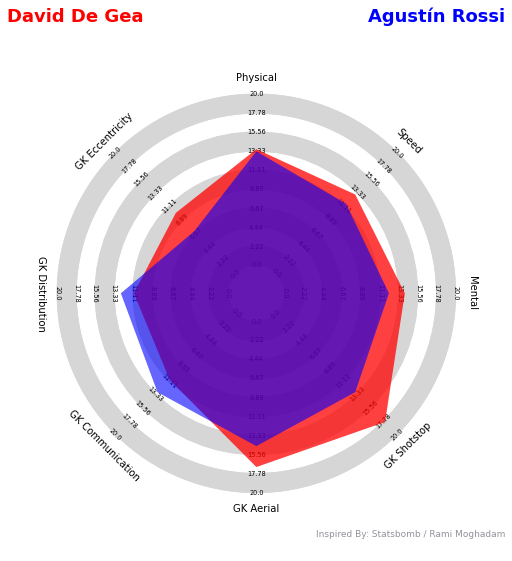

In [78]:
compparison_player ('David De Gea', 'Agustín Rossi')

10104
[[13.5, 13.0, 14.0, 18.0, 17.0, 11.0, 11.0, 10], [13.5, 10.0, 12.5, 15.5, 14.5, 12.0, 13.0, 10]]


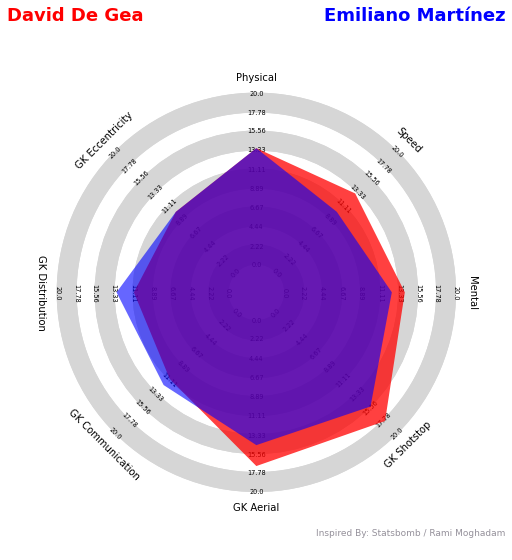

In [79]:
compparison_player ('David De Gea', 'Emiliano Martínez')

##### Cosine Similarity memberikan hasil analysis berdasarkan kemiripan pola atribute dari pemain

### Euclidean Distance Using Attribute Player

##### Perbandingan Joaquin Correa

10104
[[4.75, 15.666666666666666, 13.666666666666666, 16.0, 10.0, 12.5, 15.5, 12.666666666666666], [7.0, 14.666666666666666, 13.0, 13.666666666666666, 9.5, 12.75, 14.5, 12.333333333333334]]


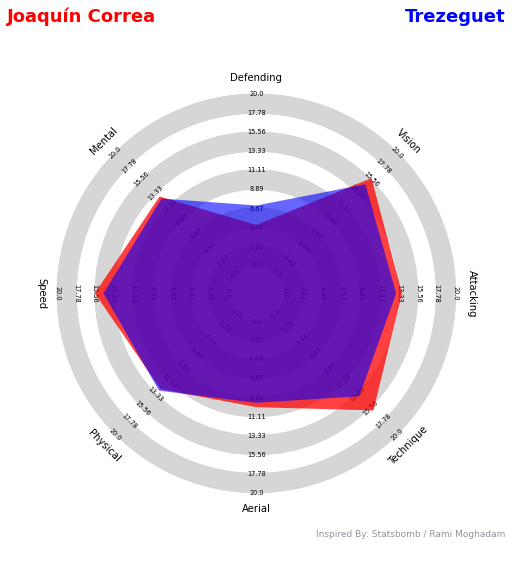

In [80]:
compparison_player ('Joaquín Correa', 'Trezeguet')

10104
[[4.75, 15.666666666666666, 13.666666666666666, 16.0, 10.0, 12.5, 15.5, 12.666666666666666], [4.75, 15.0, 14.666666666666666, 15.333333333333334, 8.5, 12.5, 15.5, 12.833333333333334]]


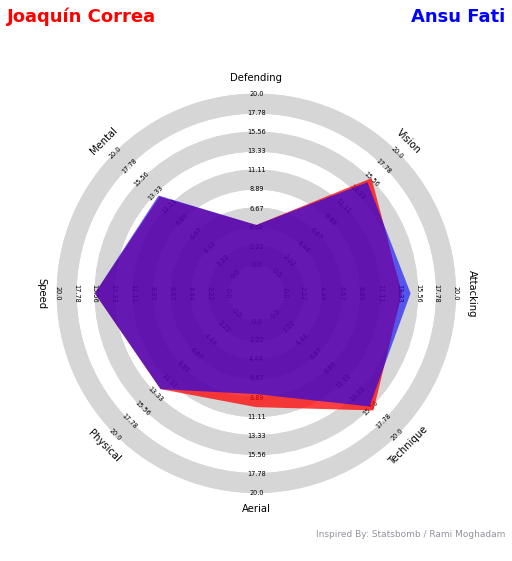

In [81]:
compparison_player ('Joaquín Correa', 'Ansu Fati')

##### Perbandingan David De Gea

10104
[[13.5, 13.0, 14.0, 18.0, 17.0, 11.0, 11.0, 10], [13.25, 11.5, 12.166666666666666, 13.0, 14.5, 13.0, 12.5, 7]]


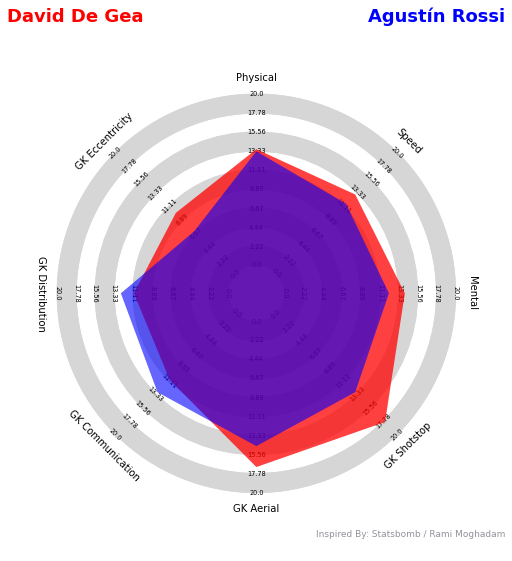

In [82]:
compparison_player ('David De Gea', 'Agustín Rossi')

10104
[[13.5, 13.0, 14.0, 18.0, 17.0, 11.0, 11.0, 10], [13.0, 11.0, 13.166666666666666, 16.0, 14.5, 12.5, 11.0, 9]]


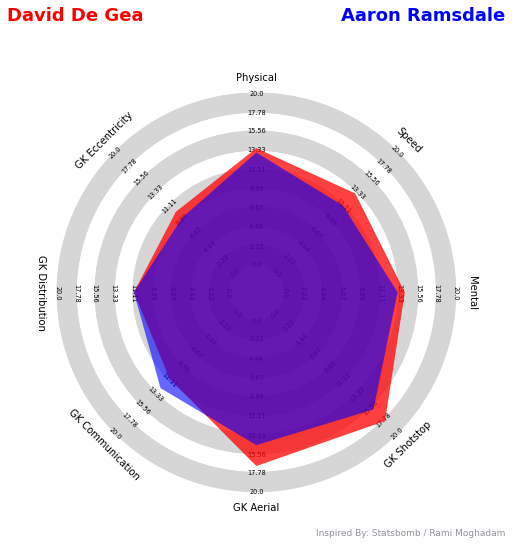

In [83]:
compparison_player ('David De Gea', 'Aaron Ramsdale')

##### Euclidean memberikan hasil analysis berdasarkan kemiripan titik atribute dari pemain

### Manhattan Distance Using Attribute Player

##### Perbandingan Joaquin Correa

10104
[[4.75, 15.666666666666666, 13.666666666666666, 16.0, 10.0, 12.5, 15.5, 12.666666666666666], [4.75, 15.0, 14.333333333333334, 16.0, 9.0, 13.0, 16.5, 12.166666666666666]]


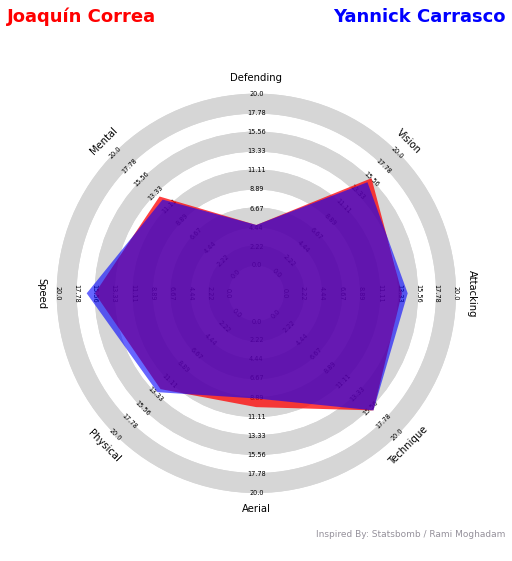

In [89]:
compparison_player ('Joaquín Correa', 'Yannick Carrasco')

10104
[[4.75, 15.666666666666666, 13.666666666666666, 16.0, 10.0, 12.5, 15.5, 12.666666666666666], [4.75, 13.333333333333334, 11.666666666666666, 15.0, 8.0, 12.75, 16.5, 13.166666666666666]]


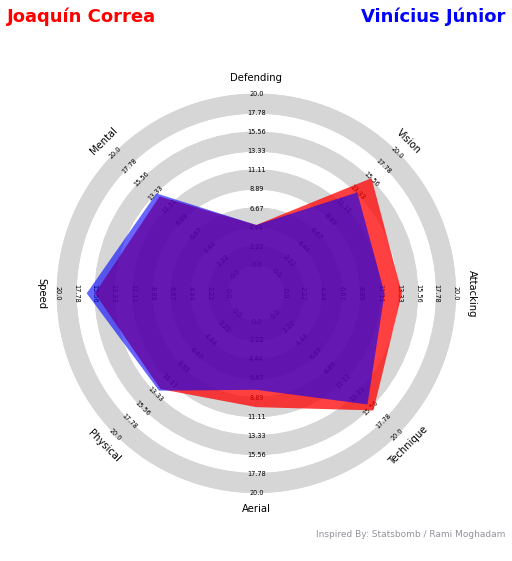

In [90]:
compparison_player ('Joaquín Correa', 'Vinícius Júnior')

##### Perbandingan David De Gea

10104
[[13.5, 13.0, 14.0, 18.0, 17.0, 11.0, 11.0, 10], [13.25, 11.5, 12.166666666666666, 13.0, 14.5, 13.0, 12.5, 7]]


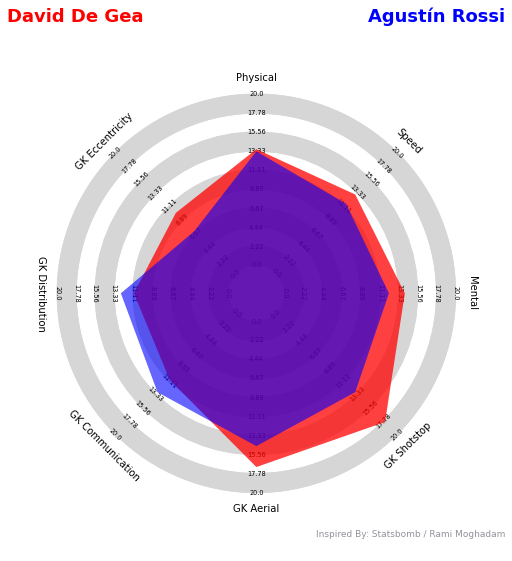

In [87]:
compparison_player ('David De Gea', 'Agustín Rossi')

10104
[[13.5, 13.0, 14.0, 18.0, 17.0, 11.0, 11.0, 10], [13.0, 11.0, 13.166666666666666, 16.0, 14.5, 12.5, 11.0, 9]]


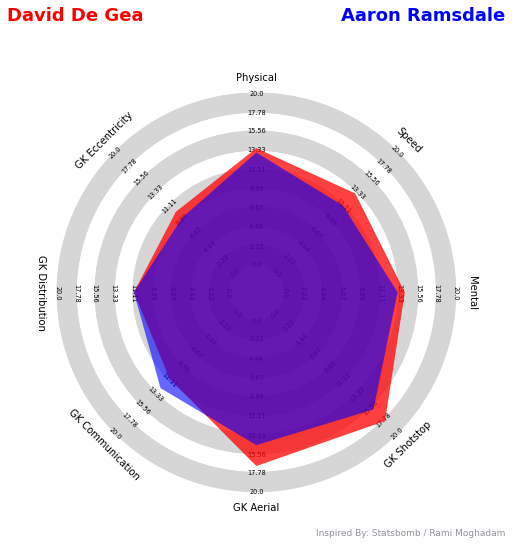

In [88]:
compparison_player ('David De Gea', 'Aaron Ramsdale')

##### Manhattan Distance memberikan hasil analysis yang hampir mirip dengan Euclian Distance, hal ini dapat menjadi pelengkap dalam memberika rekomendasi